## Data Sci Eng Methods
## Assignment – Crash Course in Statistical Learning Worked Examples

## Abstract
You must at least have two worked examples, one in your section on a data set and one for exercises related to your section on a different dataset. Now we are going to follow same steps as in the Written section but on a Housing Dataset as mentioned.

## Content

1. Introduction 
2. Knowing your dataset
3. Data Cleaning
4. Data Analysis
5. Selecting Features
6. Fitting a Linear Model
7. Fitting a Tree based Model
8. Using AutoML to find Best Model
9. Analysing AutoML best model
10. SHAP Analysis for Tree based Model
11. SHAP Analysis for Linear Model
12. SHAP Analysis for AutoML best model
13. Conclusion

## 1. Introduction

### Goal 
The goal is to have at least have two worked examples, one in your section on a data set and one for exercises related to your section on a different dataset. Now we are going to follow same steps as in the Written section but on a Housing Dataset as mentioned.. We will take you on a step by step guide to perform an analysis on Housing Price Prediction dataset covering all the lifecycles of Data Science.

### Objectives:

1. To explain the importance of data preparation in machine learning and statistical analysis.
2. To describe the different types of data and their properties, such as continuous, categorical, and binary data.
3. To discuss common data cleaning and preprocessing techniques, such as handling missing data, dealing with outliers, and scaling data.
4. To provide examples of how to prepare data for analysis in machine learning using code, including data exploration and visualization, data transformation, and feature engineering.
5. To emphasize the importance of assessing the quality of the data before conducting any analysis.

### Outcomes:
By the end of this section, students will be able to:

1. Understand the importance of data preparation in machine learning and statistical analysis.
2. Identify the different types of data and their properties.
3. Implement common data cleaning and preprocessing techniques using code.
4. Prepare data for analysis in machine learning using code, including data exploration and visualization, data transformation, and feature engineering.
5. Assess the quality of the data before conducting any analysis.

Abount the Dataset:
Used in Belsley, Kuh & Welsch, 'Regression diagnostics …', Wiley,1980. N.B. Various transformations are used in the table on pages 244-261. Quinlan (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

1. Relevant Information: Concerns housing values in suburbs of Boston.
2. Number of Instances: 509
3. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

1. CRIM : per capita crime rate by town.
2. ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX : nitric oxides concentration (parts per 10 million).
6. RM : average number of rooms per dwelling.
7. AGE : proportion of owner-occupied units built prior to 1940.
8. DIS : weighted distances to five Boston employment centres.
9. RAD : index of accessibility to radial highways.
10. TAX : full-value property-tax rate per 10,000 dollars.
11. PTRATIO : pupil-teacher ratio by town.
12. B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: % lower status of the population.
14. MEDV : Median value of owner-occupied homes in $1000's.*

## 2. Data Description & Knowing your dataset

#### Features of the dataset

The Boston Housing dataset is a famous dataset in the machine learning community, often used as a benchmark for regression models. It contains information about housing values in suburbs of Boston. The dataset consists of 13 continuous features and one binary feature (CHAS) with a total of 14 attributes, including the target variable, "MEDV," which represents the median value of owner-occupied homes in $1000's. There are 506 instances in the dataset.

The 13 continuous features are as follows:

1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: Proportion of non-retail business acres per town.
4. NOX: Nitric oxides concentration (parts per 10 million).
5. RM: Average number of rooms per dwelling.
6. AGE: Proportion of owner-occupied units built prior to 1940.
7. DIS: Weighted distances to five Boston employment centers.
8. RAD: Index of accessibility to radial highways.
9. TAX: Full-value property-tax rate per $10,000.
10. PTRATIO: Pupil-teacher ratio by town.
11. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
12. LSTAT: % lower status of the population.

The binary feature is:
13. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

The target variable is:
14. MEDV: Median value of owner-occupied homes in $1000's.

The dataset provides a diverse set of features that could potentially affect housing values. For example, areas with high crime rates or poor access to transportation might be less desirable to potential homebuyers, resulting in lower home values. Similarly, areas with better schools or more open space might be more desirable and result in higher home values.

Overall, this dataset is a valuable resource for developing and evaluating regression models for predicting housing values based on a variety of features.

## Installing all the required libraries

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
import graphviz
import matplotlib.image as mpimg

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

In [ ]:
# Reading CSV file into Pandas DataFrame
data=pd.read_csv("https://raw.githubusercontent.com/namandiwan10/data-science-assignments/main/Housing.csv")

In [ ]:
#Viewing data which is inside the csv file 
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
#Viewing Data types of all columns of the dataset
for dtype in data.dtypes.iteritems():
    print(dtype)

('CRIM', dtype('float64'))
('ZN', dtype('float64'))
('INDUS', dtype('float64'))
('CHAS', dtype('int64'))
('NOX', dtype('float64'))
('RM', dtype('float64'))
('AGE', dtype('float64'))
('DIS', dtype('float64'))
('RAD', dtype('float64'))
('TAX', dtype('int64'))
('PTRATIO', dtype('float64'))
('B', dtype('float64'))
('LSTAT', dtype('float64'))
('MEDV', dtype('float64'))


In [ ]:
# getting number of rows and columns
data.shape

(509, 14)

## What are the data types ? (both numerical and categorical listed below)

In [ ]:
# getting the data type and count of all the features along with numerical as well as categorical features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


## Numeric Features

In [ ]:
# general distribution of all the features (numerical data only)
data.describe().T

count        mean         std        min        25%        50%  \
CRIM     509.0    3.707516    8.732089    0.00632    0.08221    0.26169   
ZN       509.0   11.296660   23.269781    0.00000    0.00000    0.00000   
INDUS    506.0   11.198281    6.856713    0.46000    5.19000    9.69000   
CHAS     509.0    0.068762    0.253298    0.00000    0.00000    0.00000   
NOX      507.0    0.555216    0.115633    0.38500    0.44900    0.53800   
RM       509.0    6.279845    0.703449    3.56100    5.88000    6.20200   
AGE      508.0   68.579134   28.114744    2.90000   45.07500   77.15000   
DIS      509.0    3.787705    2.101852    1.12960    2.10070    3.18270   
RAD      508.0    9.610236    8.735069    1.00000    4.00000    5.00000   
TAX      509.0  409.216110  168.814161  187.00000  279.00000  330.00000   
PTRATIO  509.0   18.463851    2.161553   12.60000   17.40000   19.10000   
B        509.0  356.664892   91.562469    0.32000  375.33000  391.45000   
LSTAT    508.0   12.705276    7.131979    1.73000    7.09250   11.43000   
MEDV     509.0   22.501572    9.183497    5.00000   17.00000   21.20000   

               75%       max  
CRIM       3.69311   88.9762  
ZN        12.50000  100.0000  
INDUS     18.10000   27.7400  
CHAS       0.00000    1.0000  
NOX        0.62400    0.8710  
RM         6.61900    8.7800  
AGE       94.10000  100.0000  
DIS        5.11800   12.1265  
RAD       24.00000   24.0000  
TAX      666.00000  711.0000  
PTRATIO   20.20000   22.0000  
B        396.24000  396.9000  
LSTAT     16.99250   37.9700  
MEDV      25.00000   50.0000

## 3. Data Cleaning

In [ ]:
# checking null values for all the columns
data.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

## Are there any missing values ?

In [ ]:
# calculate the percentage of missing values for each column
missing_values_percentage = (data.isnull().sum() / data.shape[0]) * 100

# print the columns with missing values and their percentage
print(missing_values_percentage[missing_values_percentage > 0])

INDUS    0.589391
NOX      0.392927
AGE      0.196464
RAD      0.196464
LSTAT    0.196464
dtype: float64


## Which independent variables have missing data? How much? 

In [ ]:
for col in data.columns:
    print("Column:",col, "\n\n", data[col].value_counts(),"\n")

Column: CRIM 

 0.01501     2
0.28960     2
15.02340    2
14.33370    2
37.66190    2
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 503, dtype: int64 

Column: ZN 

 0.0      375
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64 

Column: INDUS 

 18.10    134
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.38       1
3.37       1
3.75       1
0.46       1
2.31       1
Name: INDUS, Length: 76, dtype: int64 

Column: CHAS 

 0    474
1     35
Name: CHAS, dtype: int64 

Column: NOX 

 0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.422     1
0.518     1
0.385     1
0.389     1
Name:

In [ ]:
# option 1 dropna
data.dropna().shape

(501, 14)

In [ ]:
## Set the values of some value( mean ,meadian, mode) option 3
data["INDUS"] = data["INDUS"].fillna(data["INDUS"].median())

In [ ]:
# checking in the data if it has missing values again after removing the missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

## Median Imputation 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df = imputer.fit_transform(data)
data = pd.DataFrame(df)
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS', 'RAD','TAX','PTRATIO','B', 'LSTAT','MEDV'] # Replace with actual column names
data.columns = col

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# checking for number of duplicate values
data.duplicated().sum()

4

In [ ]:
# removing duplicte values from the dataset
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
## convert the dtypes particulars columns float64 to int64.
data["AGE"] = data["AGE"].astype(int)
data["ZN"] = data["ZN"].astype(int)
data["RAD"] = data["RAD"].astype(int)
data["TAX"] = data["TAX"].astype(int)

In [ ]:
## after change columns dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    int64  
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    int64  
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 59.2 KB


## 4. Data Analysing

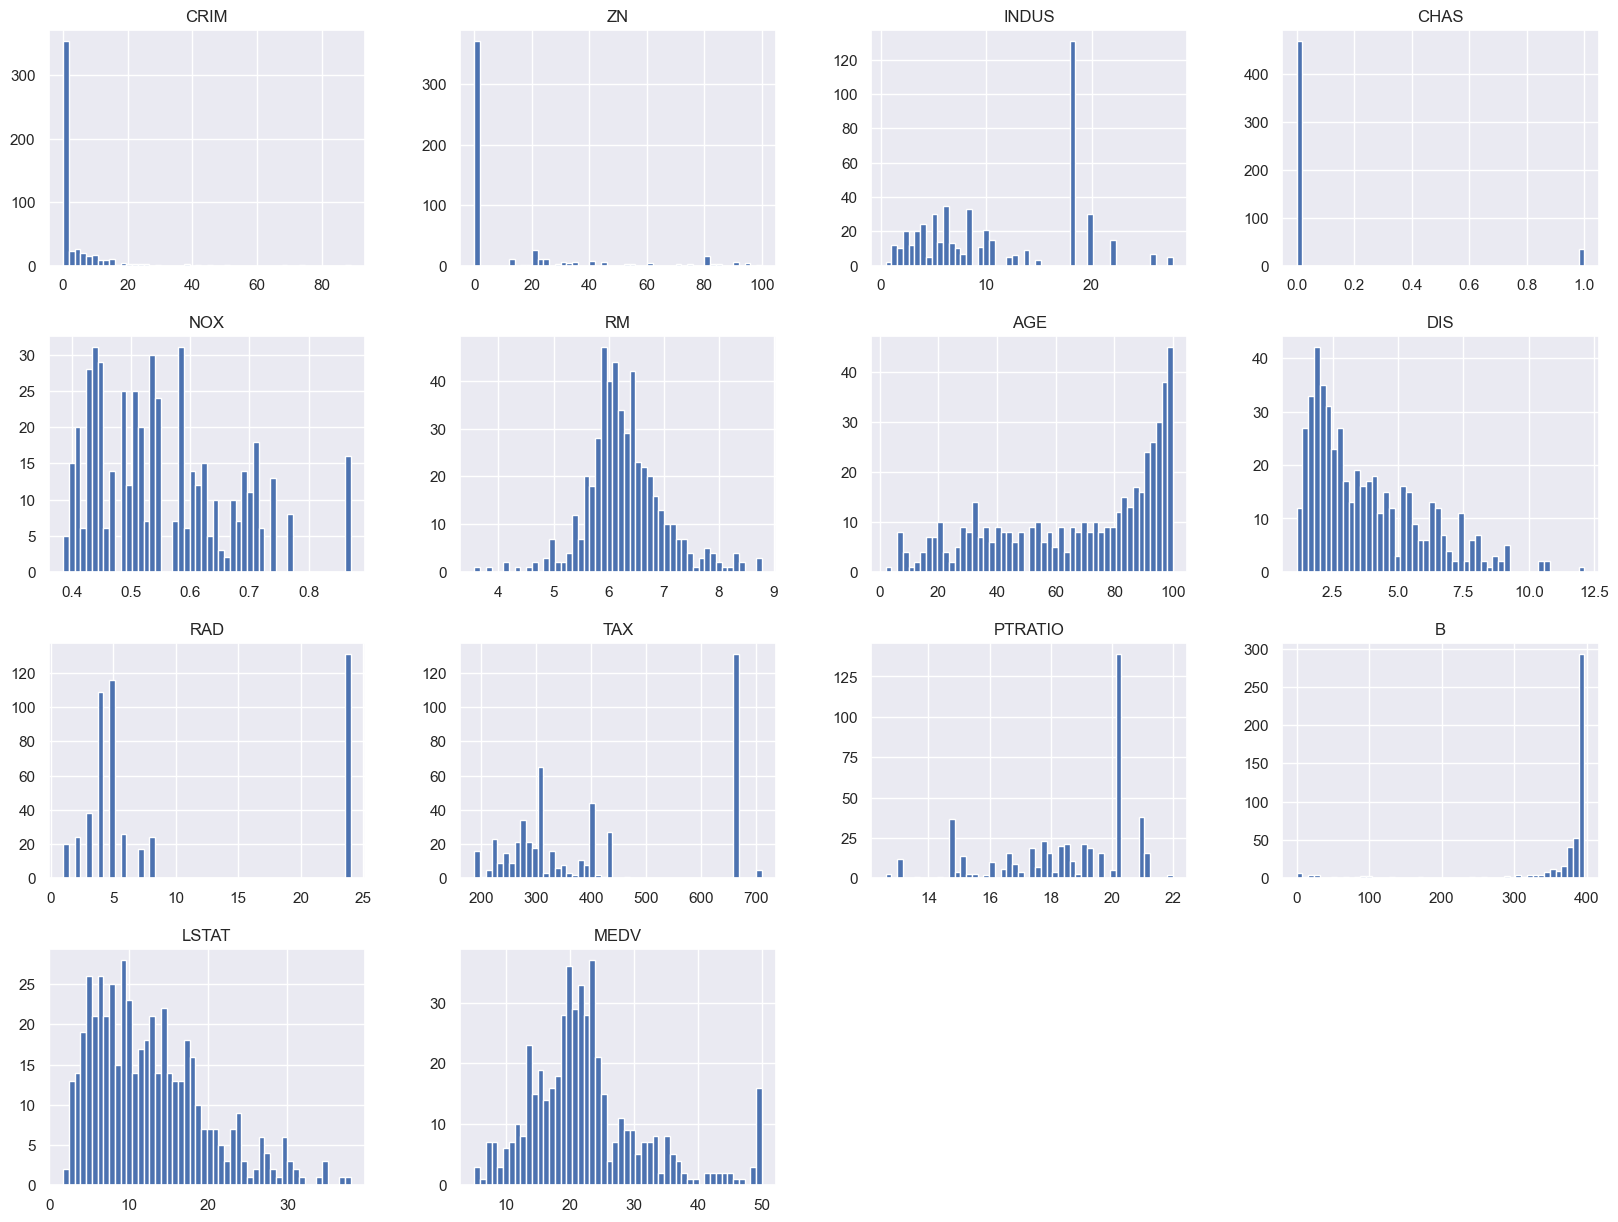

In [ ]:
## According to numerical dataset visualization for histplot
data.hist(bins=50,figsize=(20,15))
plt.show()

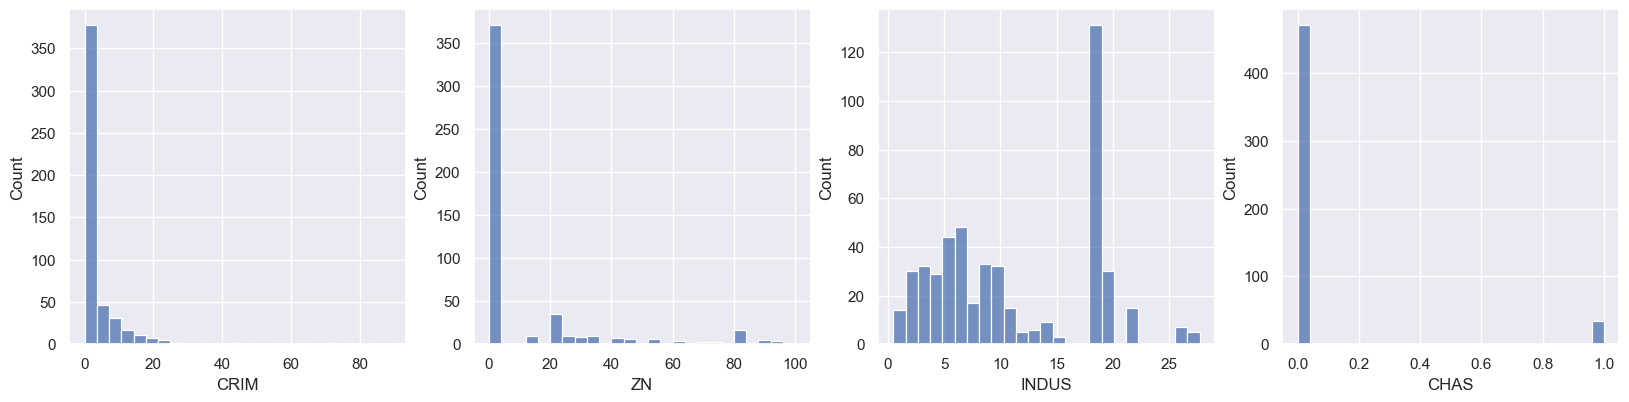

In [ ]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(data["CRIM"],bins=25)
plt.subplot(4,4,2)
sns.histplot(data["ZN"],bins=25)
plt.subplot(4,4,3)
sns.histplot(data["INDUS"],bins=25)
plt.subplot(4,4,4)
sns.histplot(data["CHAS"],bins=25)
plt.show()

### Observation:
- Insight into the CRIM columns : (per capital crime rate by town), the frequency of counts, zero crim properties are 350 above and the crime rate by town is 0.5 to 80.5 properties of the range, from the crime most of the range of counts 0.20 to 35.
- Insight into the ZN columns: (proportion of residential land zoned for lots over 25,000 sq.ft.), the frequency of counts, the value of 0 is 350 above and the proportion of residential land zoned is 20 to 90 above.
- Insight into the INDUS columns, the highest frequency of counts, the values of 17-18 are shown 120 above.
- Insight into the CHAS columns, the counts of values are 0 is greater than 400 and 1 is between 0 and 40 of the range.

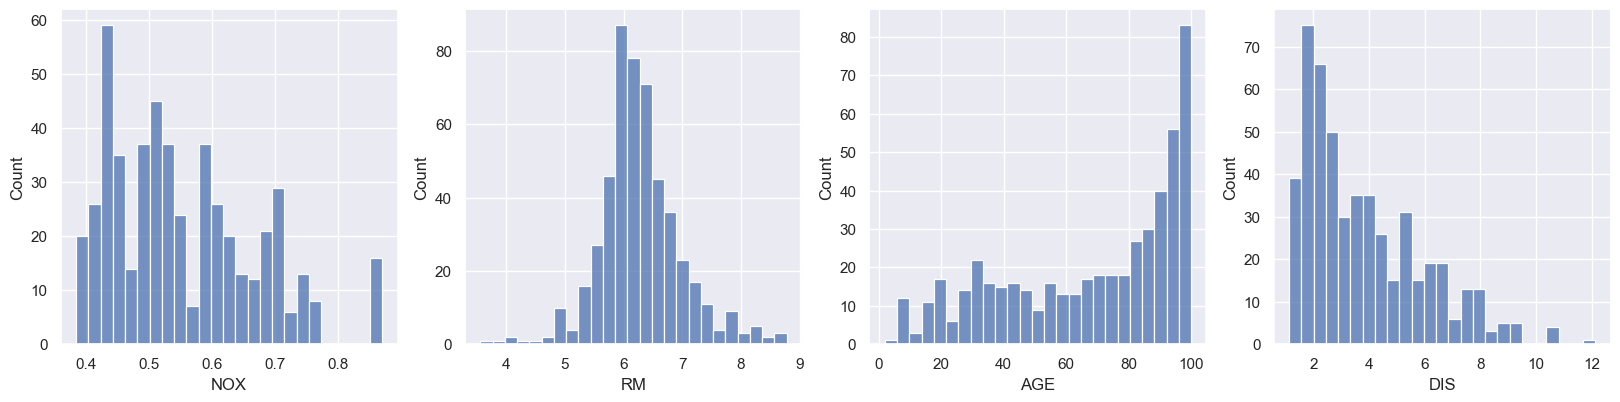

In [ ]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(data["NOX"],bins=25)
plt.subplot(4,4,2)
sns.histplot(data["RM"],bins=25)
plt.subplot(4,4,3)
sns.histplot(data["AGE"],bins=25)
plt.subplot(4,4,4)
sns.histplot(data["DIS"],bins=25)
plt.show()

### Observation:
- Insight into the NOX columns, the value of counts are 20 and 30. The values are in the range of 0.4 to 0.6, the highest range of values showing.
- Insight into the RM columns, the value of counts are4 and 80. The numbers of rooms are in the range of 5.5 to 6.5, the highest range of values showing.
- Insight into the AGE columns, most of the properties are 85 to 100 years old and the frequency value in the range 30 to 60 is shown.
- Insight into the DIS columns, most of the properties distances are 1 to 3 km and the frequency of the range 20 to 40 is shown.

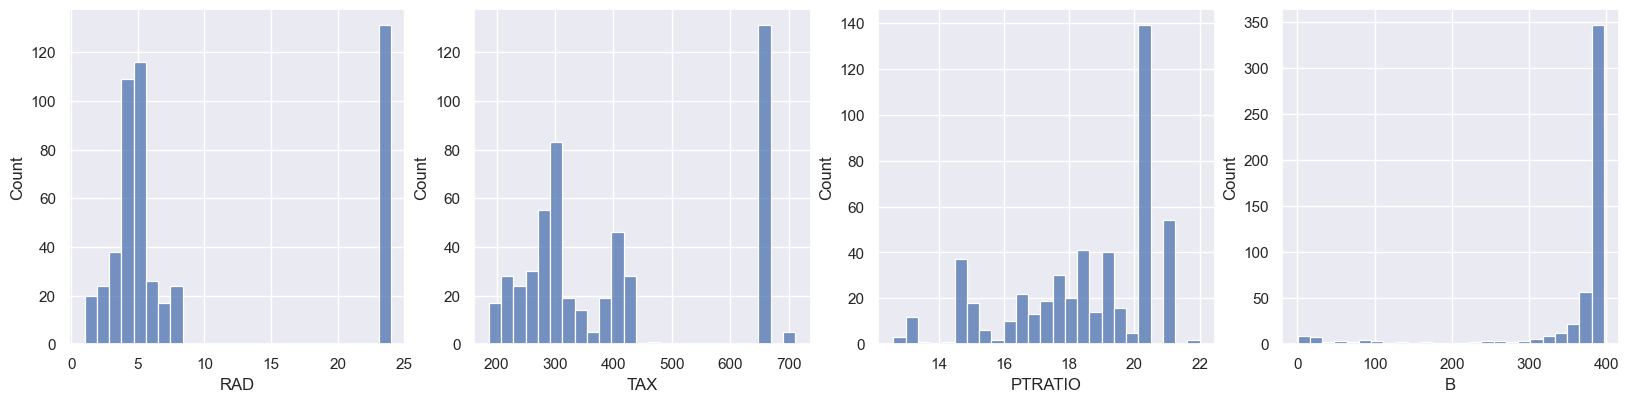

In [ ]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(data["RAD"],bins=25)
plt.subplot(4,4,2)
sns.histplot(data["TAX"],bins=25)
plt.subplot(4,4,3)
sns.histplot(data["PTRATIO"],bins=25)
plt.subplot(4,4,4)
sns.histplot(data["B"],bins=25)
plt.show()

### Observation:
- The RAD columns, most of the properties near the road are 21 to 25 km and the frequency counts of the range 120 properties are shown. The average properties near roads are 4 to 5 km and the frequency counts in the range 100 to 110 properties are shown.
- Insight into the TAX columns, the count range of 120 above the higher tax chargeble properites. The highest tax paid for properties is in the range of 660 to 690.
- Insight into the PTRATIO columns, the frequency value of counts is 120 above. the range from 20 to 21. the highest range of ratio showing.
- Insight into the B columns, the frequency value of counts is 250 above. the range of from 380 to 400. shown the highest range of blacks by town shown.

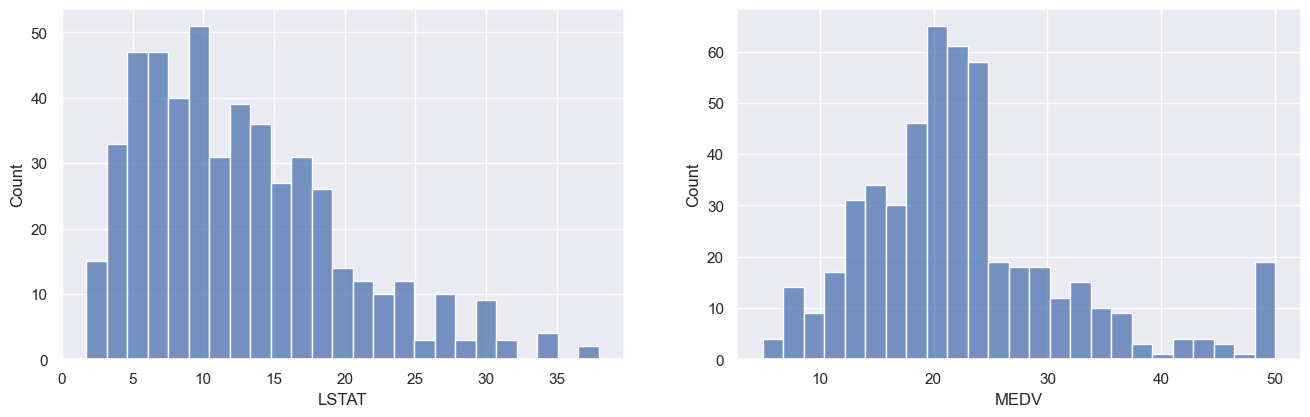

In [ ]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data["LSTAT"],bins=25)
plt.subplot(2,2,2)
sns.histplot(data["MEDV"],bins=25)
plt.show()

### Observation:
- Insight into the LSTAT columns, the frequency values of counts are 25 above. The range from 5 to 20. the highest range of lower status of the population shown.
- Insight into the MEDV columns, the frequency value of counts is 35 above. the values of the range 15 to 25.the highest range of values shown.

## Correlation Analysis

In [ ]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [ ]:
numcorr = num.corr()
numcorr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199957  0.405492 -0.055670  0.420399 -0.219179  0.353977   
ZN      -0.199957  1.000000 -0.530320 -0.042810 -0.517701  0.312171 -0.569326   
INDUS    0.405492 -0.530320  1.000000  0.062582  0.761450 -0.395349  0.642021   
CHAS    -0.055670 -0.042810  0.062582  1.000000  0.091485  0.091189  0.086568   
NOX      0.420399 -0.517701  0.761450  0.091485  1.000000 -0.303278  0.728460   
RM      -0.219179  0.312171 -0.395349  0.091189 -0.303278  1.000000 -0.240836   
AGE      0.353977 -0.569326  0.642021  0.086568  0.728460 -0.240836  1.000000   
DIS     -0.379271  0.663661 -0.705862 -0.099737 -0.768324  0.205180 -0.747510   
RAD      0.625914 -0.311186  0.592555 -0.006553  0.609905 -0.210137  0.456867   
TAX      0.582904 -0.313663  0.718810 -0.034844  0.666713 -0.292336  0.506984   
PTRATIO  0.289489 -0.390768  0.381039 -0.121167  0.188611 -0.355528  0.261028   
B       -0.385786  0.174037 -0.353534  0.047638 -0.377184  0.128371 -0.274127   
LSTAT    0.455235 -0.406449  0.601645 -0.054179  0.586877 -0.613018  0.599440   
MEDV    -0.387898  0.360016 -0.484554  0.174868 -0.426326  0.696134 -0.376773   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379271  0.625914  0.582904  0.289489 -0.385786  0.455235 -0.387898  
ZN       0.663661 -0.311186 -0.313663 -0.390768  0.174037 -0.406449  0.360016  
INDUS   -0.705862  0.592555  0.718810  0.381039 -0.353534  0.601645 -0.484554  
CHAS    -0.099737 -0.006553 -0.034844 -0.121167  0.047638 -0.054179  0.174868  
NOX     -0.768324  0.609905  0.666713  0.188611 -0.377184  0.586877 -0.426326  
RM       0.205180 -0.210137 -0.292336 -0.355528  0.128371 -0.613018  0.696134  
AGE     -0.747510  0.456867  0.506984  0.261028 -0.274127  0.599440 -0.376773  
DIS      1.000000 -0.493400 -0.533403 -0.231387  0.289079 -0.495048  0.248311  
RAD     -0.493400  1.000000  0.909773  0.463984 -0.439765  0.485624 -0.379161  
TAX     -0.533403  0.909773  1.000000  0.459772 -0.437711  0.541067 -0.466541  
PTRATIO -0.231387  0.463984  0.459772  1.000000 -0.174351  0.373503 -0.506899  
B        0.289079 -0.439765 -0.437711 -0.174351  1.000000 -0.362229  0.329548  
LSTAT   -0.495048  0.485624  0.541067  0.373503 -0.362229  1.000000 -0.734930  
MEDV     0.248311 -0.379161 -0.466541 -0.506899  0.329548 -0.734930  1.000000

<AxesSubplot:>

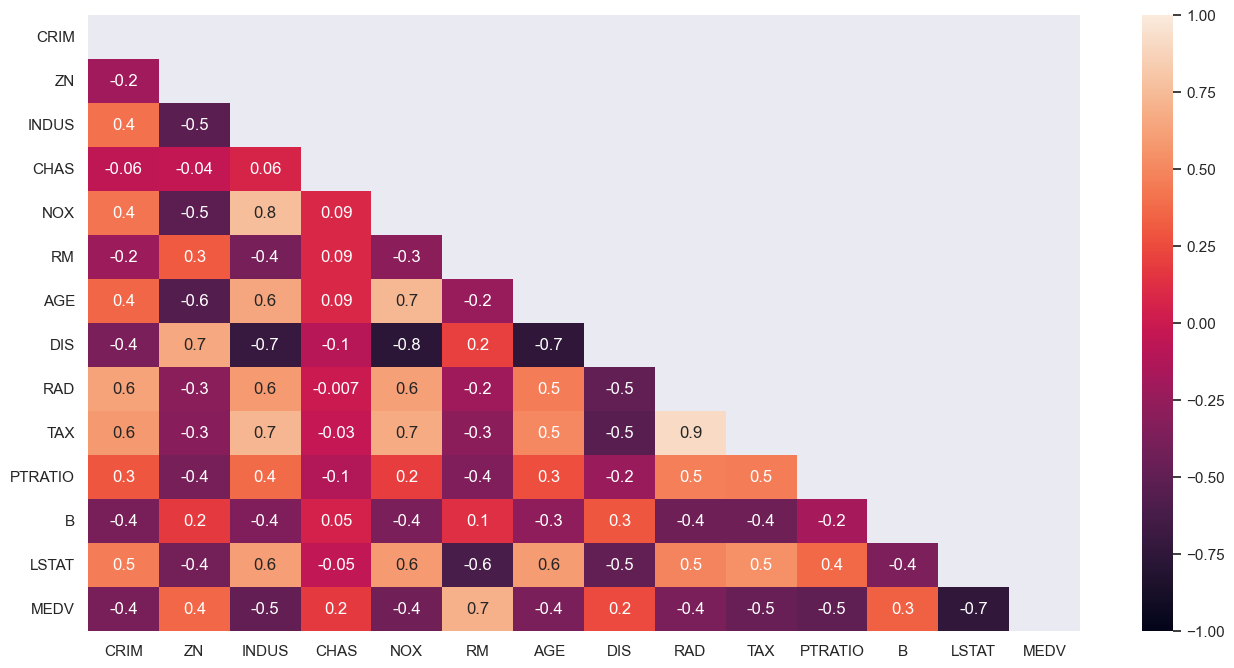

In [ ]:
# create the heatmap
matrix = np.triu(numcorr)
sns.heatmap(numcorr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

In [ ]:
for i in range(numcorr.shape[0]):
    for j in range(i+1, numcorr.shape[1]):
        if abs(numcorr.iloc[i, j]) > 0.8:
            print(f"Predictor variables {numcorr.columns[i]} and {numcorr.columns[j]} are highly correlated.")

Predictor variables RAD and TAX are highly correlated.


## Pairplot

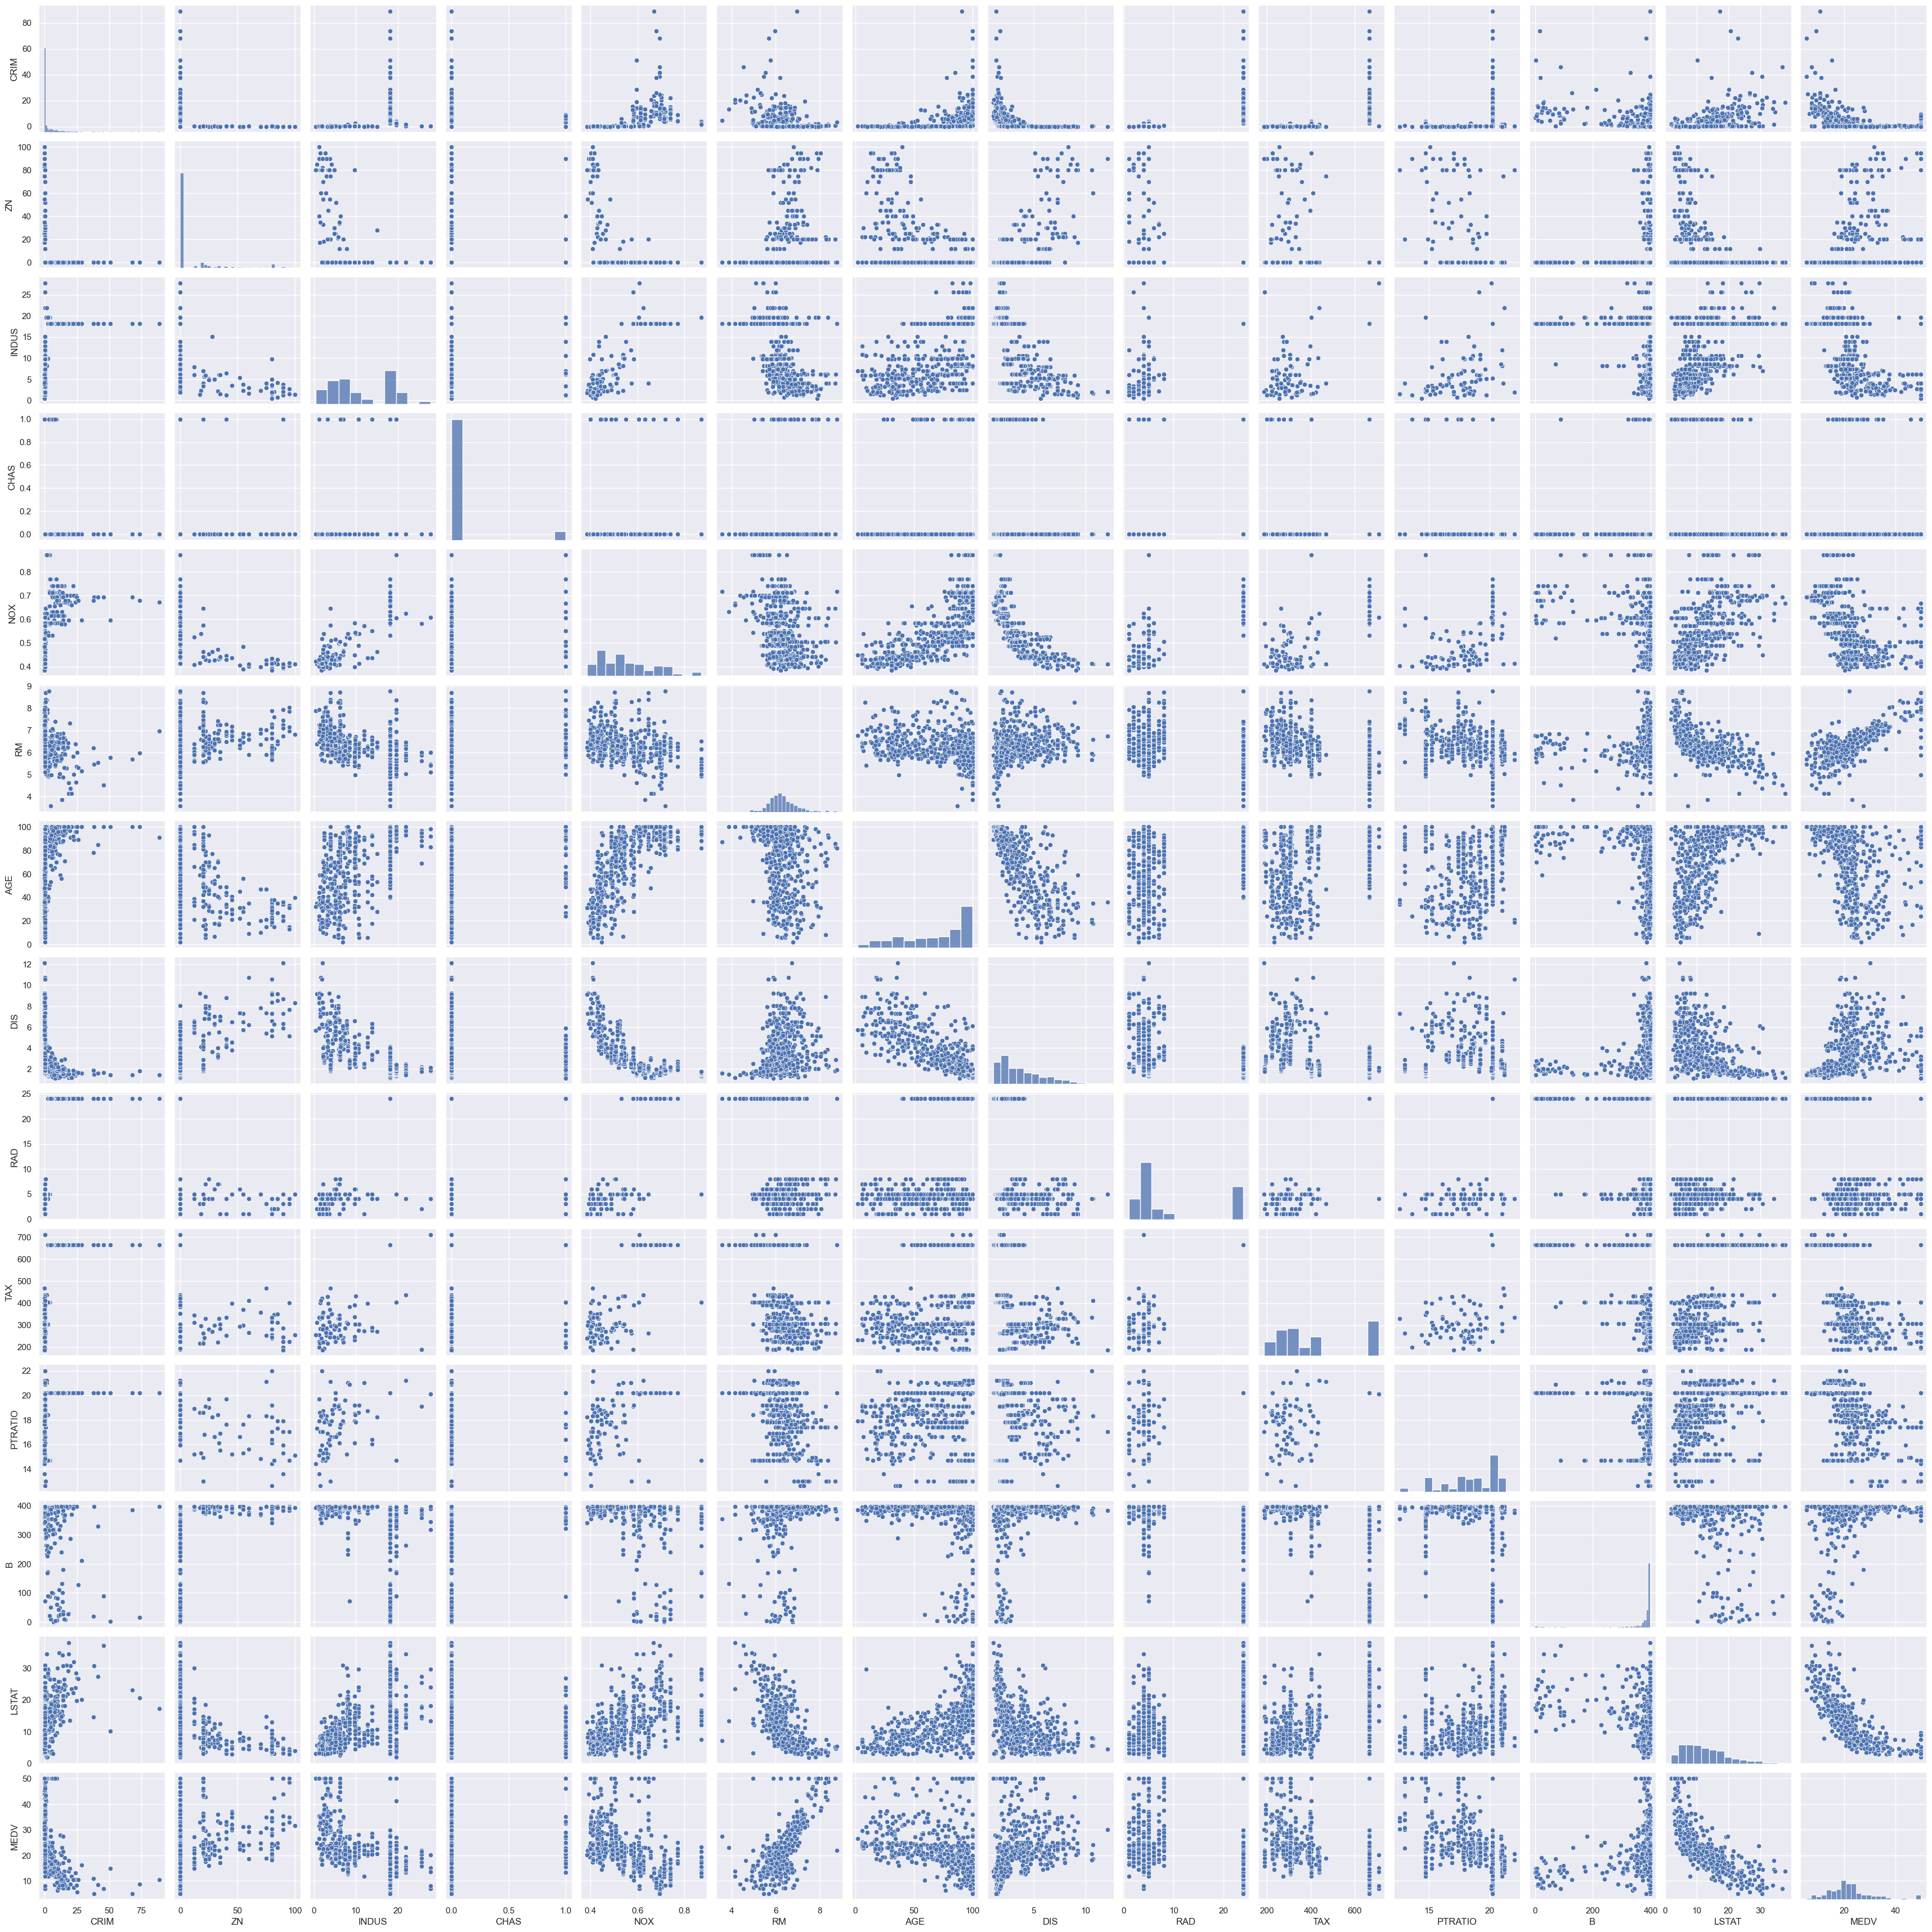

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data)

## Ordinary Least Squared

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['MEDV'], data).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.172e+31
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:37:57   Log-Likelihood:                          14836.
No. Observations:                 505   AIC:                                 -2.964e+04
Df Residuals:                     491   BIC:                                 -2.959e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM       -1.023e-15   2.98e-16     -3.435      0.001   -1.61e-15   -4.38e-16
ZN         -5.213e-16   1.25e-16     -4.167      0.000   -7.67e-16   -2.76e-16
INDUS        2.22e-16   5.52e-16      0.402      0.688   -8.62e-16    1.31e-15
CHAS        4.441e-15   7.83e-15      0.567      0.571   -1.09e-14    1.98e-14
NOX        -3.411e-14   2.87e-14     -1.187      0.236   -9.06e-14    2.24e-14
RM           2.97e-15   3.51e-15      0.847      0.398   -3.92e-15    9.86e-15
AGE         2.567e-16   1.18e-16      2.177      0.030    2.51e-17    4.88e-16
DIS         1.332e-15   1.72e-15      0.776      0.438   -2.04e-15    4.71e-15
RAD        -7.563e-16   5.77e-16     -1.312      0.190   -1.89e-15    3.77e-16
TAX         6.679e-17   3.38e-17      1.975      0.049    3.55e-19    1.33e-16
PTRATIO     1.332e-15   9.56e-16      1.393      0.164   -5.46e-16    3.21e-15
B          -8.468e-17   2.39e-17     -3.536      0.000   -1.32e-16   -3.76e-17
LSTAT       2.359e-16   4.63e-16      0.509      0.611   -6.74e-16    1.15e-15
MEDV           1.0000   3.86e-16   2.59e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       35.210   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.741
Skew:                           0.596   Prob(JB):                     3.18e-10
Kurtosis:                       3.811   Cond. No.                     8.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5. Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Y = data[['MEDV']]
X = data.drop(['MEDV'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
clf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RM         0.461052
LSTAT      0.341678
DIS        0.076732
NOX        0.024990
CRIM       0.024981
PTRATIO    0.019531
TAX        0.017910
AGE        0.010948
B          0.010188
INDUS      0.006060
RAD        0.003751
ZN         0.001210
CHAS       0.000971
dtype: float64

## 6. Fitting a Linear Model

In [ ]:
X = data.drop("MEDV", axis = 1)
y = data["MEDV"]

threshold = Y.mean()
Y_binary = (Y >= threshold).astype(int)

# Create the X_train and y_train
X_train = data.drop("MEDV", axis = 1)
y_train = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, Y_binary, test_size= 0.2)
X_train.shape, X_test.shape

np.random.seed(42);

In [ ]:
# Fit the model and calculate the score
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9603960396039604

In [ ]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    score = cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
    score_cv = np.sqrt(-score)
    score_cv_mean = score_cv.mean()
    return score_cv_mean

In [ ]:
# Calculate the MAE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_preds = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test,y_preds))
r2 = r2_score(y_test,y_preds)
score_cv = rmse_cv(lr_model)
mae
rmse
r2
score_cv

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.3654564975910578

## 7. Fit Tree Based Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
y_pred = DT_model.predict(X_test)
score_cv_2 = rmse_cv(DT_model)

mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_2 = r2_score(y_test,y_pred)
print("mean_absolute_error:",round(mae_2,3))
print("root_mean_squared_error:",round(rmse_2,3))
print("r2_score:",round(r2_2,3))
print("-"*27)
print("cross_val_score:",round(score_cv_2,3))

mean_absolute_error: 0.158
root_mean_squared_error: 0.398
r2_score: 0.332
---------------------------
cross_val_score: 0.449


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
score_cv_6 = rmse_cv(knn_model)

mae_6 = mean_absolute_error(y_test,y_pred)
rmse_6 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_6 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_6,3))
print("root_mean_squared_error:",round(rmse_6,3))
print("r2_score:",round(r2_6,3))
print("-"*27)
print("cross_val_score:",round(score_cv_6,3))

mean_absolute_error: 0.285
root_mean_squared_error: 0.378
r2_score: 0.399
---------------------------
cross_val_score: 0.414


In [ ]:
from sklearn.svm import SVR

SVR_model = SVR()
SVR_model.fit(X_train,y_train)
y_pred = SVR_model.predict(X_test)
score_cv_7 = rmse_cv(SVR_model)

mae_7 = mean_absolute_error(y_test,y_pred)
rmse_7 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_7 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_7,3))
print("root_mean_squared_error:",round(rmse_7,3))
print("r2_score:",round(r2_7,3))
print("-"*27)
print("cross_val_score:",round(score_cv_7,3))

mean_absolute_error: 0.294
root_mean_squared_error: 0.398
r2_score: 0.332
---------------------------
cross_val_score: 0.44


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

AB_model = AdaBoostRegressor()
AB_model.fit(X_train,y_train)
y_pred = AB_model.predict(X_test)
score_cv_5 = rmse_cv(AB_model)

mae_5 = mean_absolute_error(y_test,y_pred)
rmse_5 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_5 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_5,3))
print("root_mean_squared_error:",round(rmse_5,3))
print("r2_score:",round(r2_5,3))
print("-"*27)
print("cross_val_score:",round(score_cv_5,3))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


mean_absolute_error: 0.353
root_mean_squared_error: 0.377
r2_score: 0.402
---------------------------
cross_val_score: 0.371


In [ ]:
from sklearn.ensemble import BaggingRegressor

BR_model = BaggingRegressor()
BR_model.fit(X_train,y_train)
y_pred = BR_model.predict(X_test)
score_cv_4 = rmse_cv(BR_model)

mae_4 = mean_absolute_error(y_test,y_pred)
rmse_4 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_4 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_4,3))
print("root_mean_squared_error:",round(rmse_4,3))
print("r2_score:",round(r2_4,3))
print("-"*27)
print("cross_val_score:",round(score_cv_4,3))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


mean_absolute_error: 0.149
root_mean_squared_error: 0.241
r2_score: 0.755
---------------------------
cross_val_score: 0.332


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
from sklearn.ensemble import RandomForestRegressor


RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
score_cv_3 = rmse_cv(RF_model)

mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_3 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_3,3))
print("root_mean_squared_error:",round(rmse_3,3))
print("r2_score:",round(r2_3,3))
print("-"*27)
print("cross_val_score:",round(score_cv_3,3))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mean_absolute_error: 0.133
root_mean_squared_error: 0.224
r2_score: 0.788
---------------------------
cross_val_score: 0.32


In [ ]:
## models wise create the dataframe
df_1 = pd.DataFrame({"models_names":["LinearRegression","DecisionTreeRegressor",
                                   "RandomForestRegressor","BaggingRegressor","AdaBoostRegressor"
                                     ,"KNeighborsRegressor","SVR"],
                   "mean_absolute_error":[mae, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7],
                   "root_mean_squared_error":[rmse, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7],
                   "r2_score":[r2,r2_2,r2_3,r2_4,r2_5,r2_6,r2_7],
                   "rmse_cv_score":[score_cv, score_cv_2, score_cv_3, score_cv_4, score_cv_5, score_cv_6, score_cv_7]})

df_1.sort_values(by="rmse_cv_score",ascending=False)

models_names  mean_absolute_error  root_mean_squared_error  \
1  DecisionTreeRegressor             0.158416                 0.398015   
6                    SVR             0.294477                 0.397886   
5    KNeighborsRegressor             0.285149                 0.377590   
4      AdaBoostRegressor             0.352800                 0.376577   
0       LinearRegression             0.039604                 0.199007   
3       BaggingRegressor             0.148515                 0.240873   
2  RandomForestRegressor             0.132871                 0.224160   

   r2_score  rmse_cv_score  
1  0.331679       0.449299  
6  0.332113       0.439825  
5  0.398511       0.414478  
4  0.401733       0.371204  
0  0.832920       0.365456  
3  0.755227       0.332317  
2  0.788017       0.320120

<AxesSubplot:title={'center':'Model Comparison'}, xlabel='models_names', ylabel='scores'>

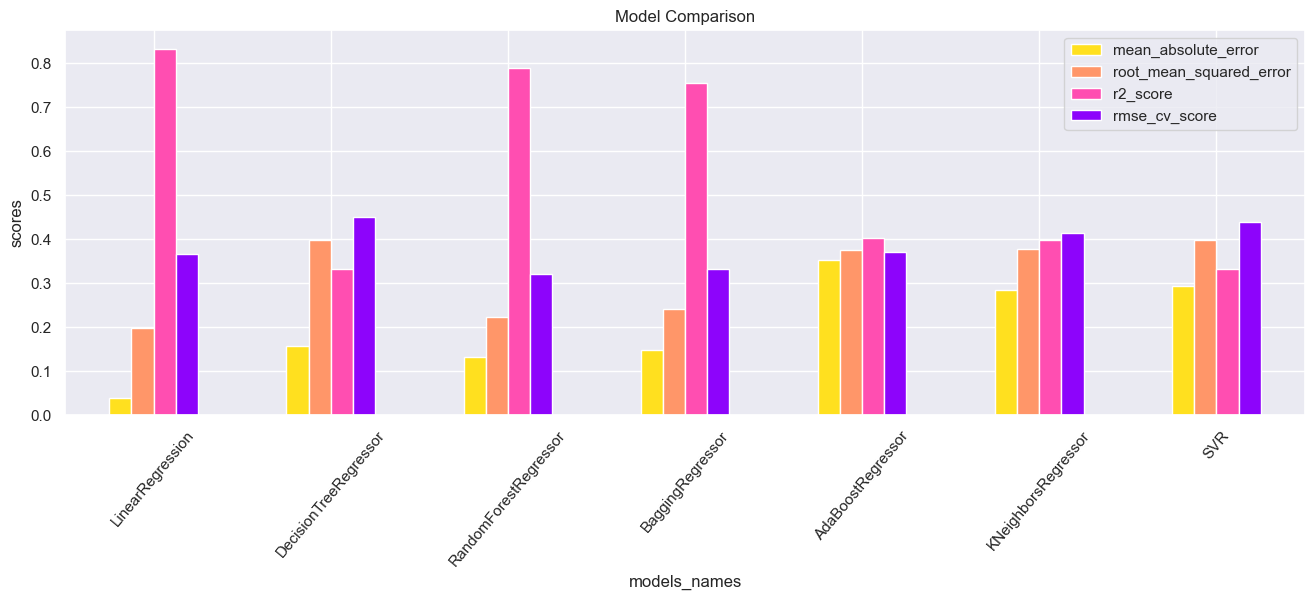

In [ ]:
### visualtion barplot used 
patt = sns.color_palette("gnuplot2_r")
df_1.plot.bar(x="models_names",rot=50,ylabel= "scores",title = "Model Comparison",color=patt,figsize=(16,5))

## 8. Setting up AutoML

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

0


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:12045..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/namandiwan/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpje5j1pvt
  JVM stdout: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpje5j1pvt/h2o_namandiwan_started_from_python.out
  JVM stderr: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpje5j1pvt/h2o_namandiwan_started_from_python.err
  Server is running at http://127.0.0.1:12045
Connecting to H2O server at http://127.0.0.1:12045 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    2 months and 16 days
H2O_cluster_name:           H2O_from_python_namandiwan_rgfbo0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:12045
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.13 final
--------------------------  ---------------------------------

In [ ]:
df = h2o.H2OFrame(data) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
X = df.columns
print(X)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
# Set target and predictor variables
y = "MEDV"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
aml.train(x=X, y=y, training_frame=df_train)  # Training the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20230424_223805


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1.3563293849218951
RMSE: 1.1646155524128532
MAE: 0.8239766304830524
RMSLE: 0.05677808463151882
Mean Residual Deviance: 1.3563293849218951
R^2: 0.9843994174512788
Null degrees of freedom: 403
Residual degrees of freedom: 399
Null deviance: 35124.141665682764
Residual deviance: 547.9570715084457
AIC: 1281.6342908083827

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9.305578892854992
RMSE: 3.05050469477675
MAE: 1.9724275832154532
RMSLE: 0.13027682299018276
Mean Residual Deviance: 9.305578892854992
R^2: 0.8929666692357486
Null degrees of freedom: 403
Residual degrees of freedom: 399
Null deviance: 35398.370832640576
Residual deviance: 3759.453872713417
AIC: 2059.6704317362764

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     1.97231   0.198557   2.02385       1.86609       1.68517       2.18124       2.10521
mean_residual_deviance  9.26273   4.14711    16.1781       7.48924       5.10927       8.55953       8.97754
mse                     9.26273   4.14711    16.1781       7.48924       5.10927       8.55953       8.97754
null_deviance           7079.67   961.608    6655.8        6151.66       6362.92       8066.62       8161.37
r2                      0.89041   0.0526733  0.803037      0.885801      0.939866      0.91847       0.904878
residual_deviance       751.891   344.346    1310.42       674.032       378.086       624.845       772.068
rmse                    2.98823   0.645394   4.02219       2.73665       2.26037       2.92567       2.99625
rmsle                   0.129209  0.0160122  0.154541      0.120991      0.123667      0.112967      0.133876

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## 9. Analysing AutoML best model

In [ ]:
# getting the best model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20230424_223805


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1.3563293849218951
RMSE: 1.1646155524128532
MAE: 0.8239766304830524
RMSLE: 0.05677808463

In [ ]:
# printing the best model algo
best_model.algo

'stackedensemble'

In [ ]:
# Getting RMSE of the best model
print(best_model.rmse(train=True))

1.1646155524128532


In [ ]:
# Making predictions
# convert X_test to an H2OFrame
h2o_X_test = h2o.H2OFrame(X_test)
y_predauto = best_model.predict(h2o_X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


## 10. SHAP Analysis for Tree Based Model

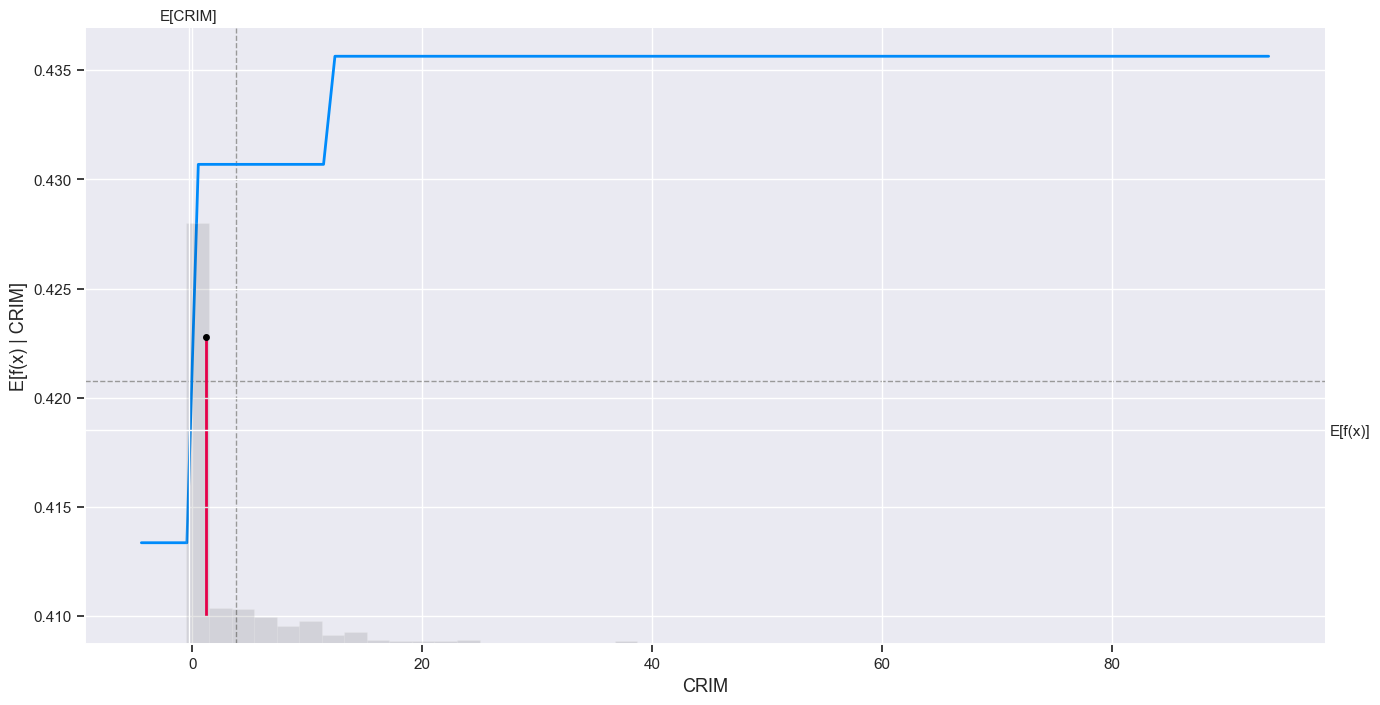

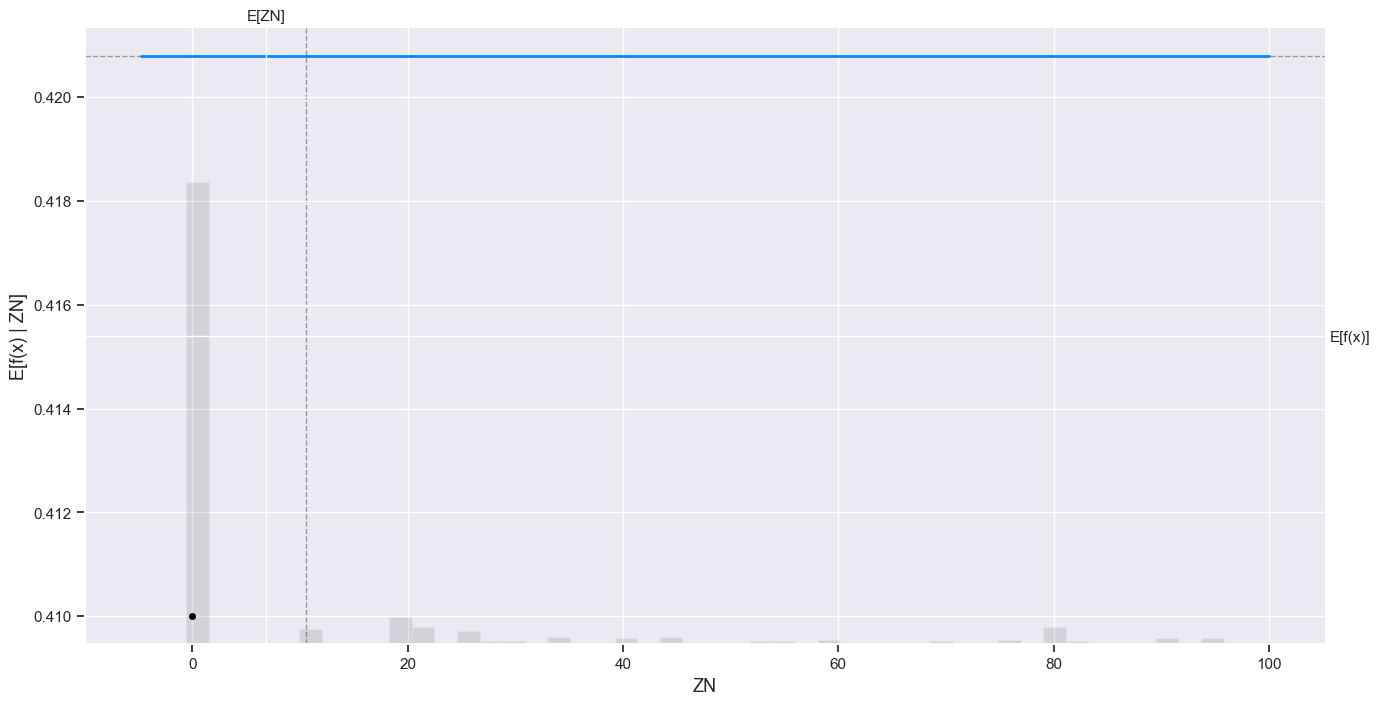

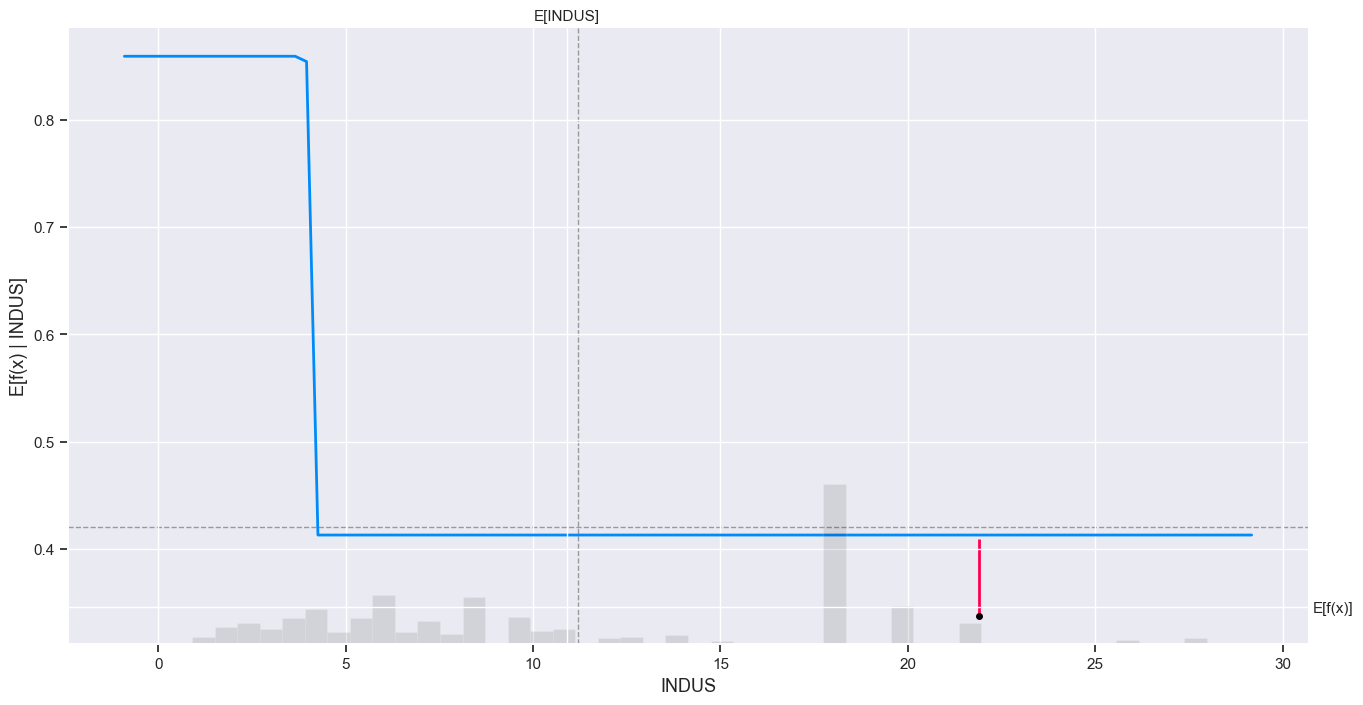

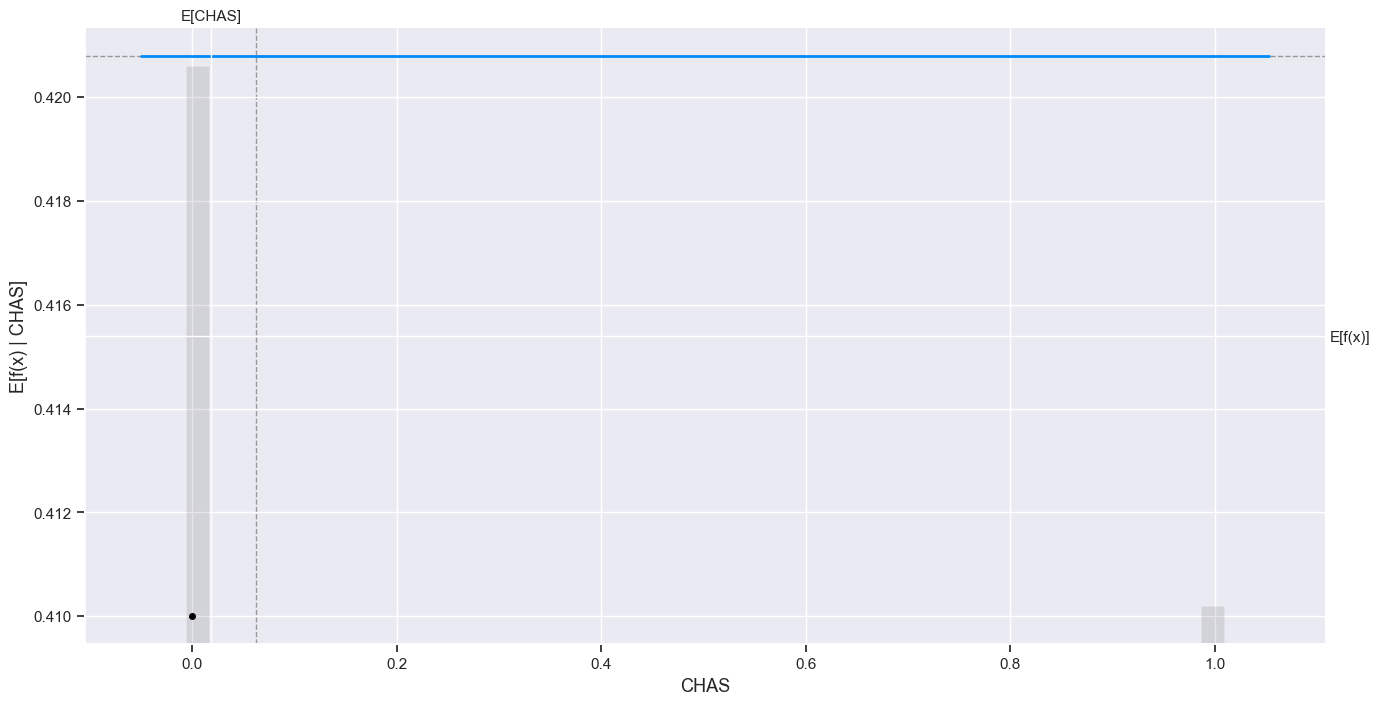

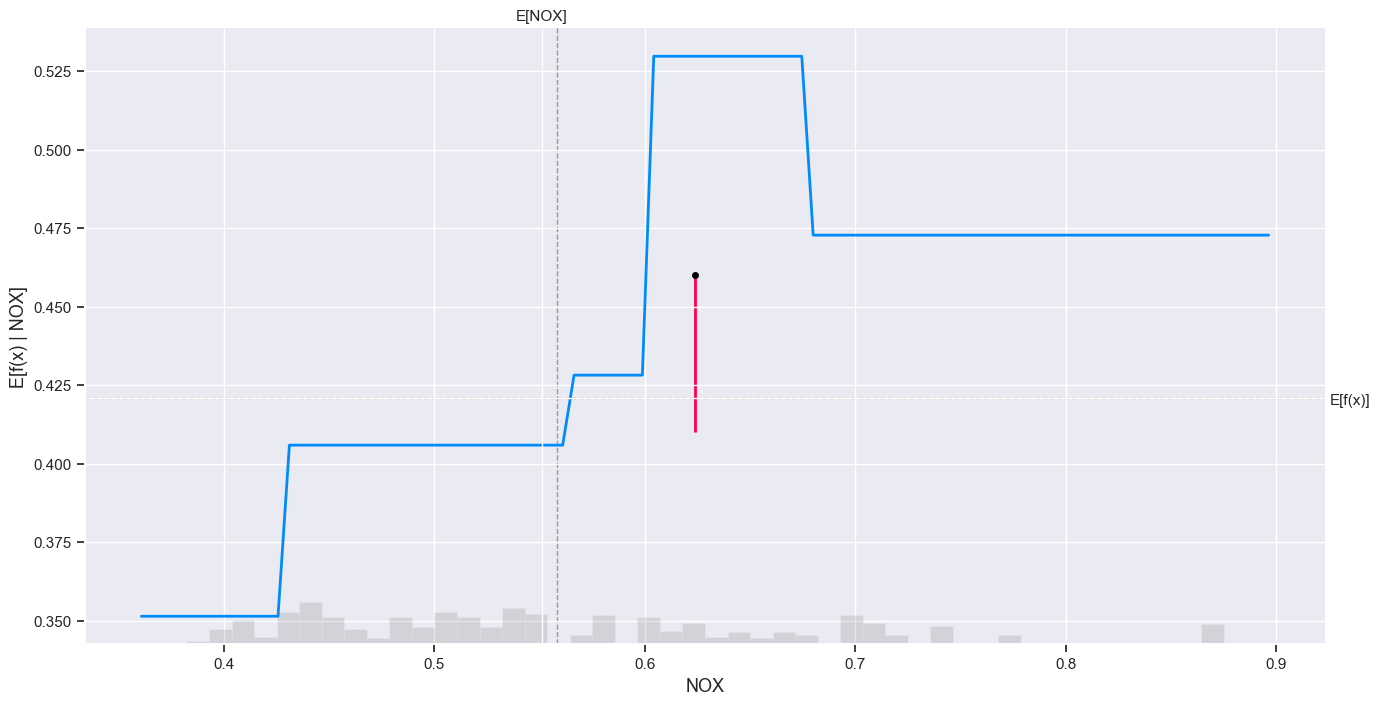

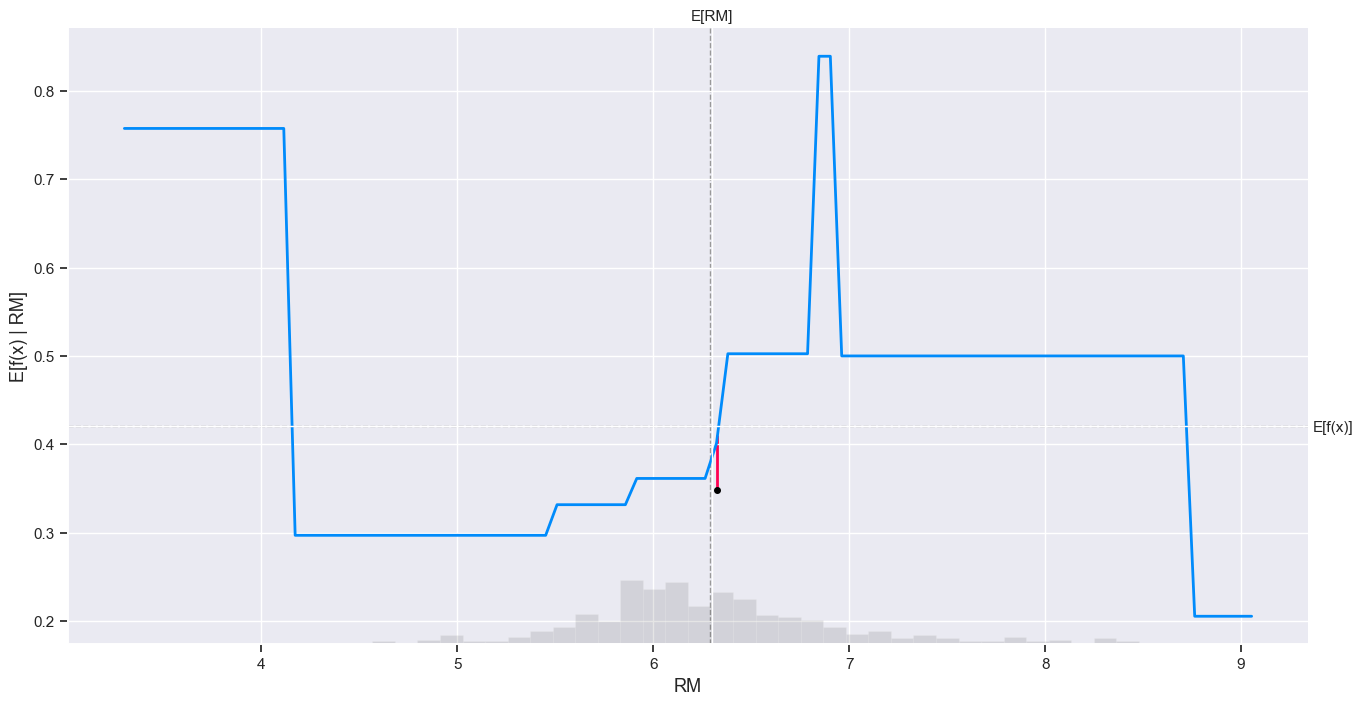

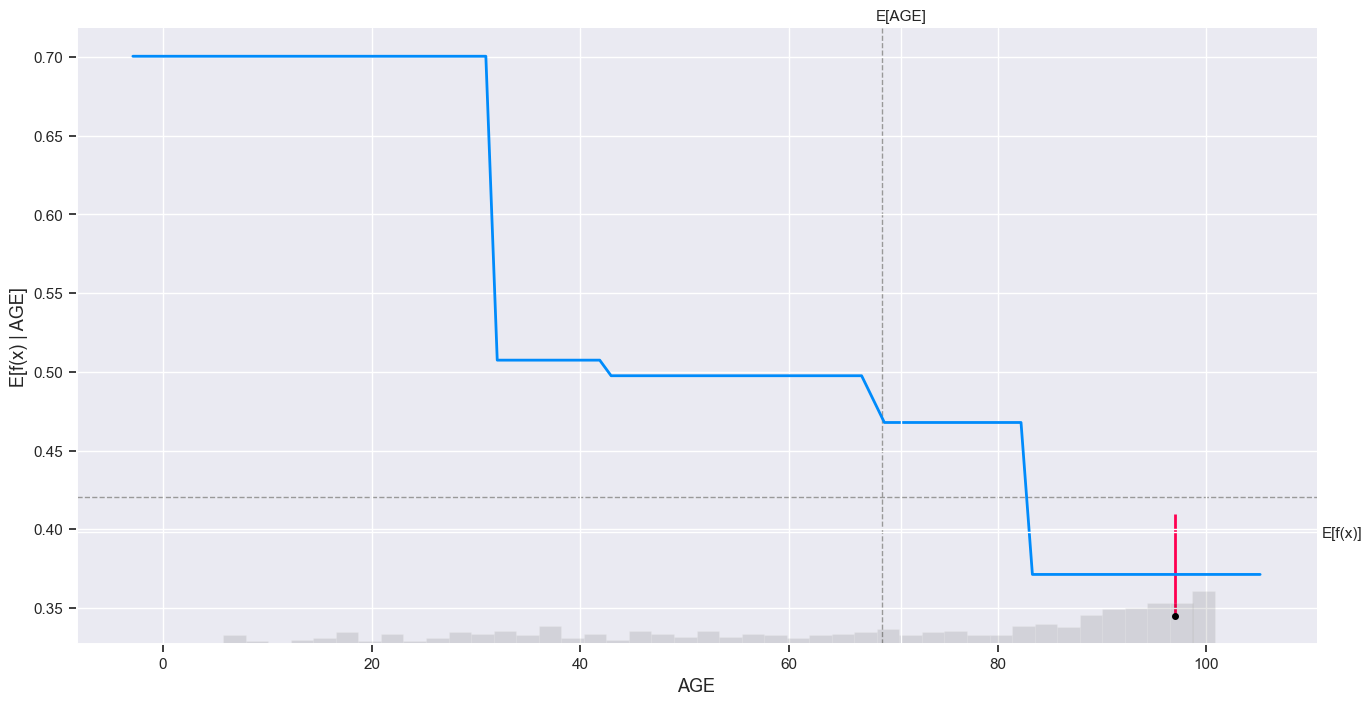

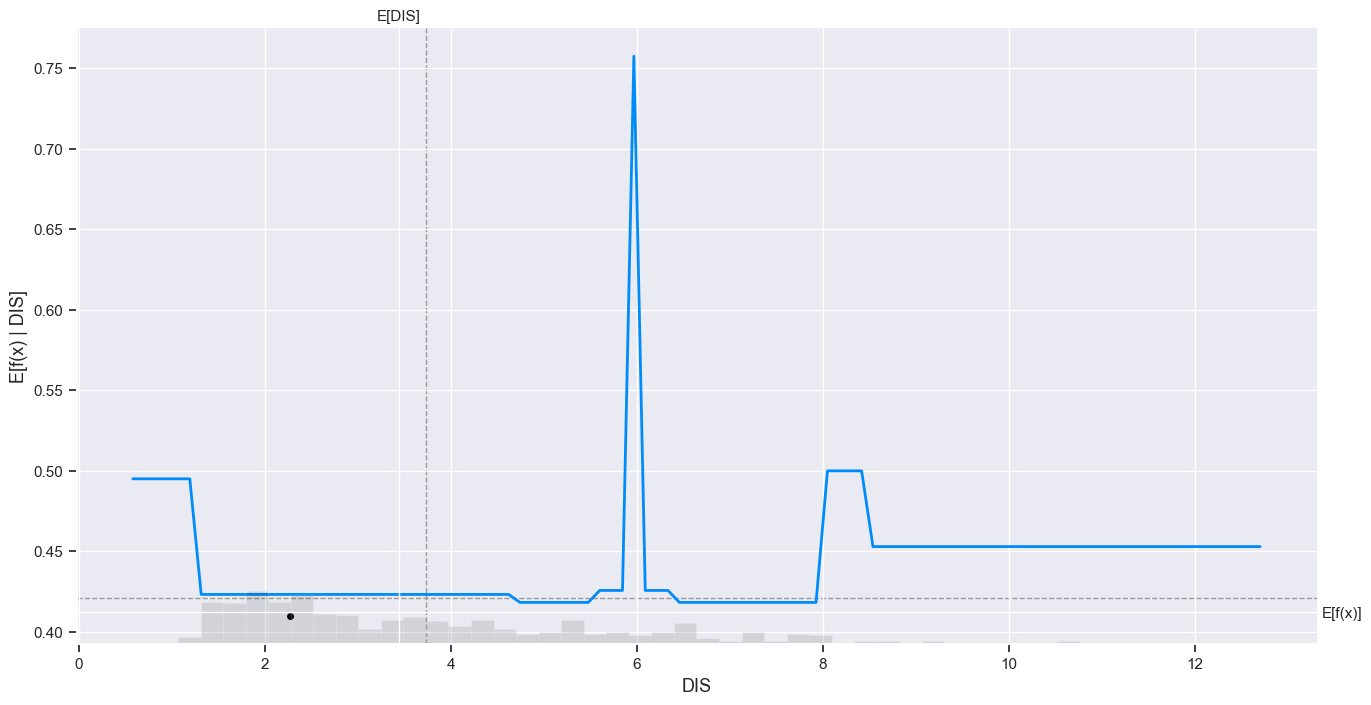

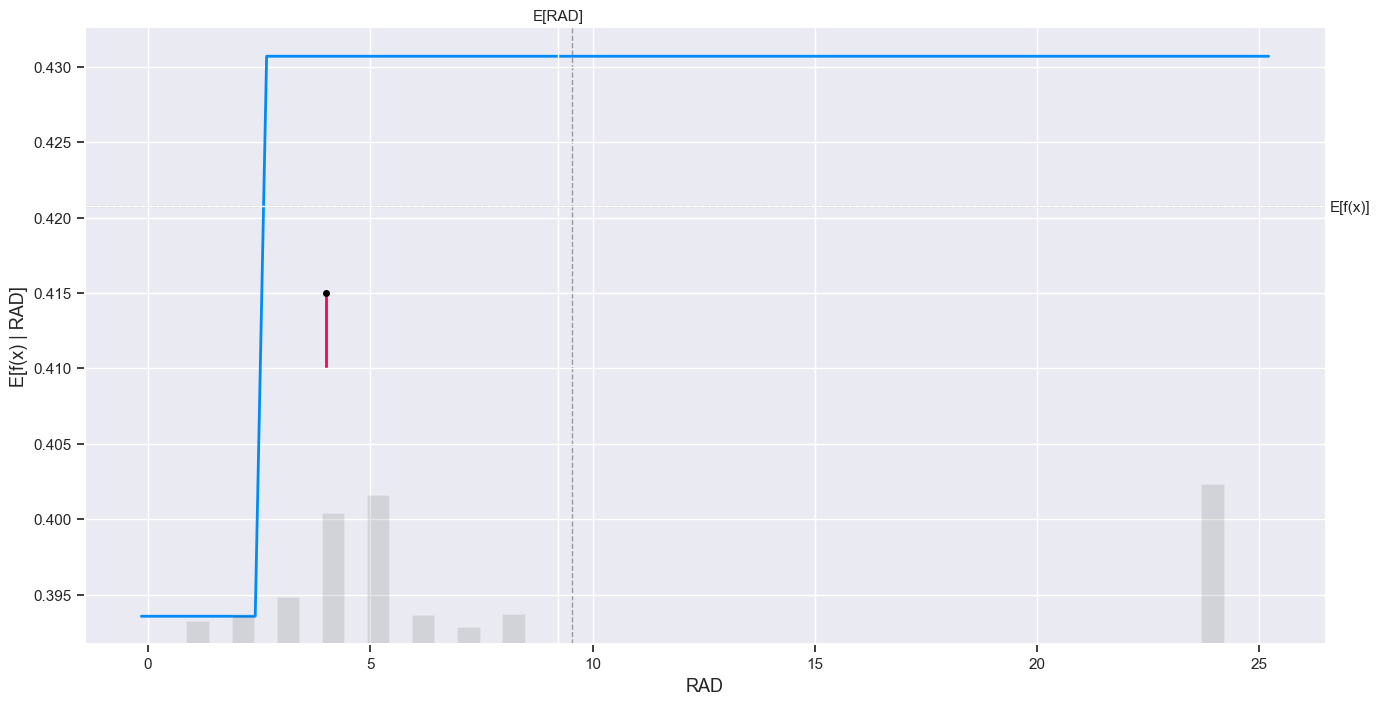

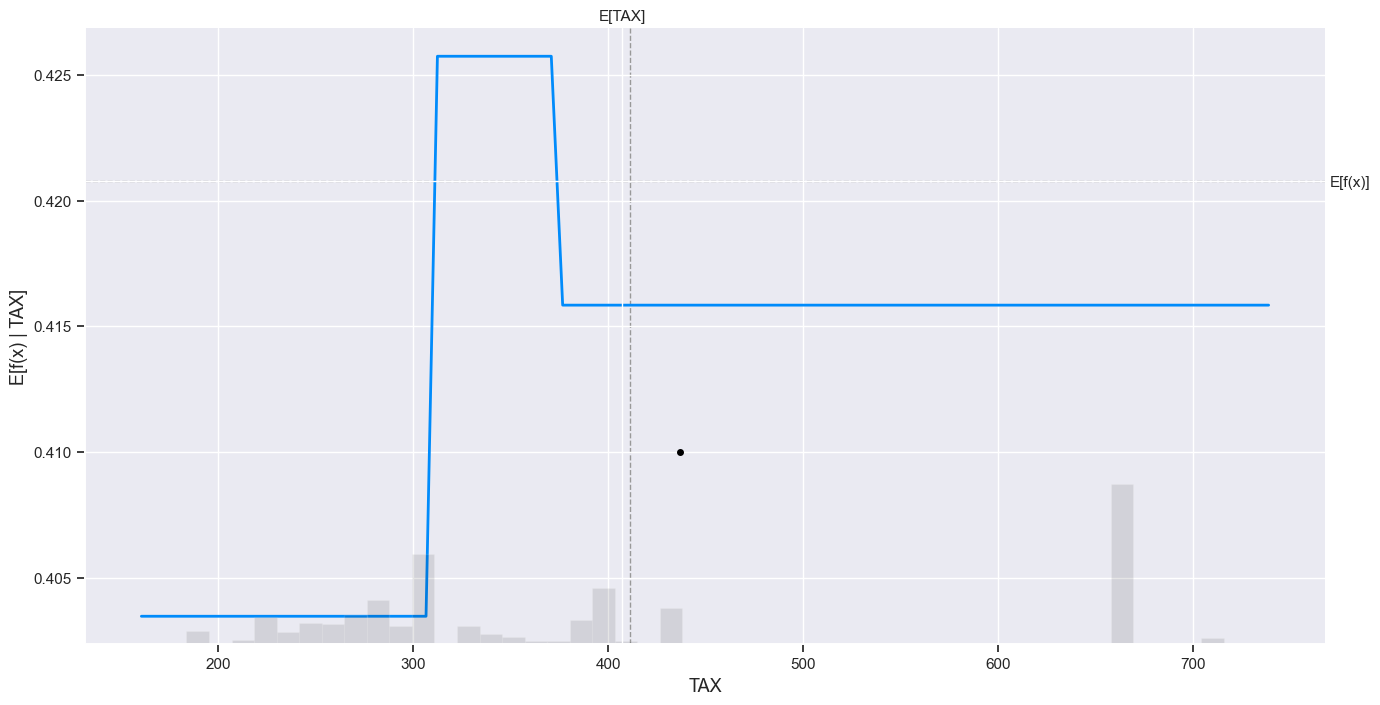

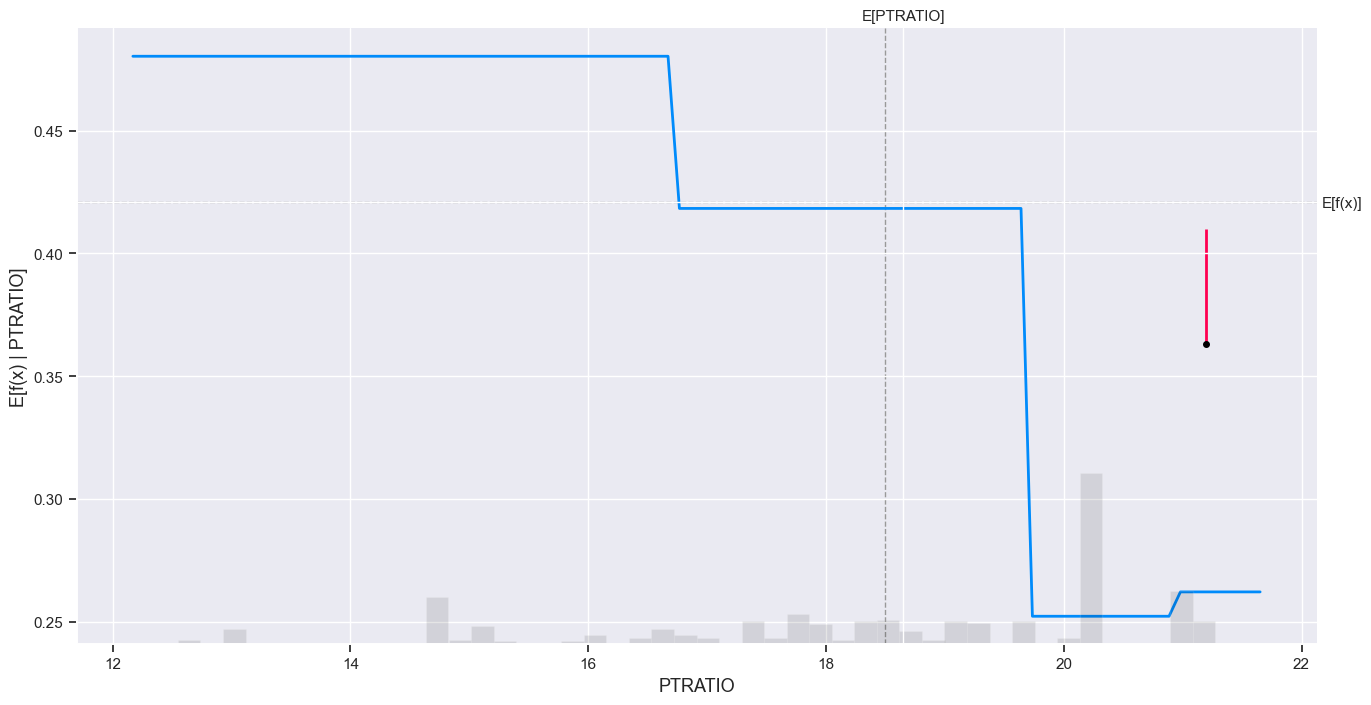

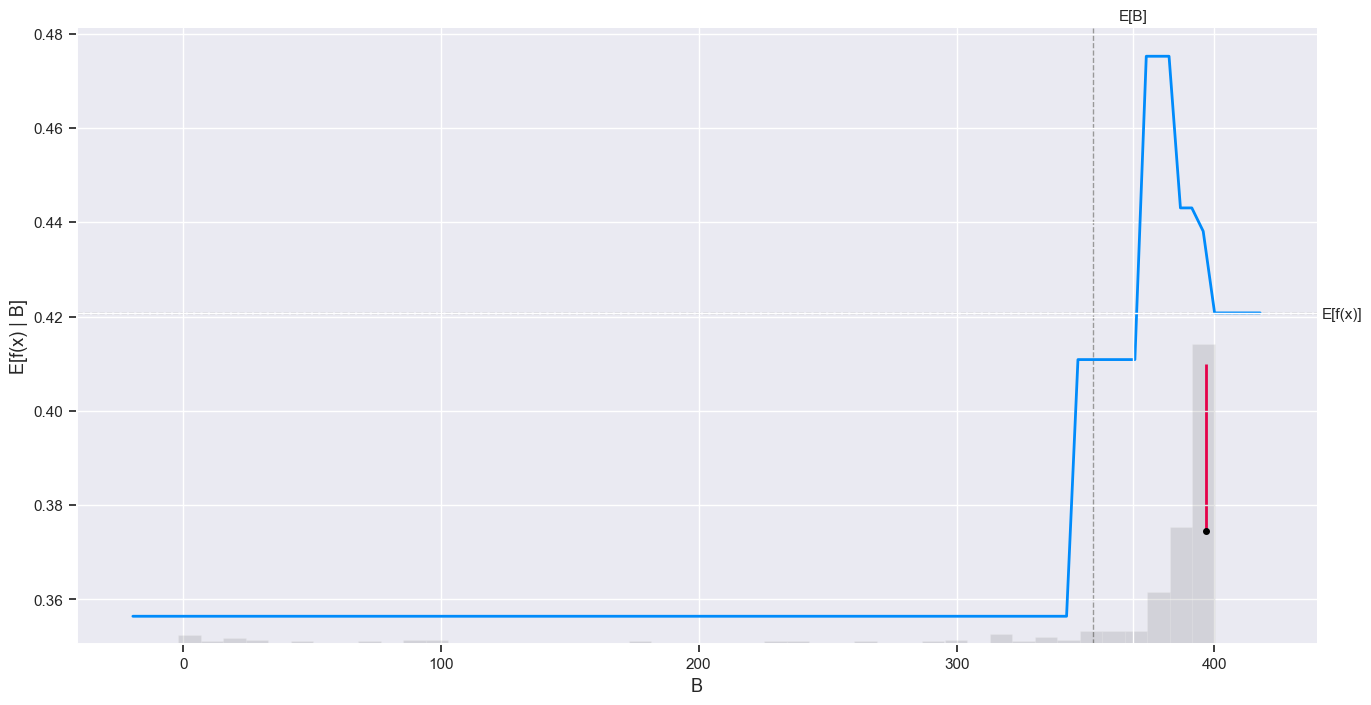

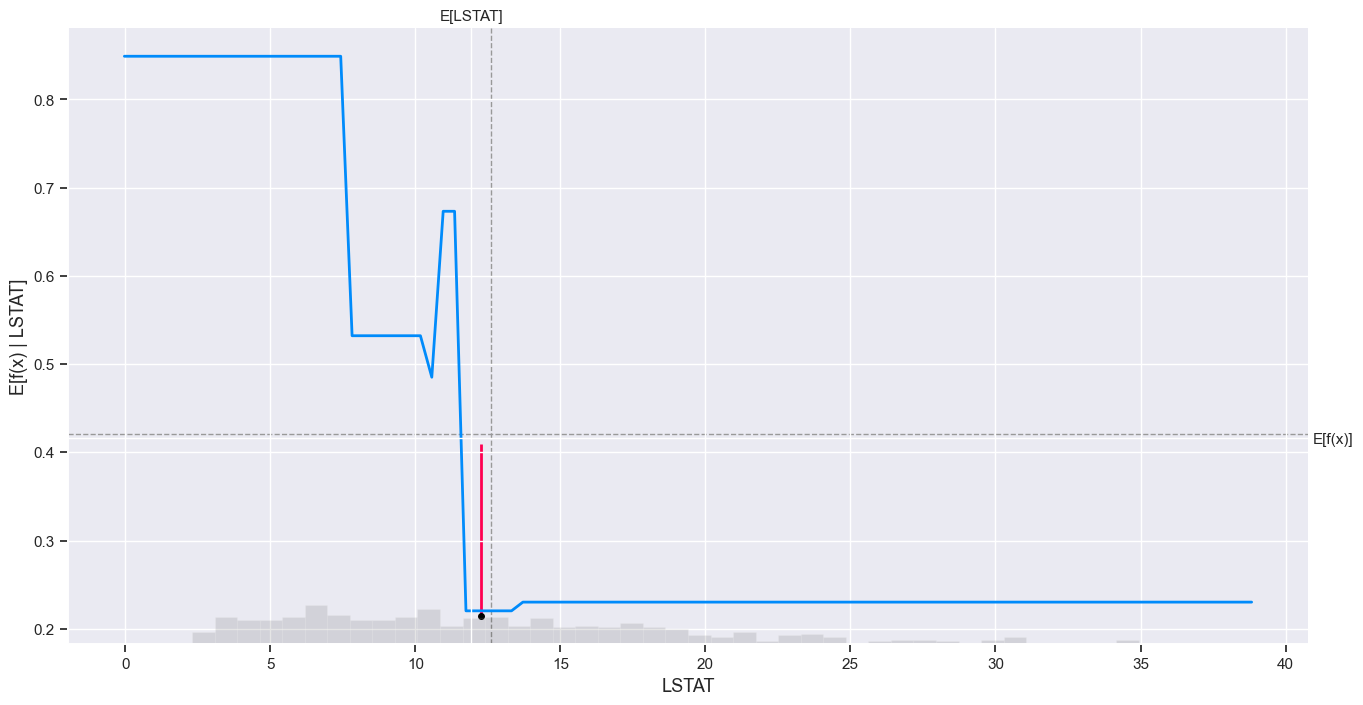

In [ ]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(DT_model.predict, X_train)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        DT_model.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

## Interpreting SHAP Feature Importance Plot for Tree based model

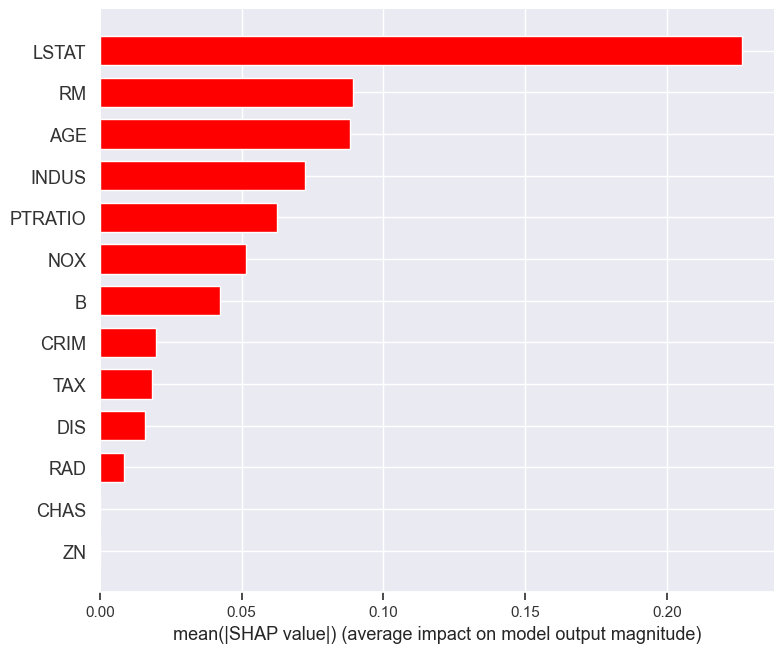

In [ ]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, X_train, plot_type="bar", color="red")

## Interpreting Waterfall SHAP visualization

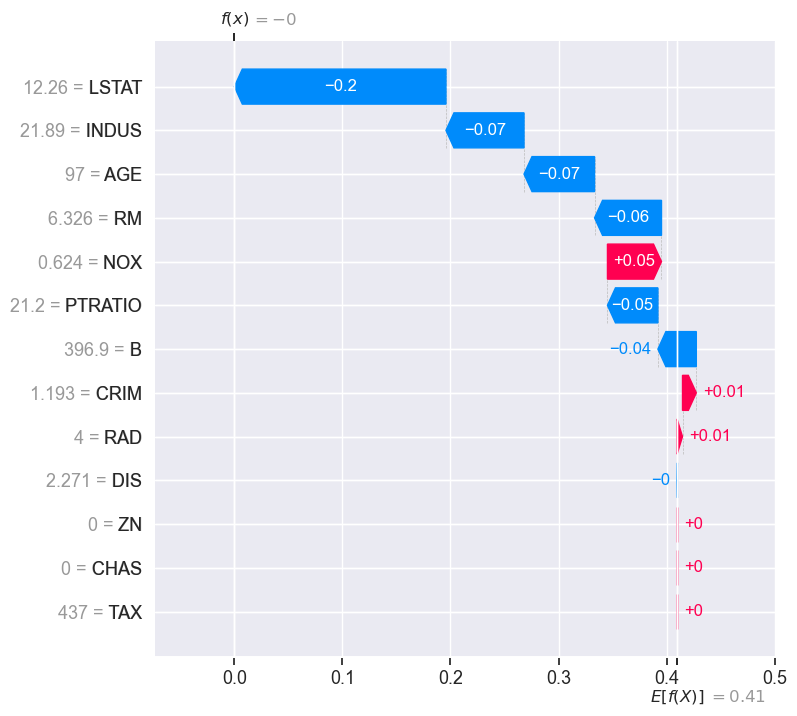

In [ ]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

## SHAP summary for tree based model

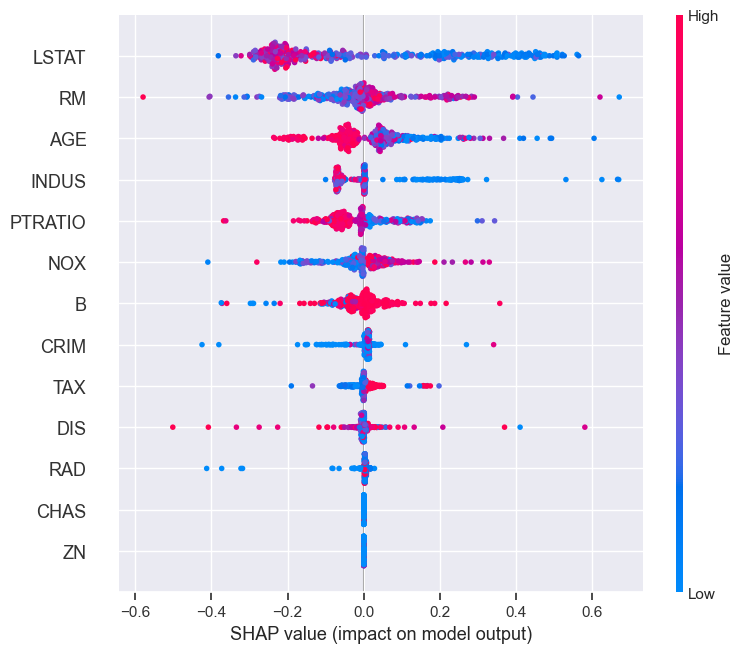

In [ ]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X_train)

## Interpreting SHAP dependence plot for tree based model

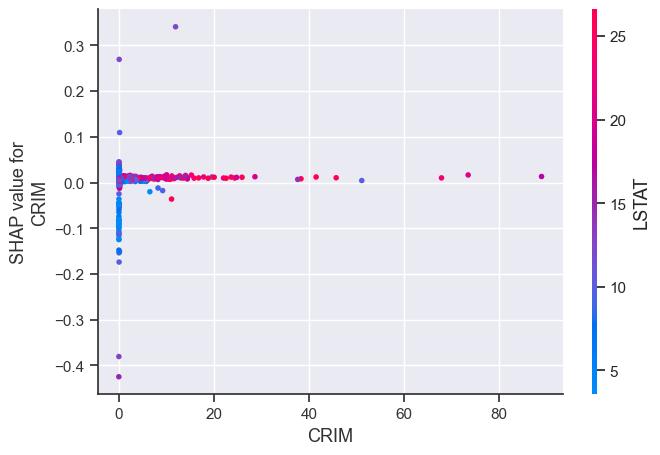

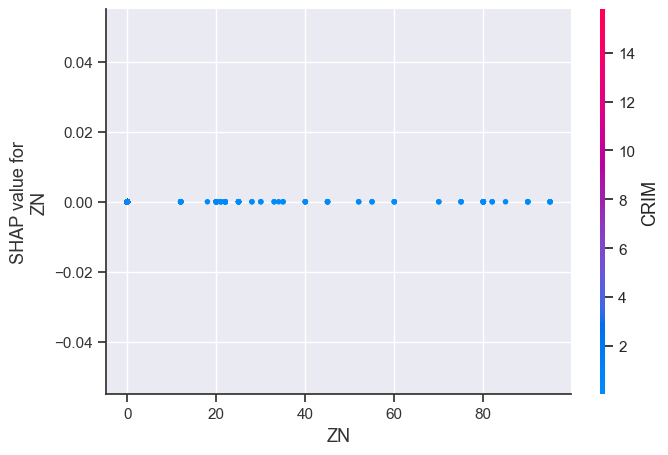

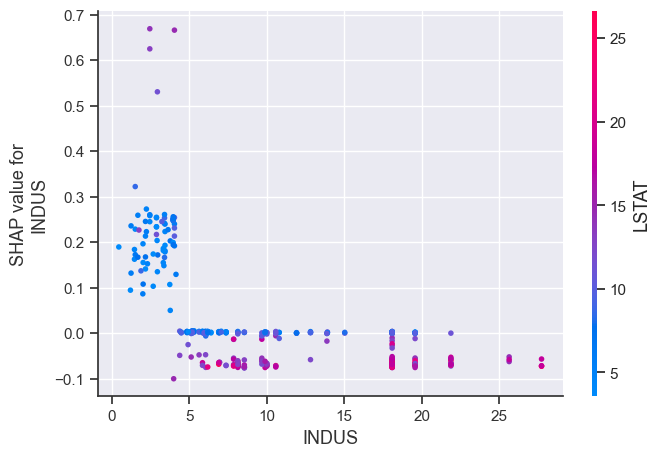

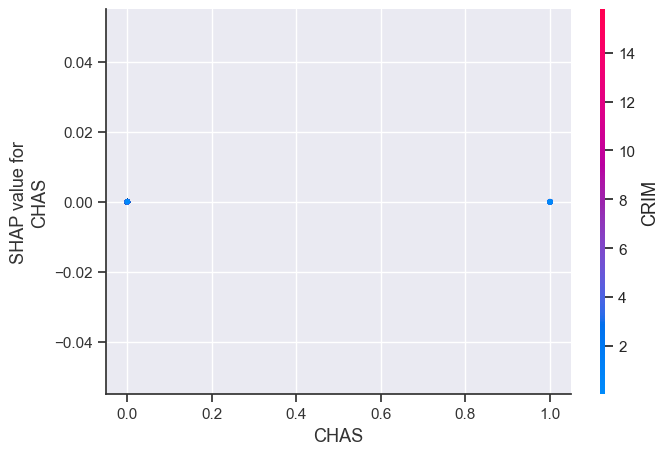

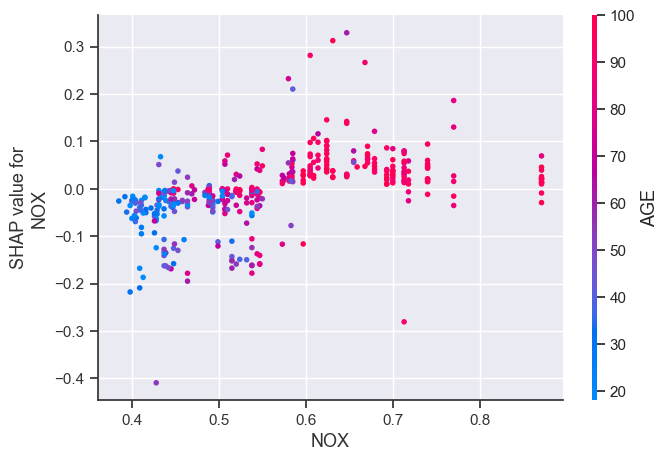

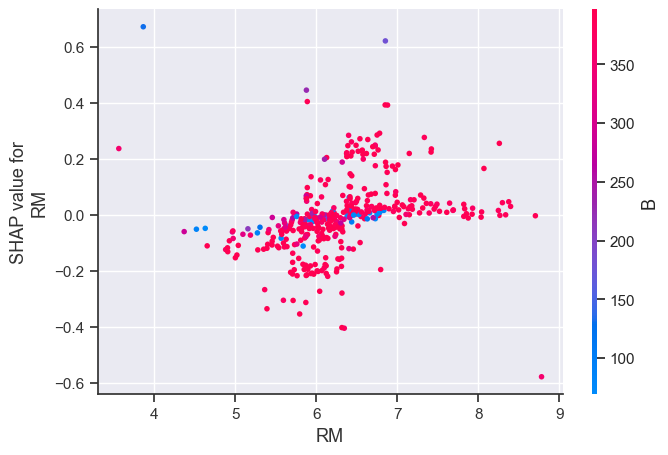

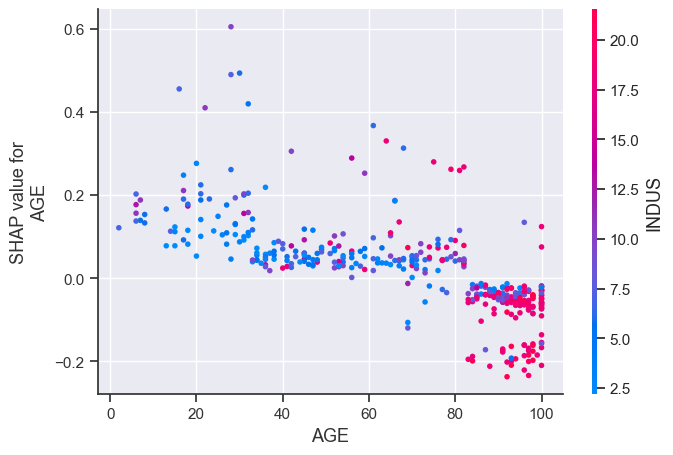

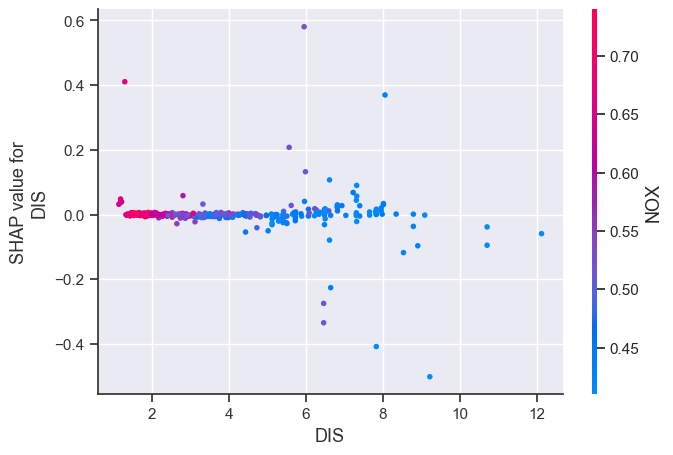

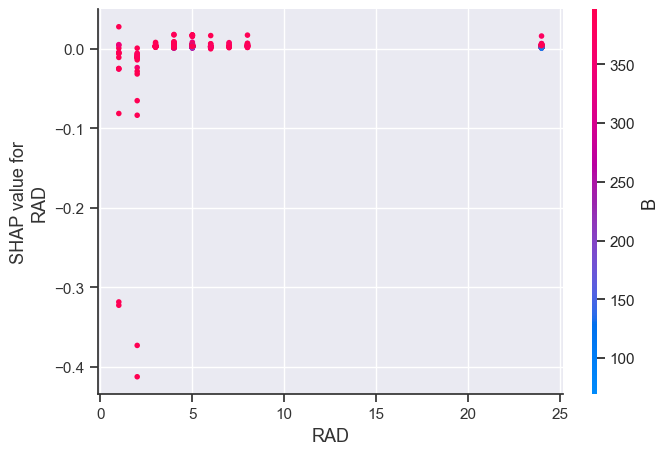

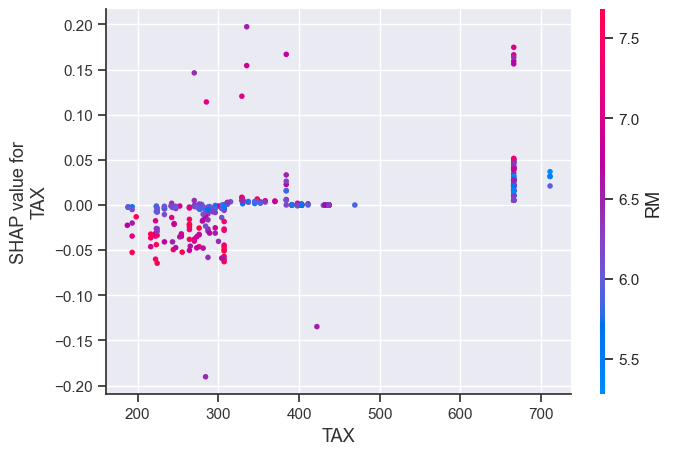

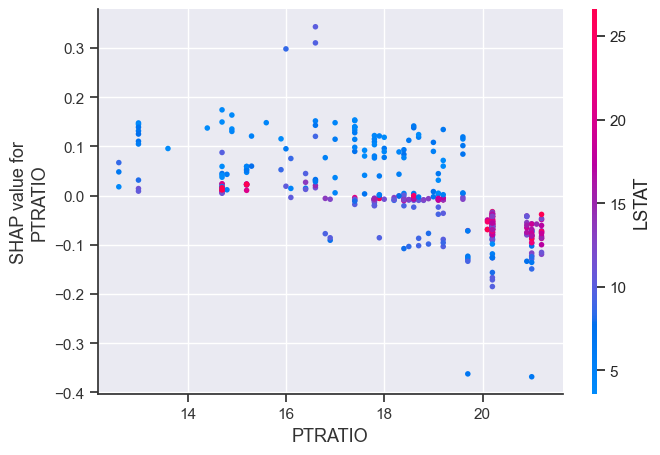

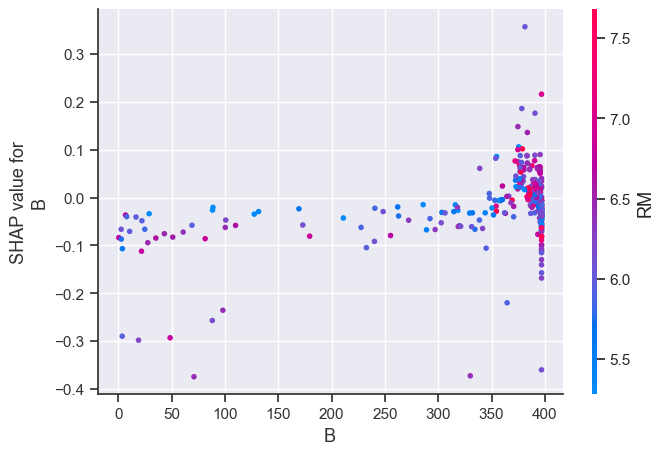

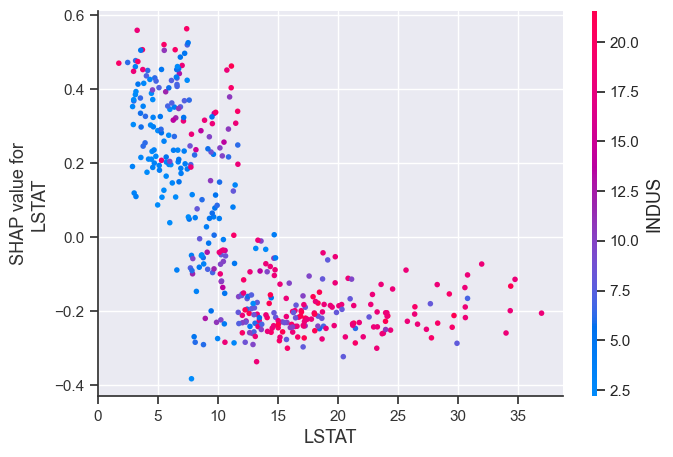

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, X_train)

## 11. SHAP Summary for a linear model

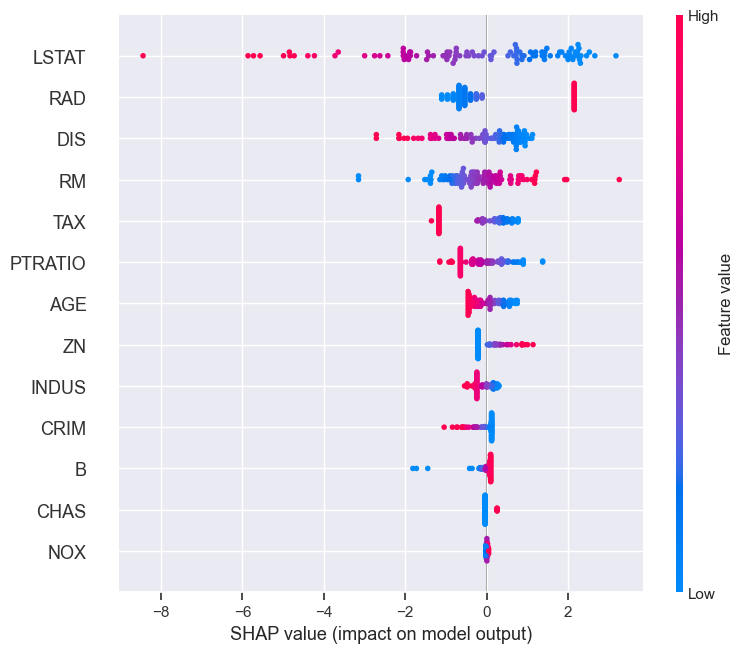

In [ ]:
explainer = shap.LinearExplainer(lr_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## SHAP Analysis for Linear Model

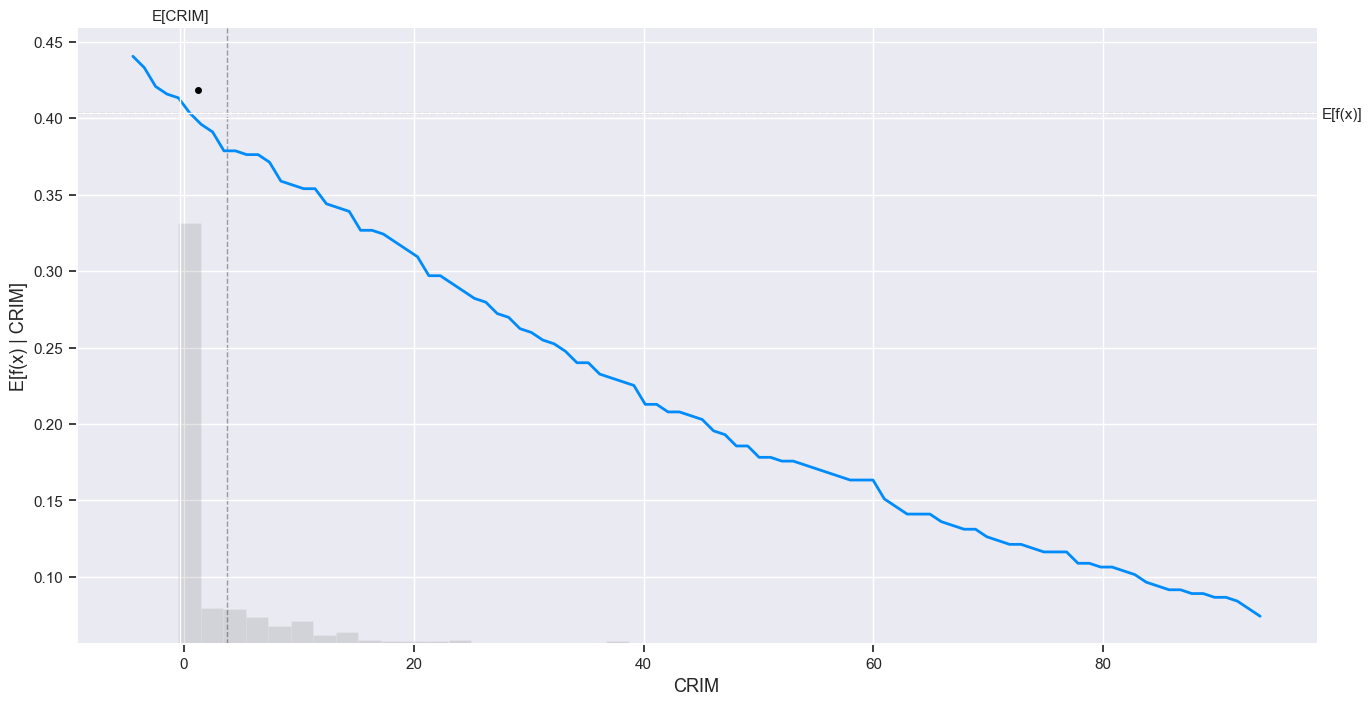

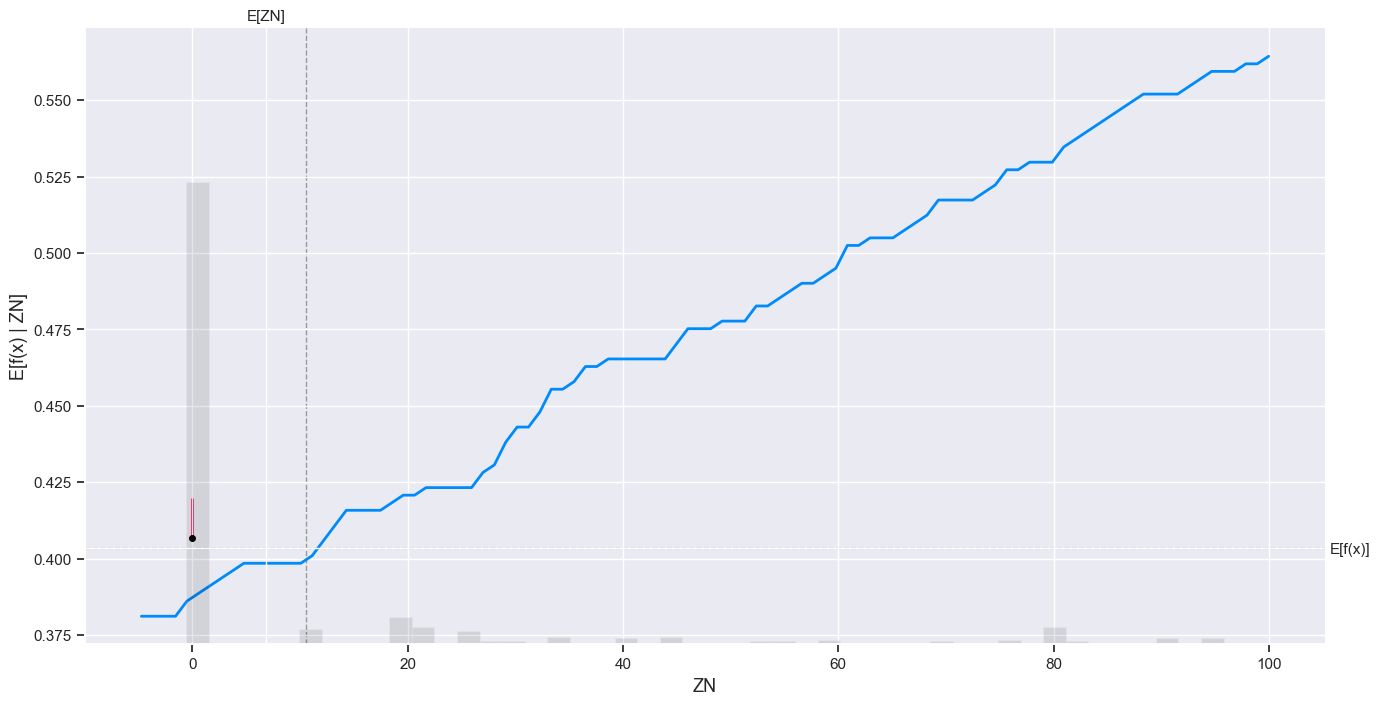

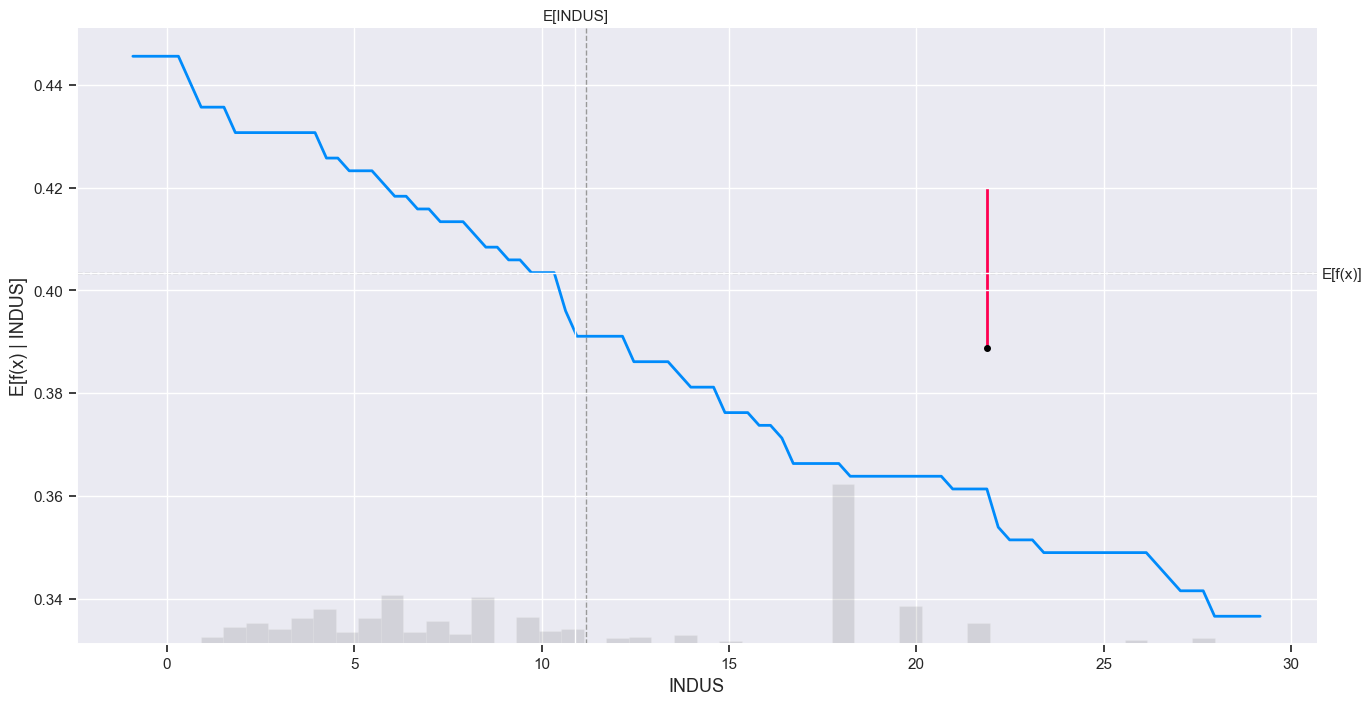

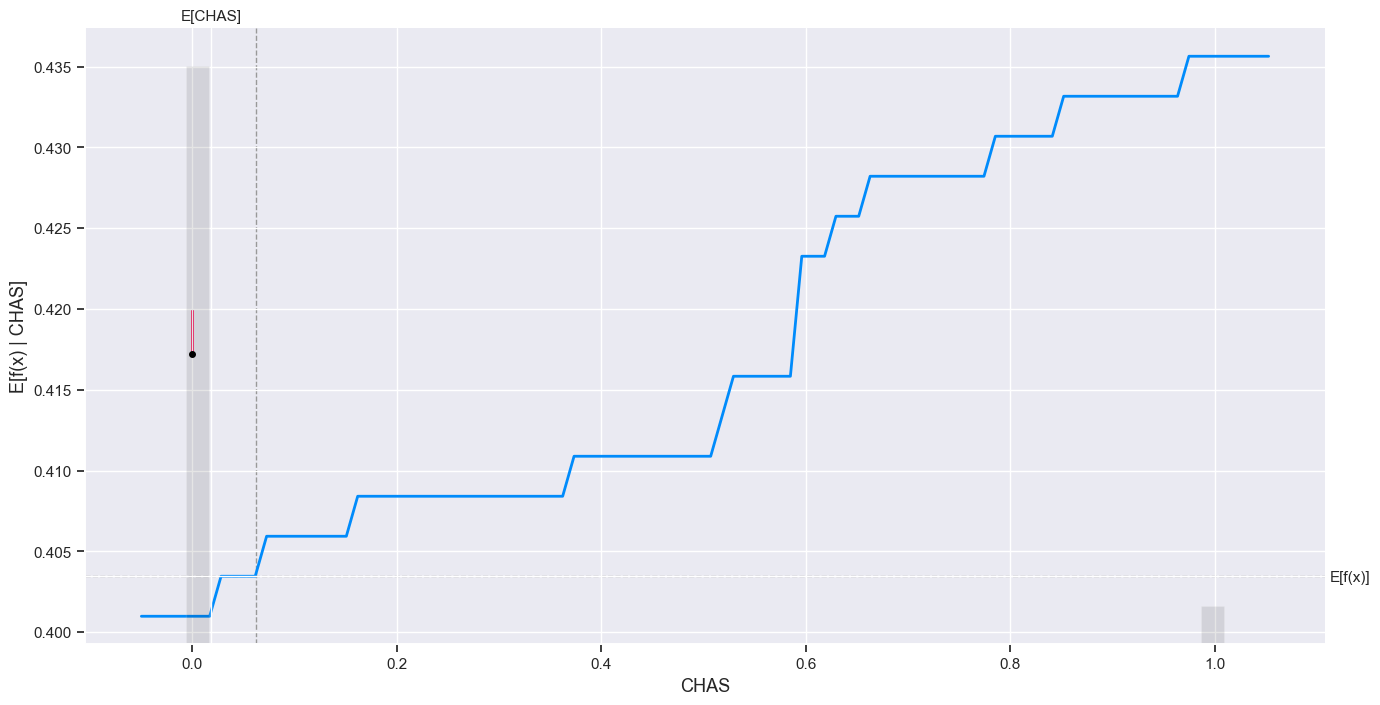

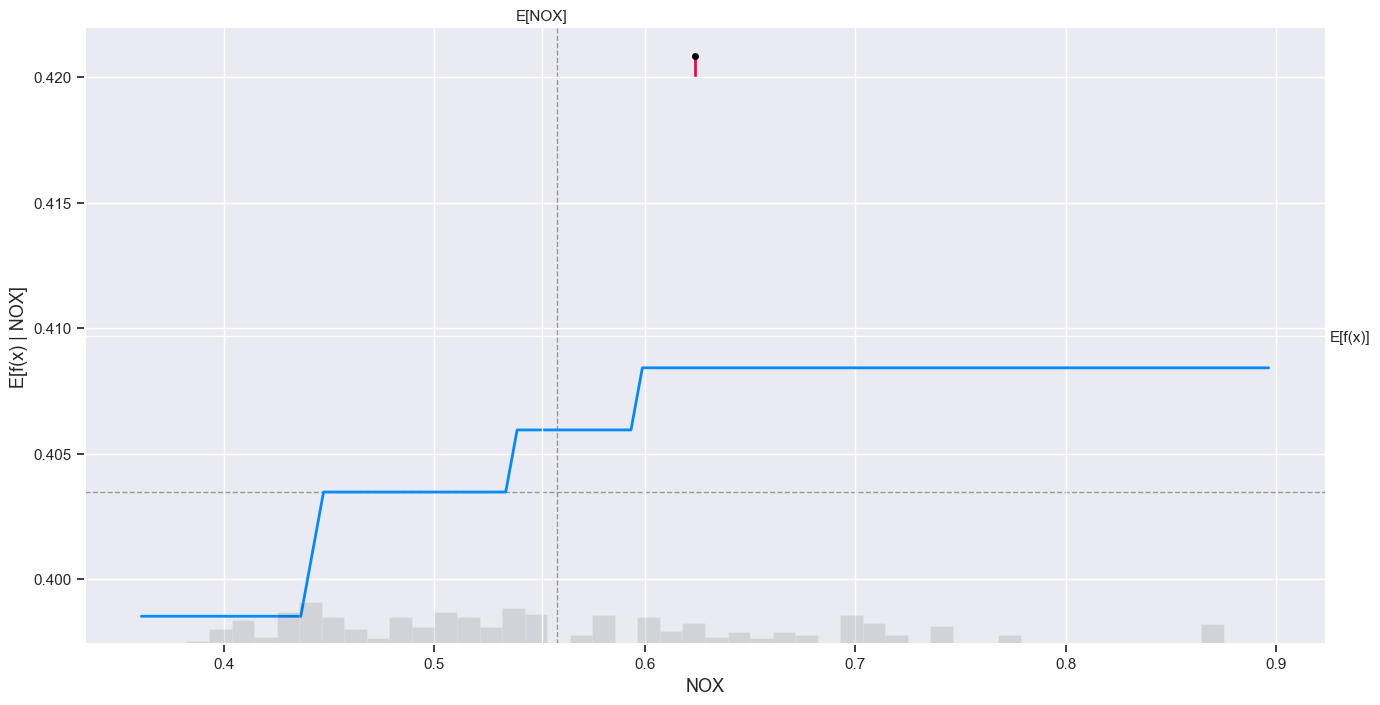

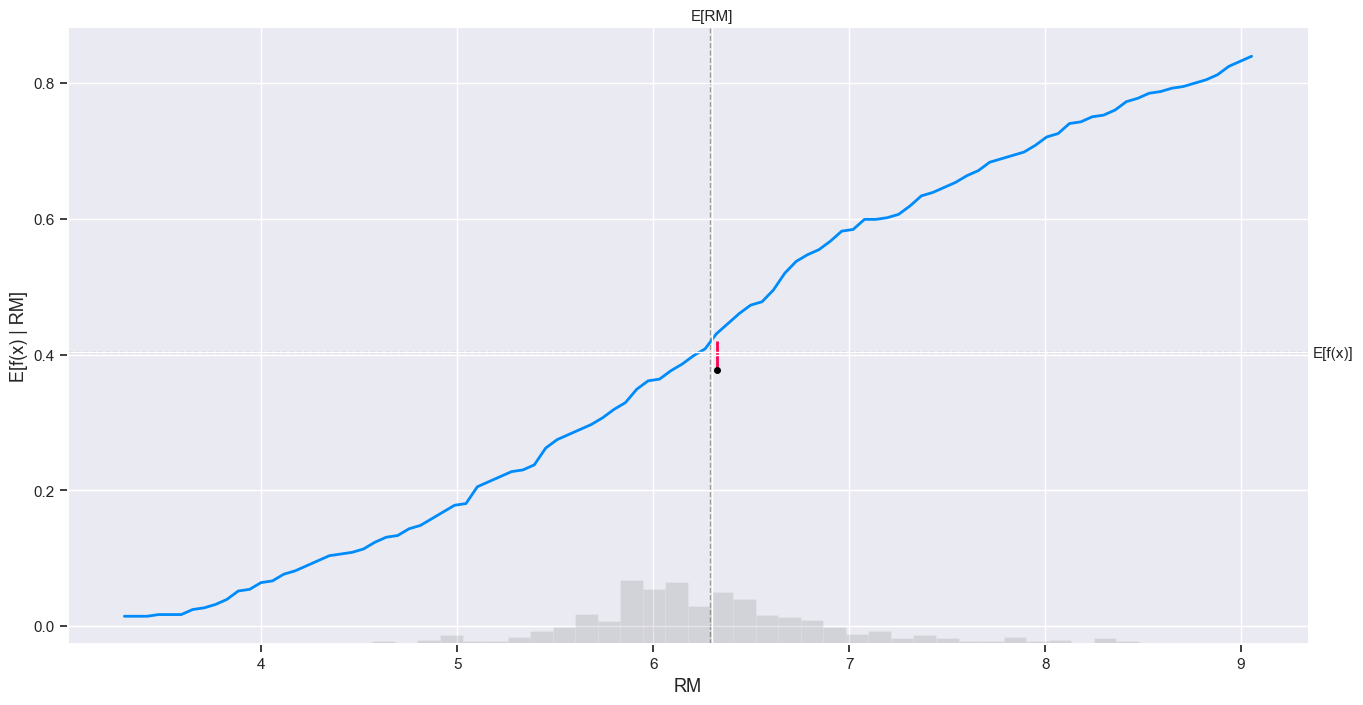

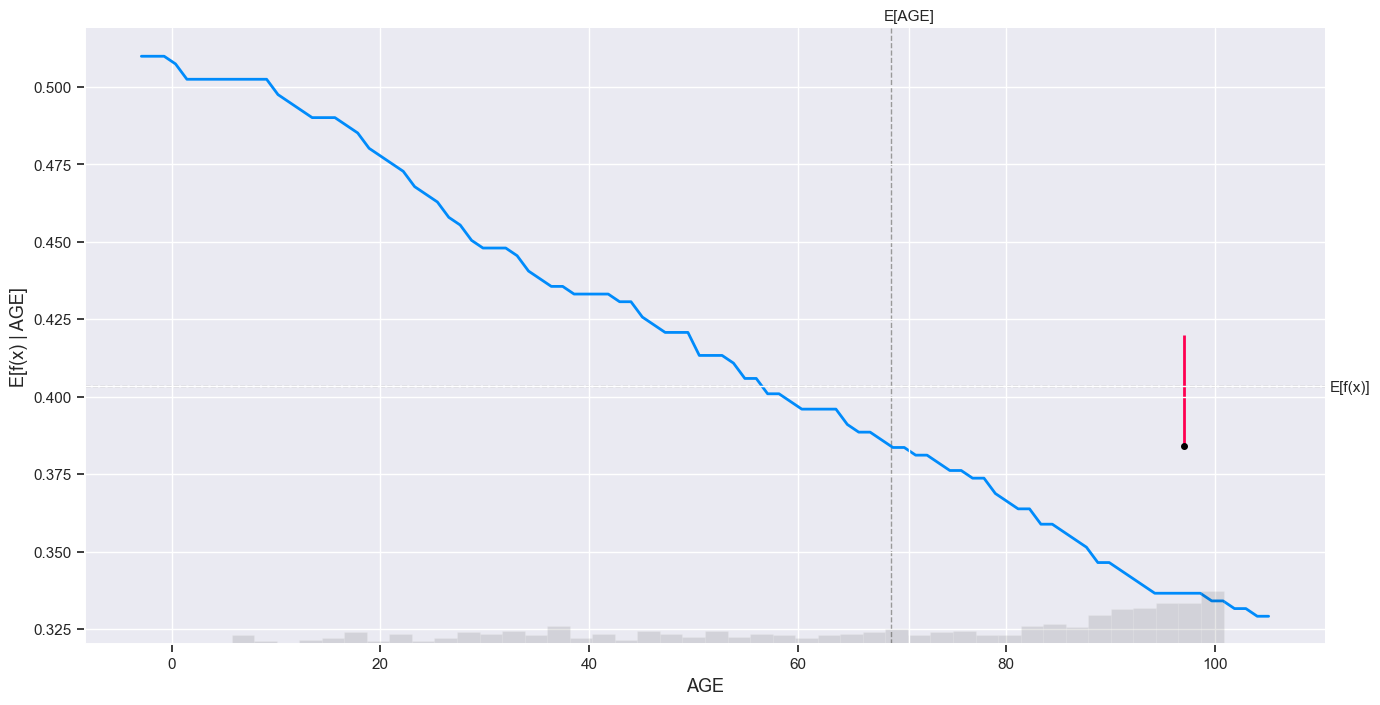

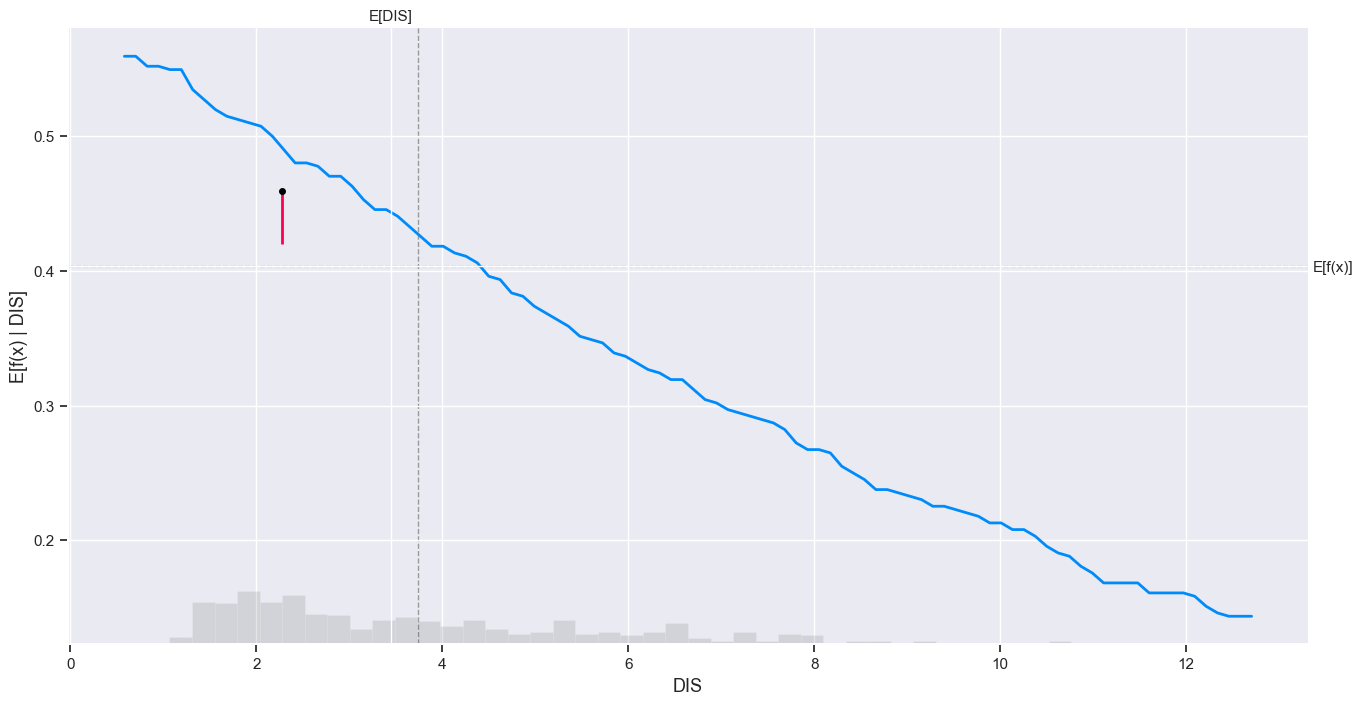

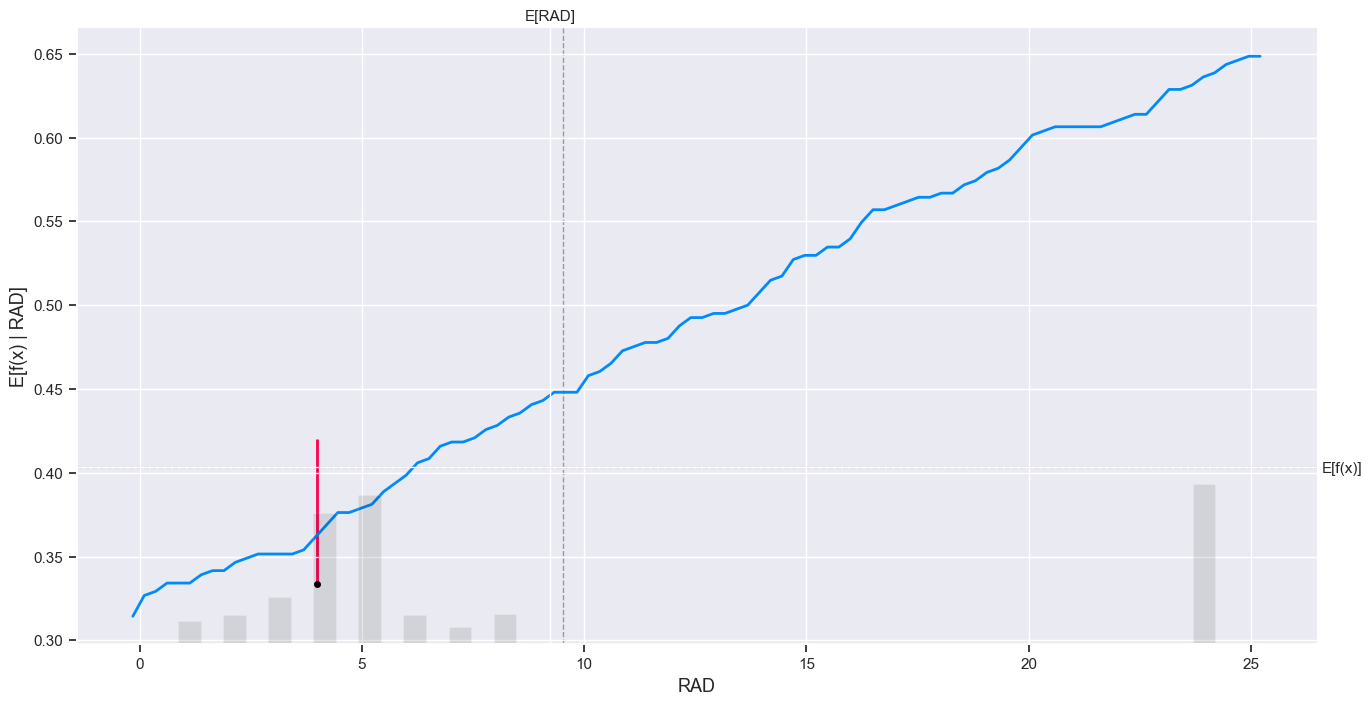

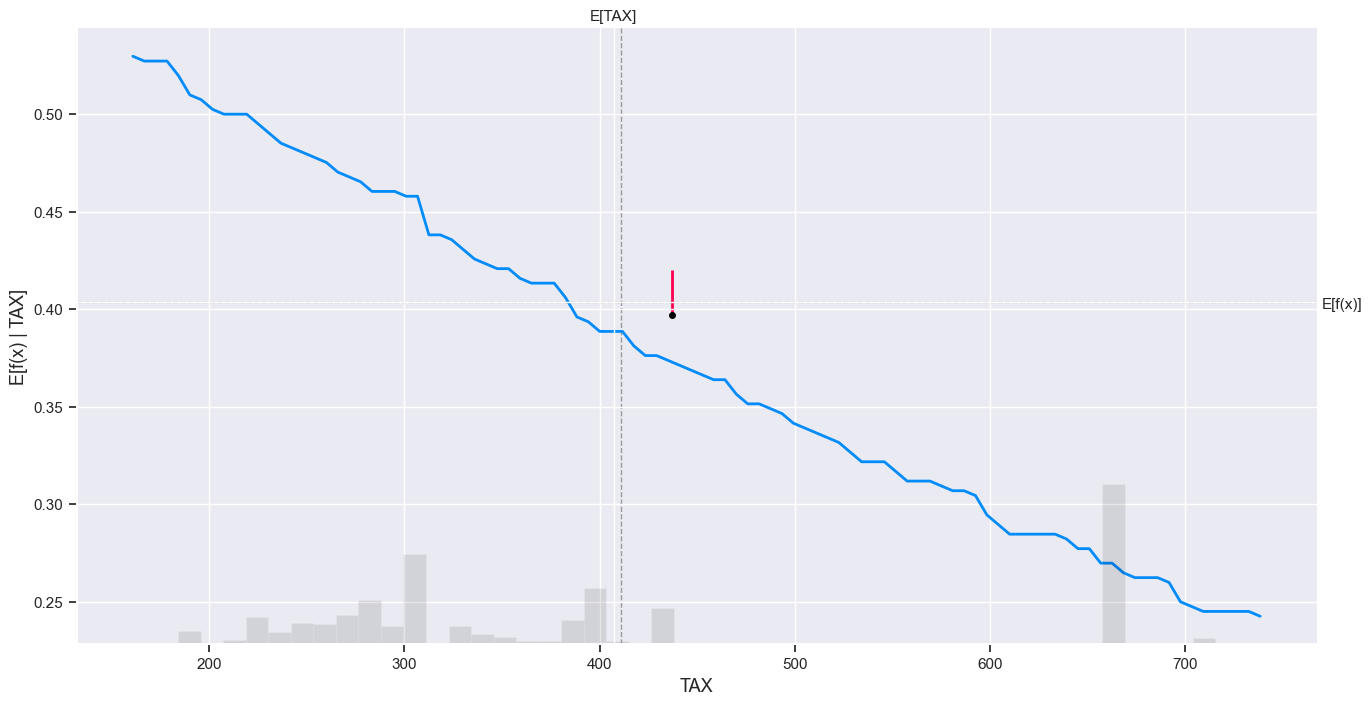

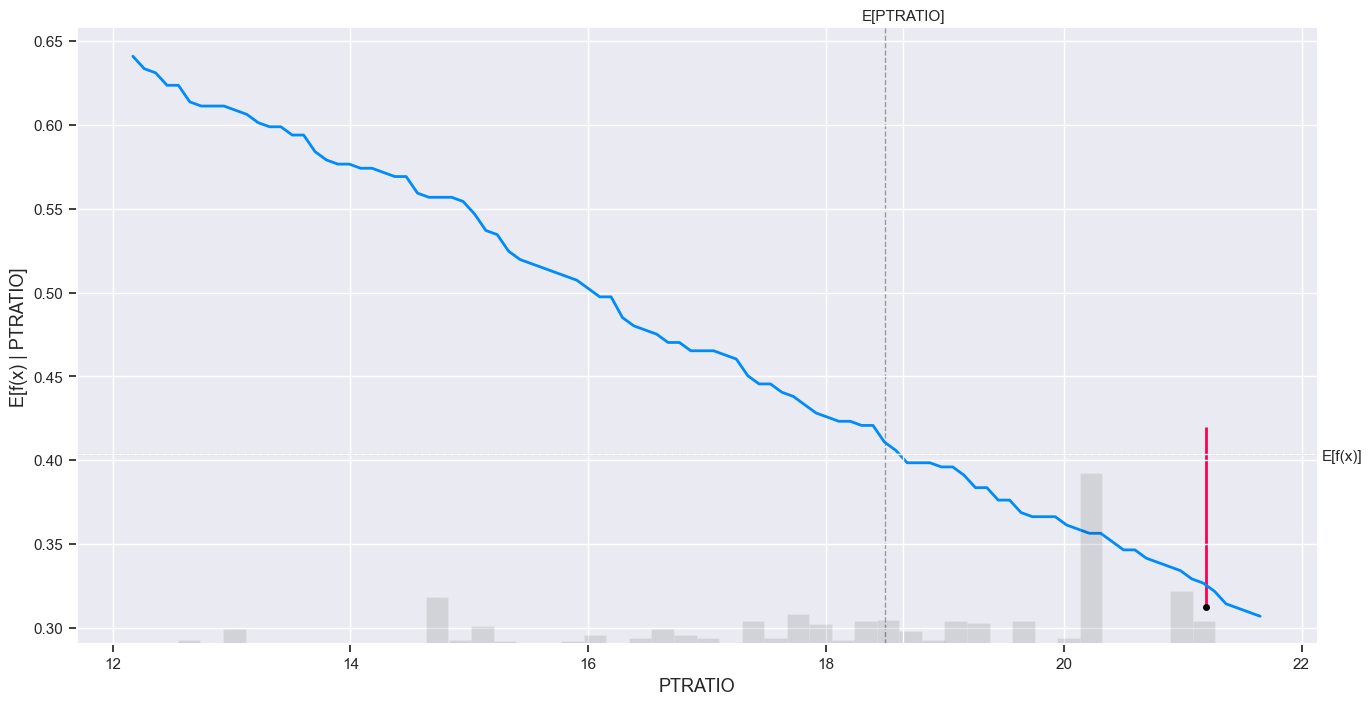

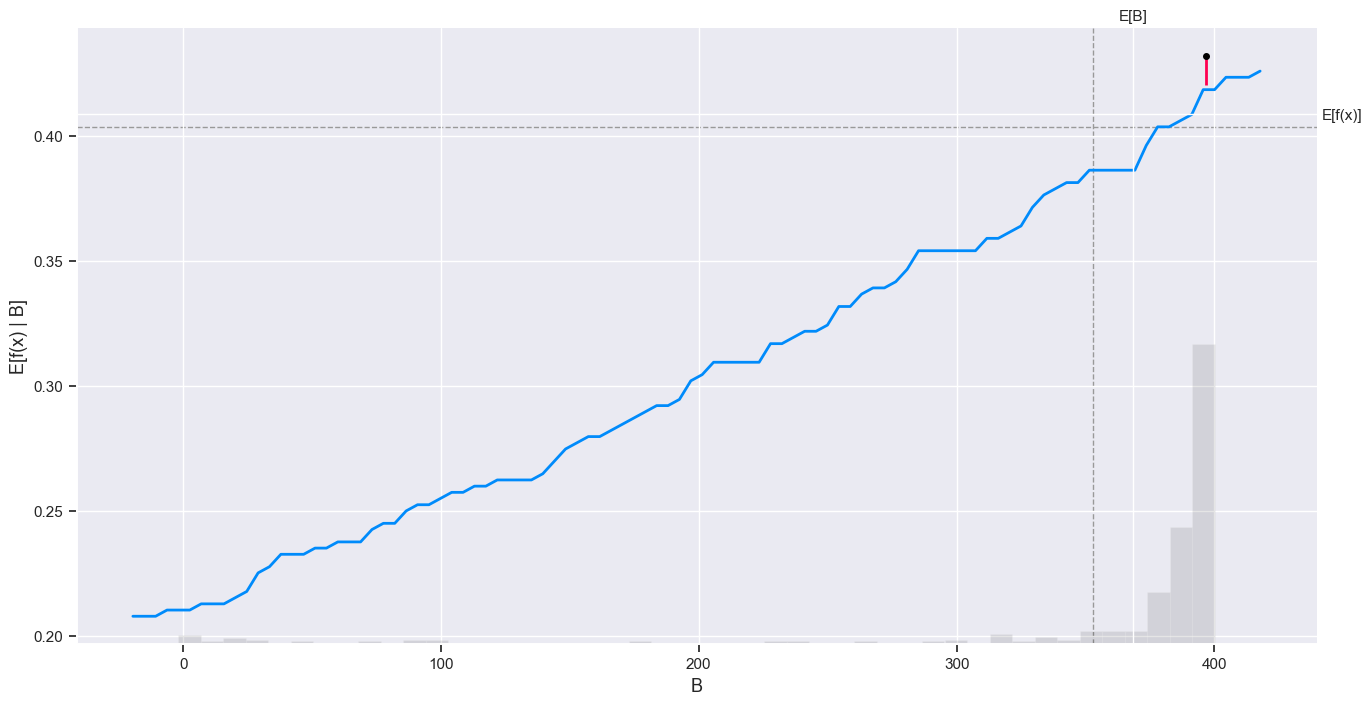

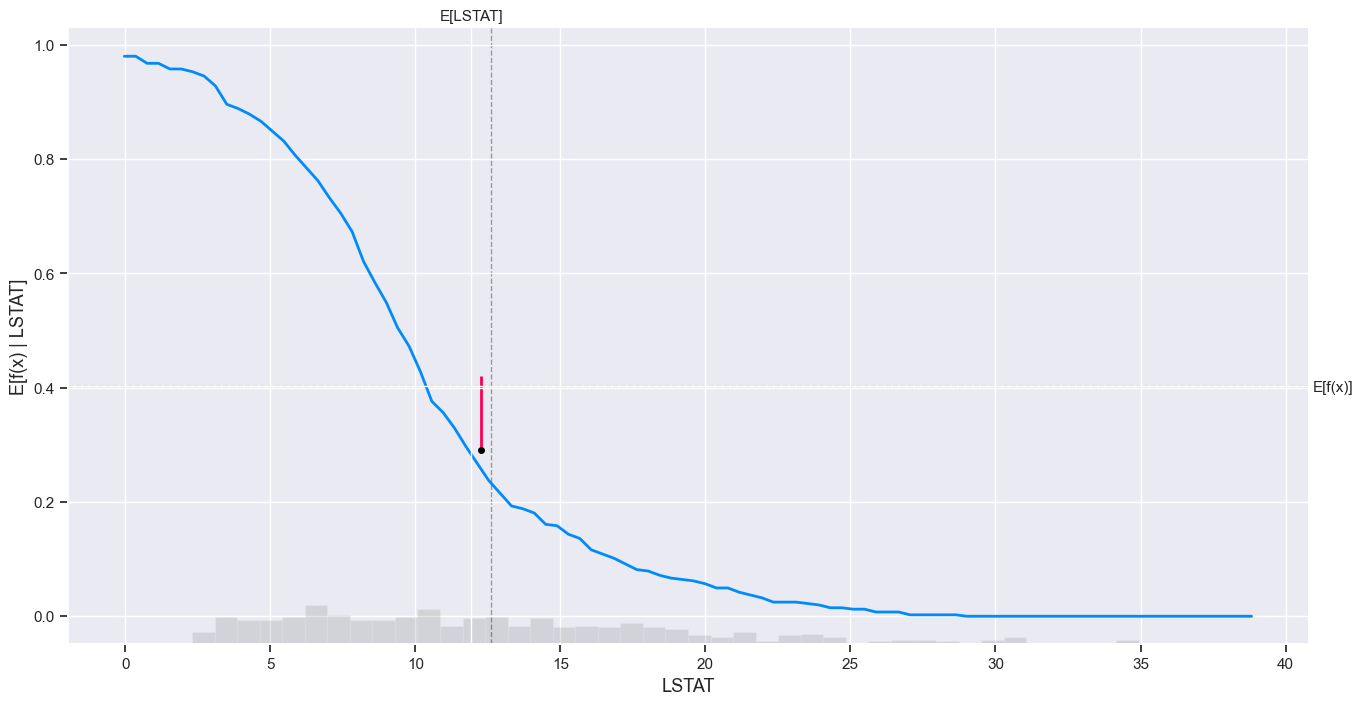

In [ ]:
# SHAP explanation of a Linear Model
logistic_explainer = shap.Explainer(lr_model.predict, X_train)
linear_shap_values = logistic_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        lr_model.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

## Interpreting SHAP Feature Importance Plot for Linear model

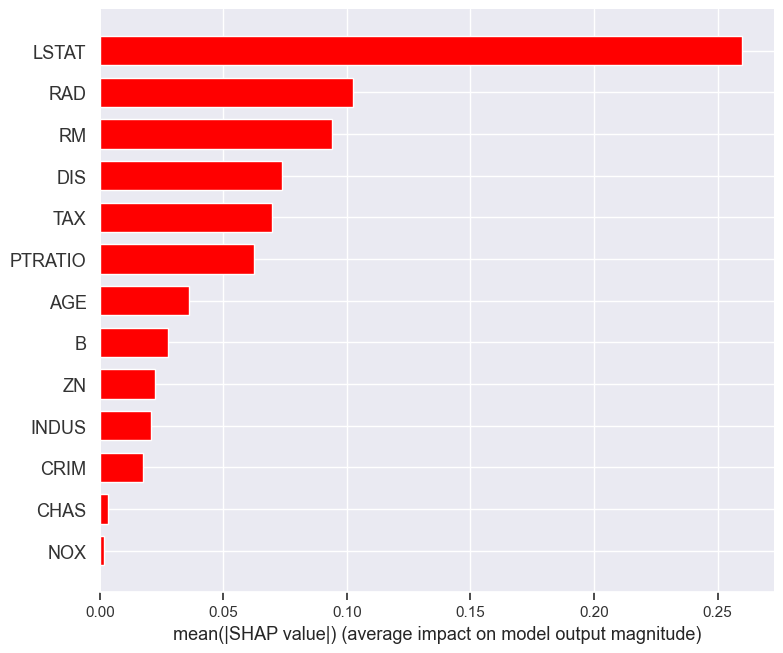

In [ ]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, X_train, plot_type="bar", color="red")

## Interpreting Waterfall SHAP visualization

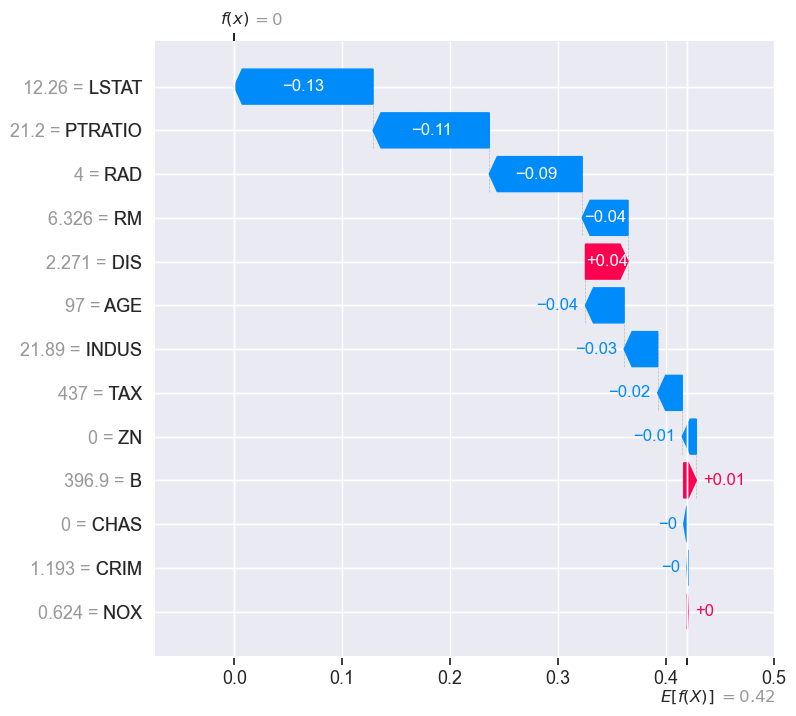

In [ ]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

## Interpreting SHAP dependence plot for Linear model

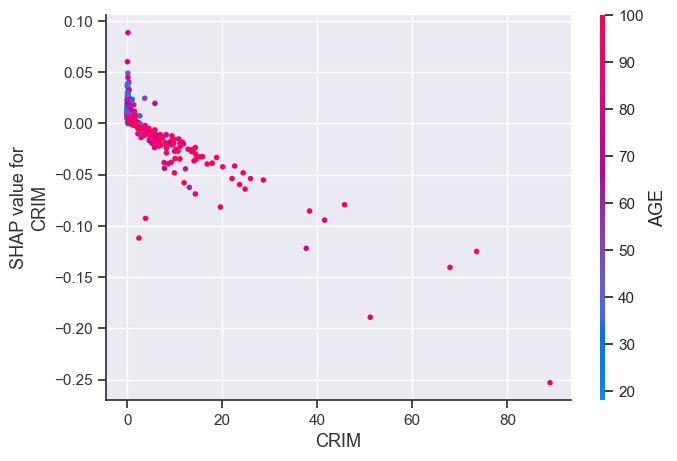

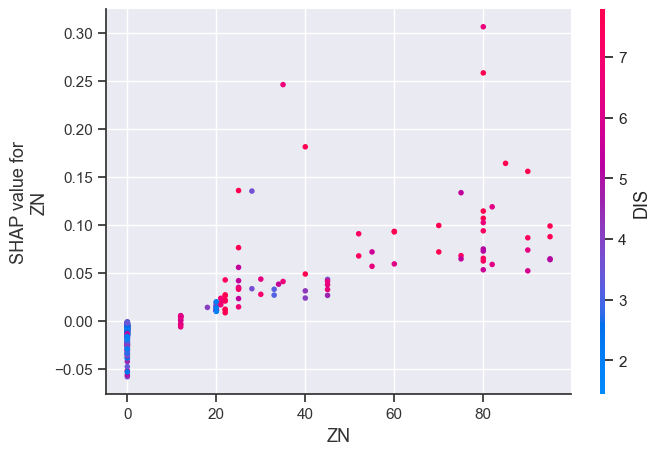

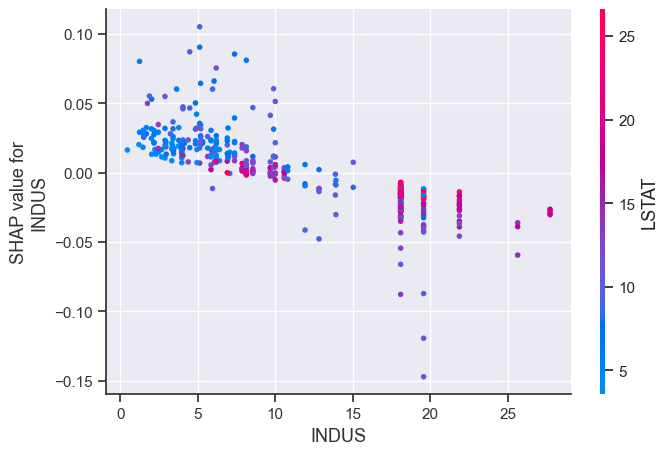

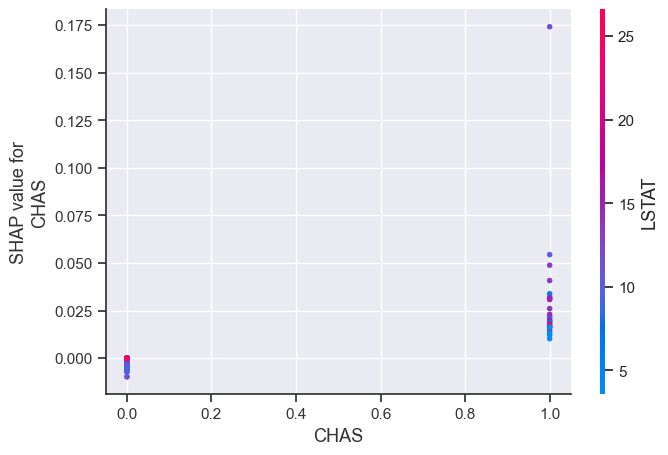

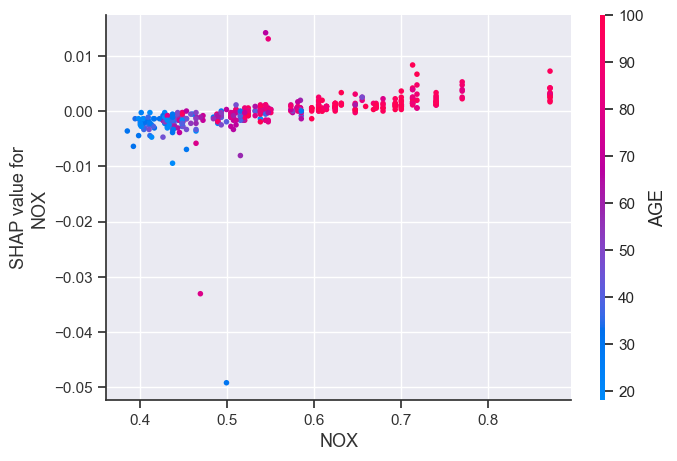

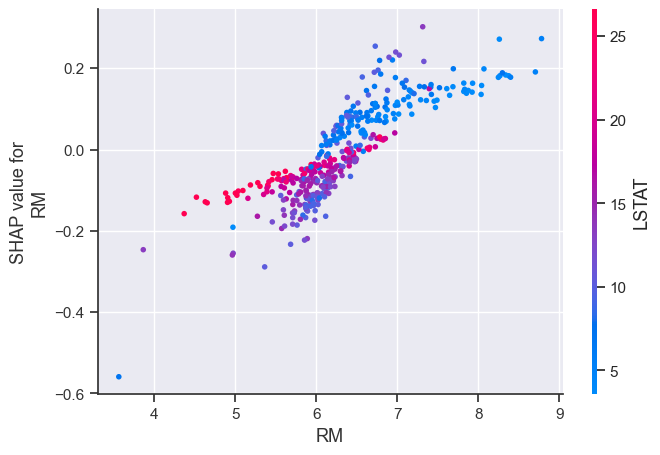

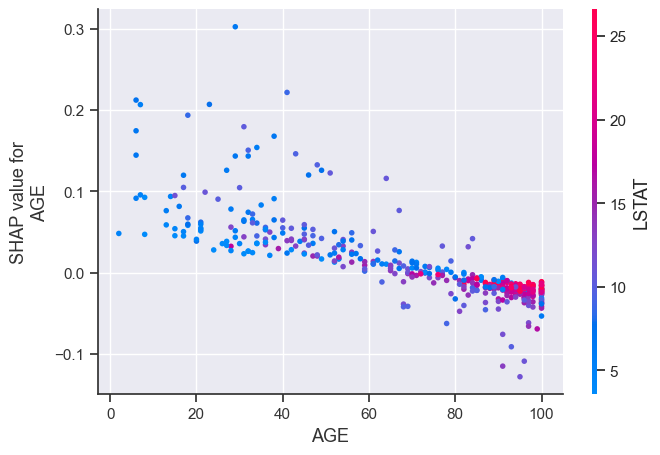

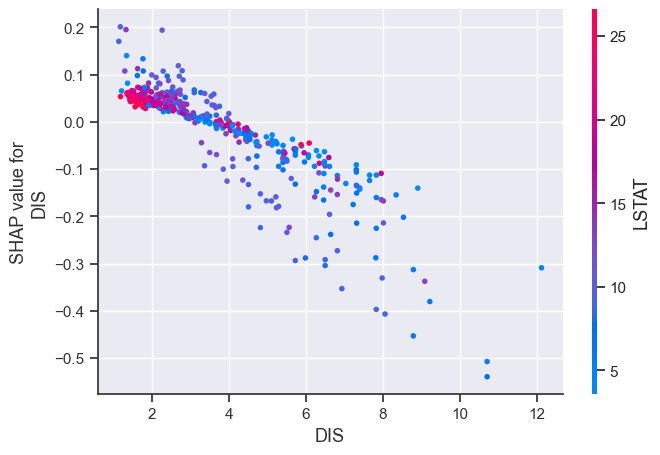

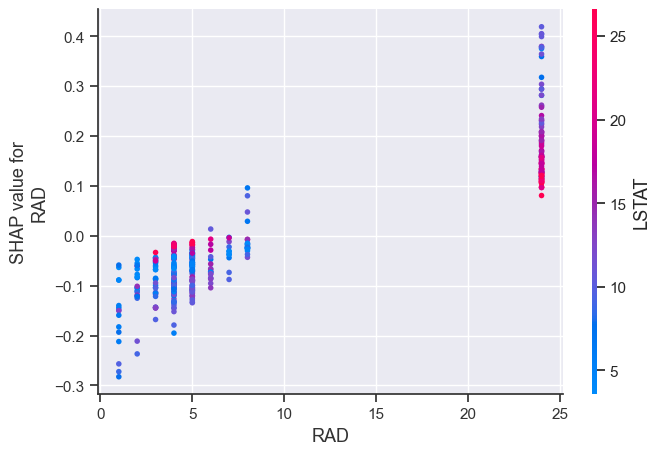

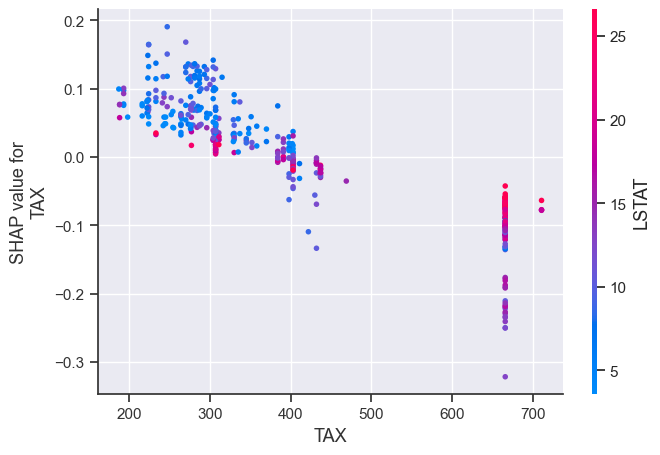

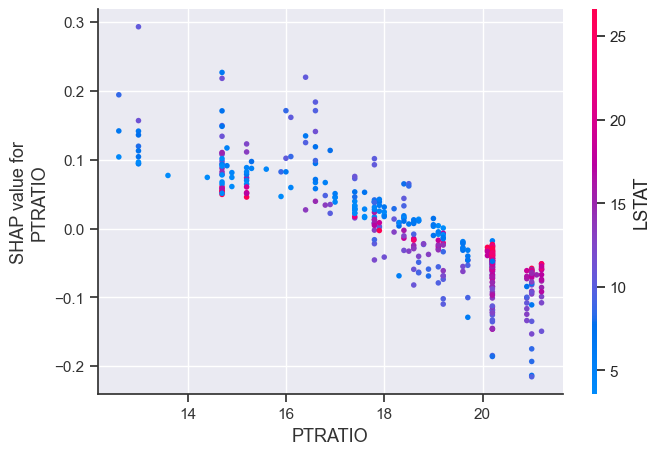

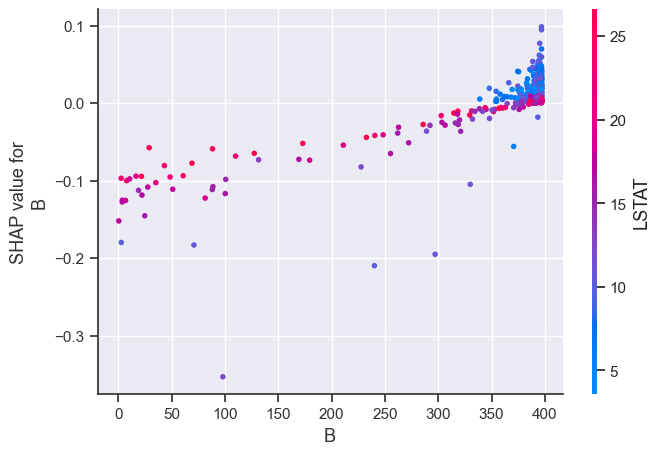

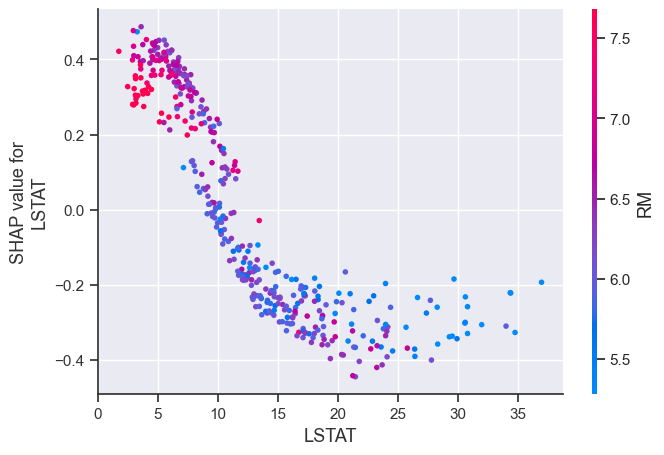

In [ ]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, X_train)

## 12. SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

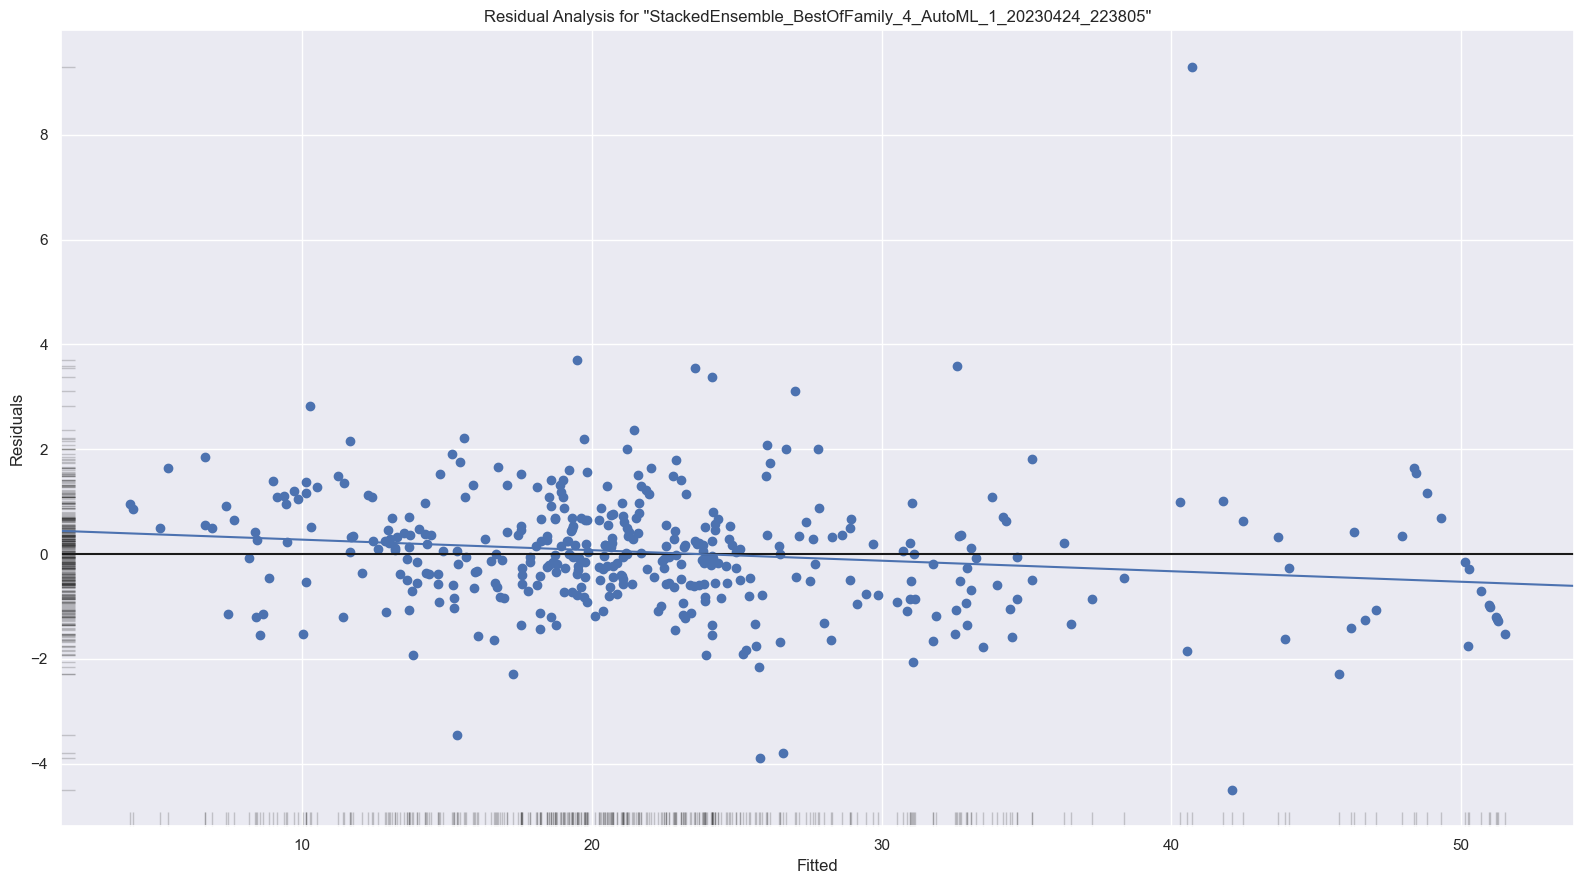

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

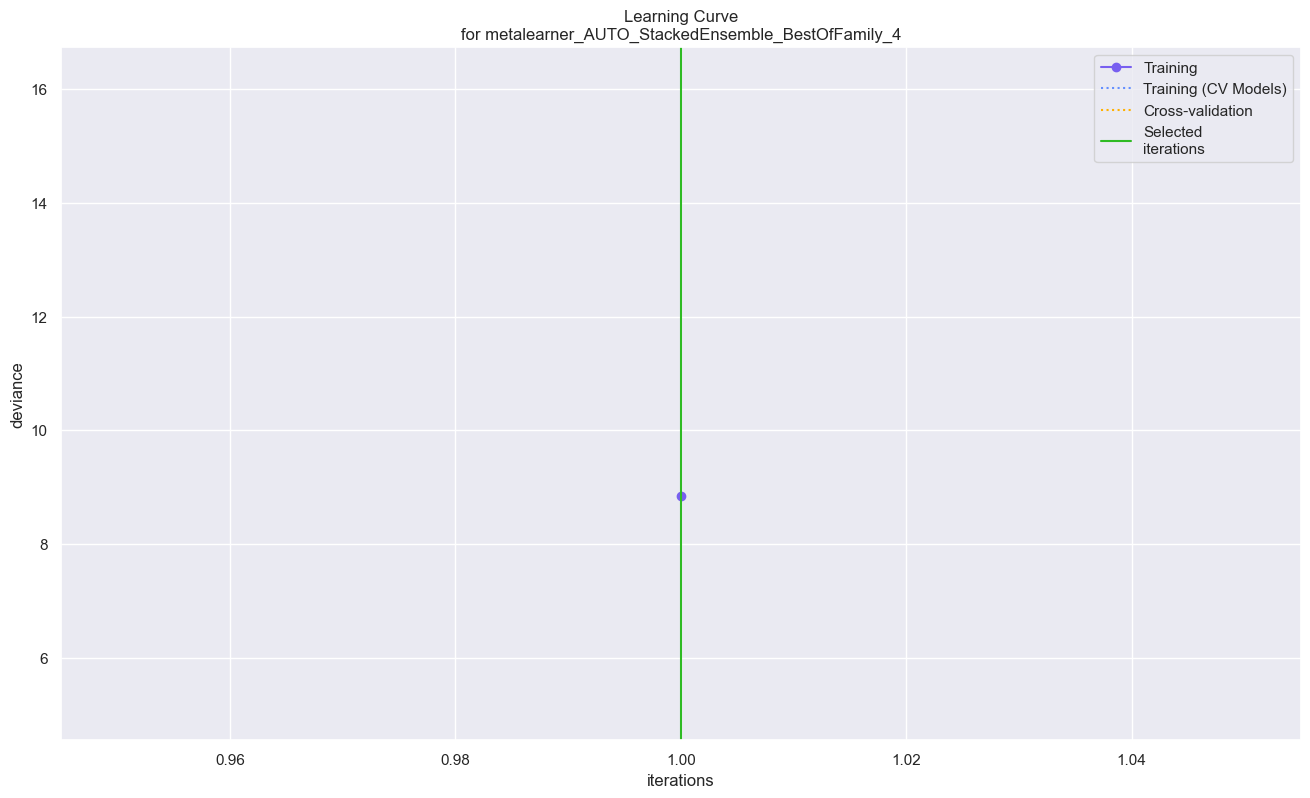

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

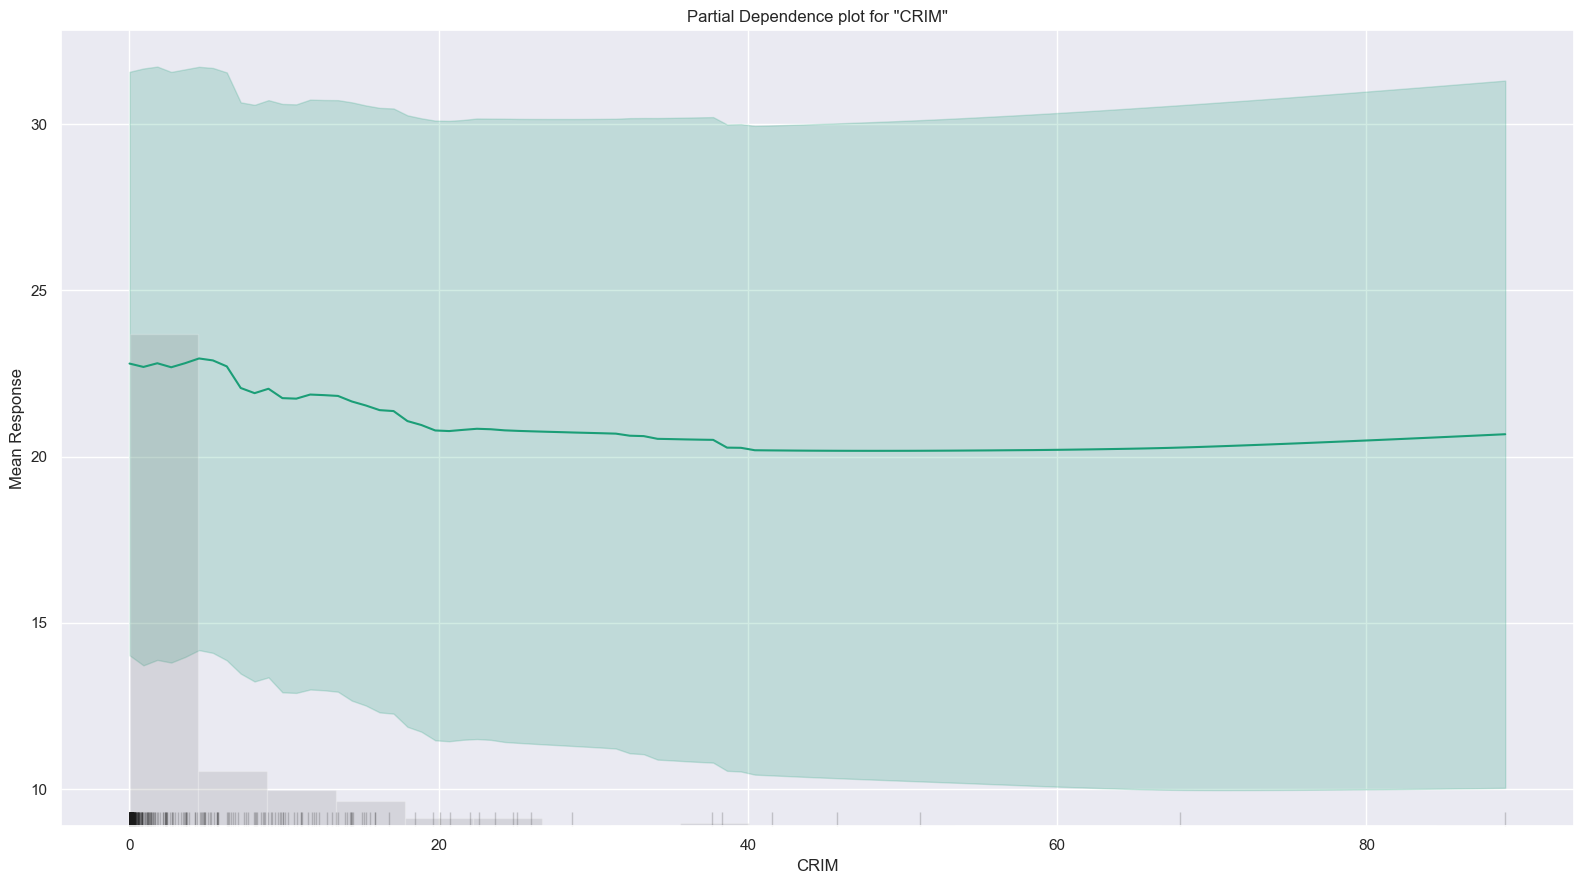

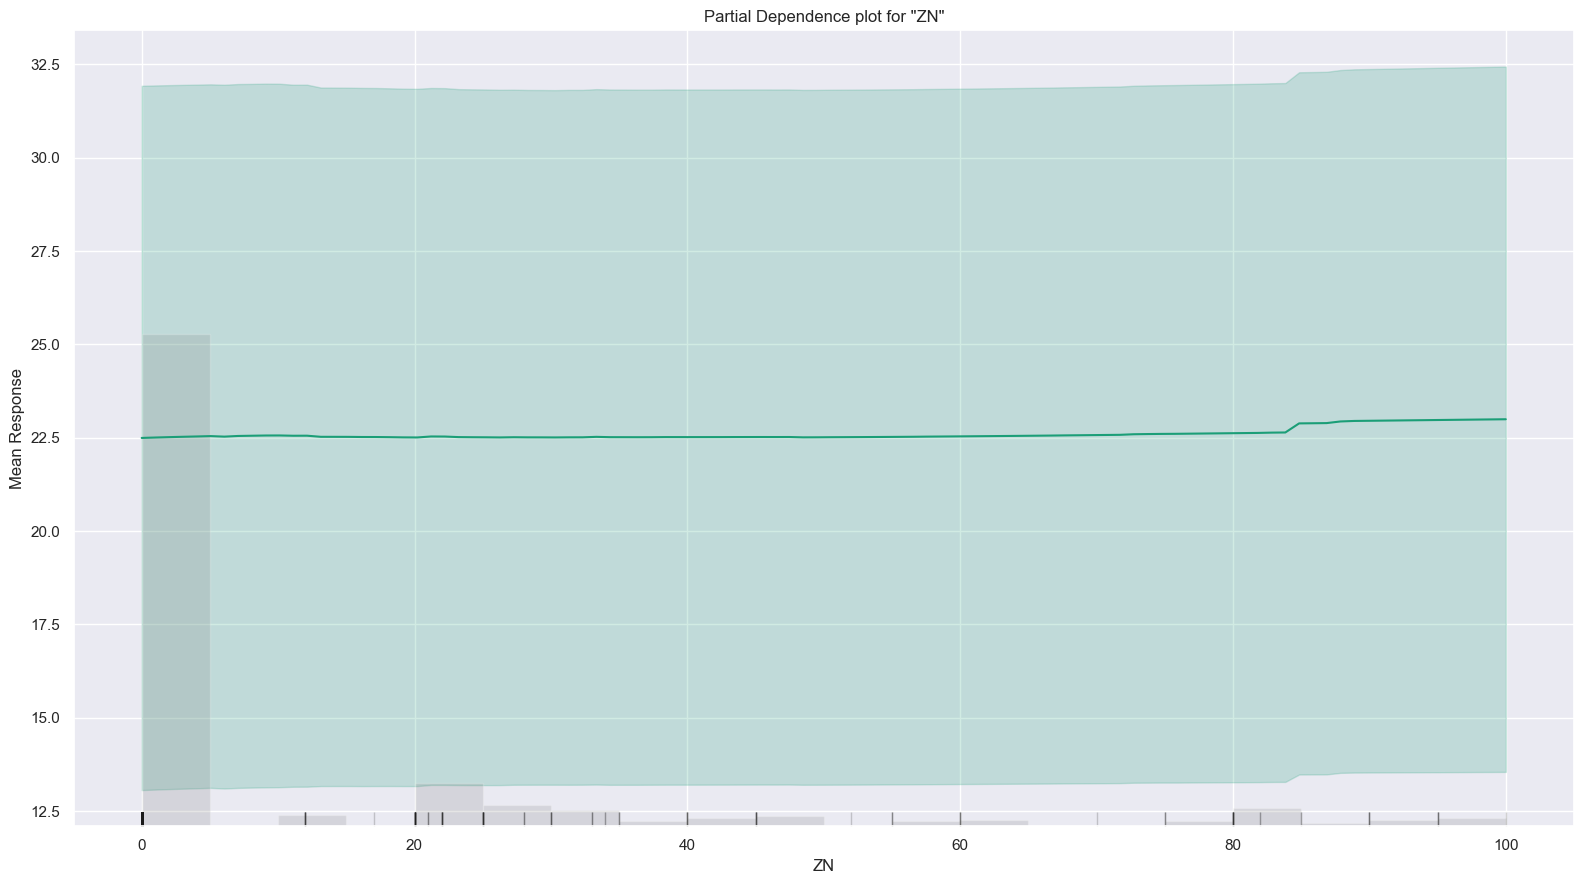

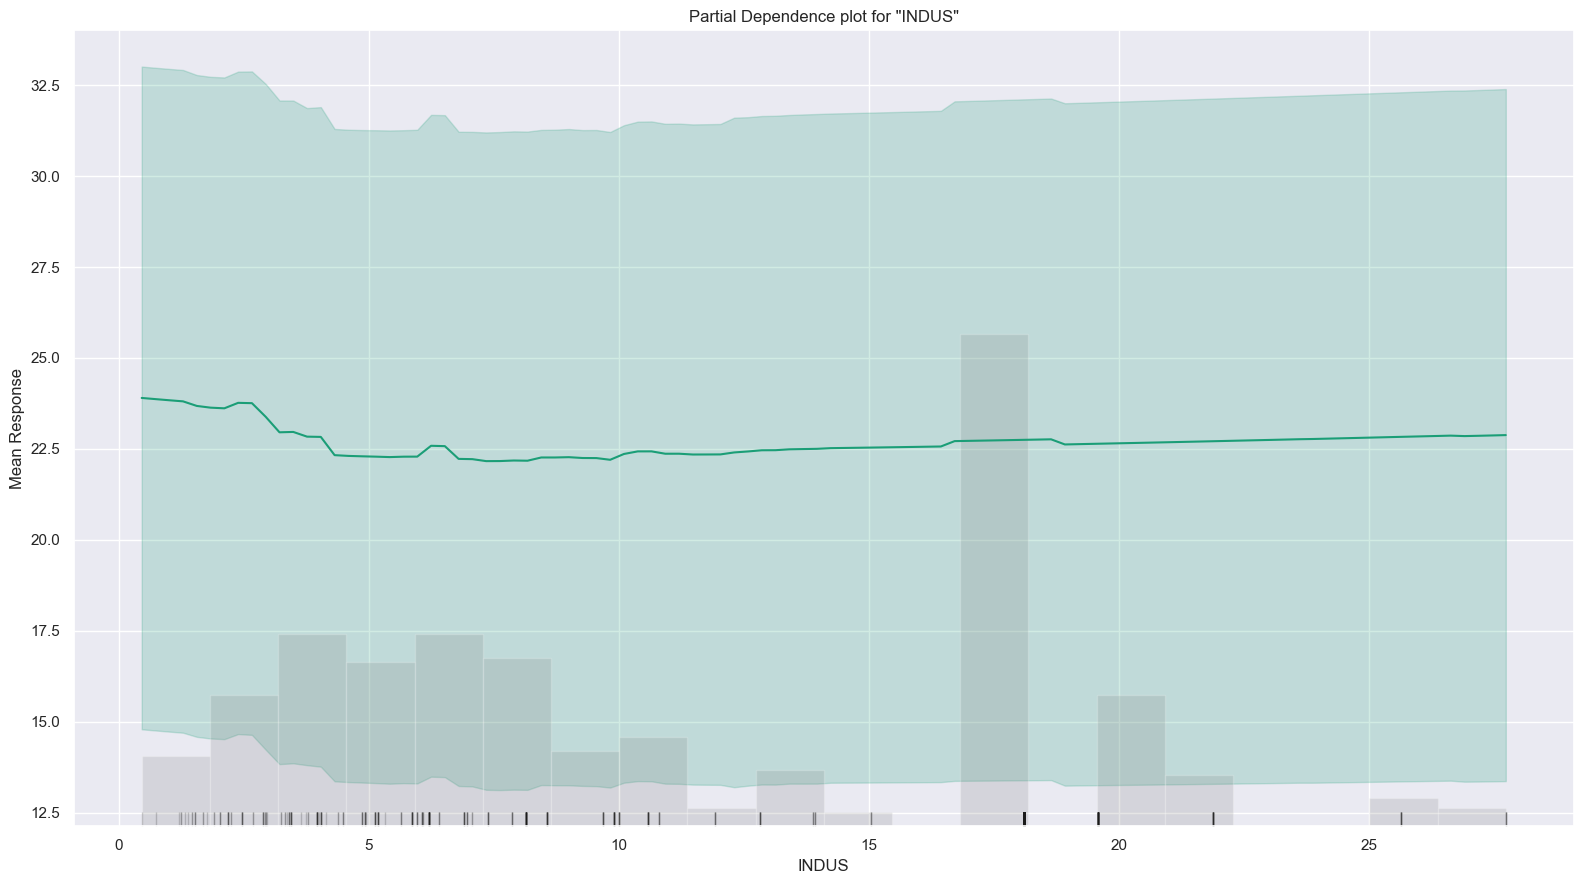

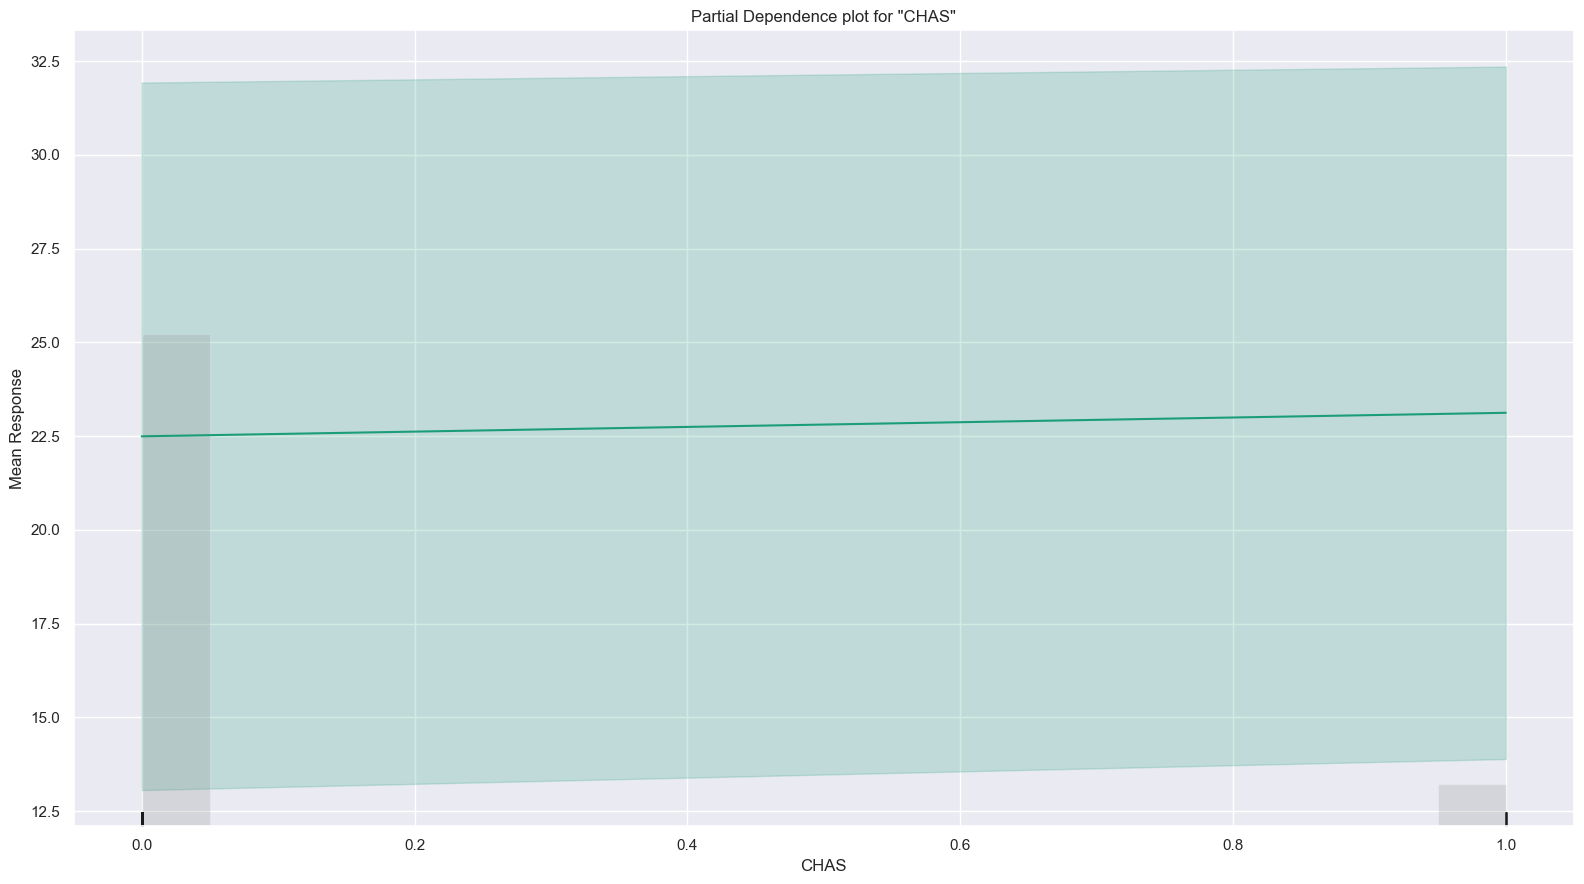

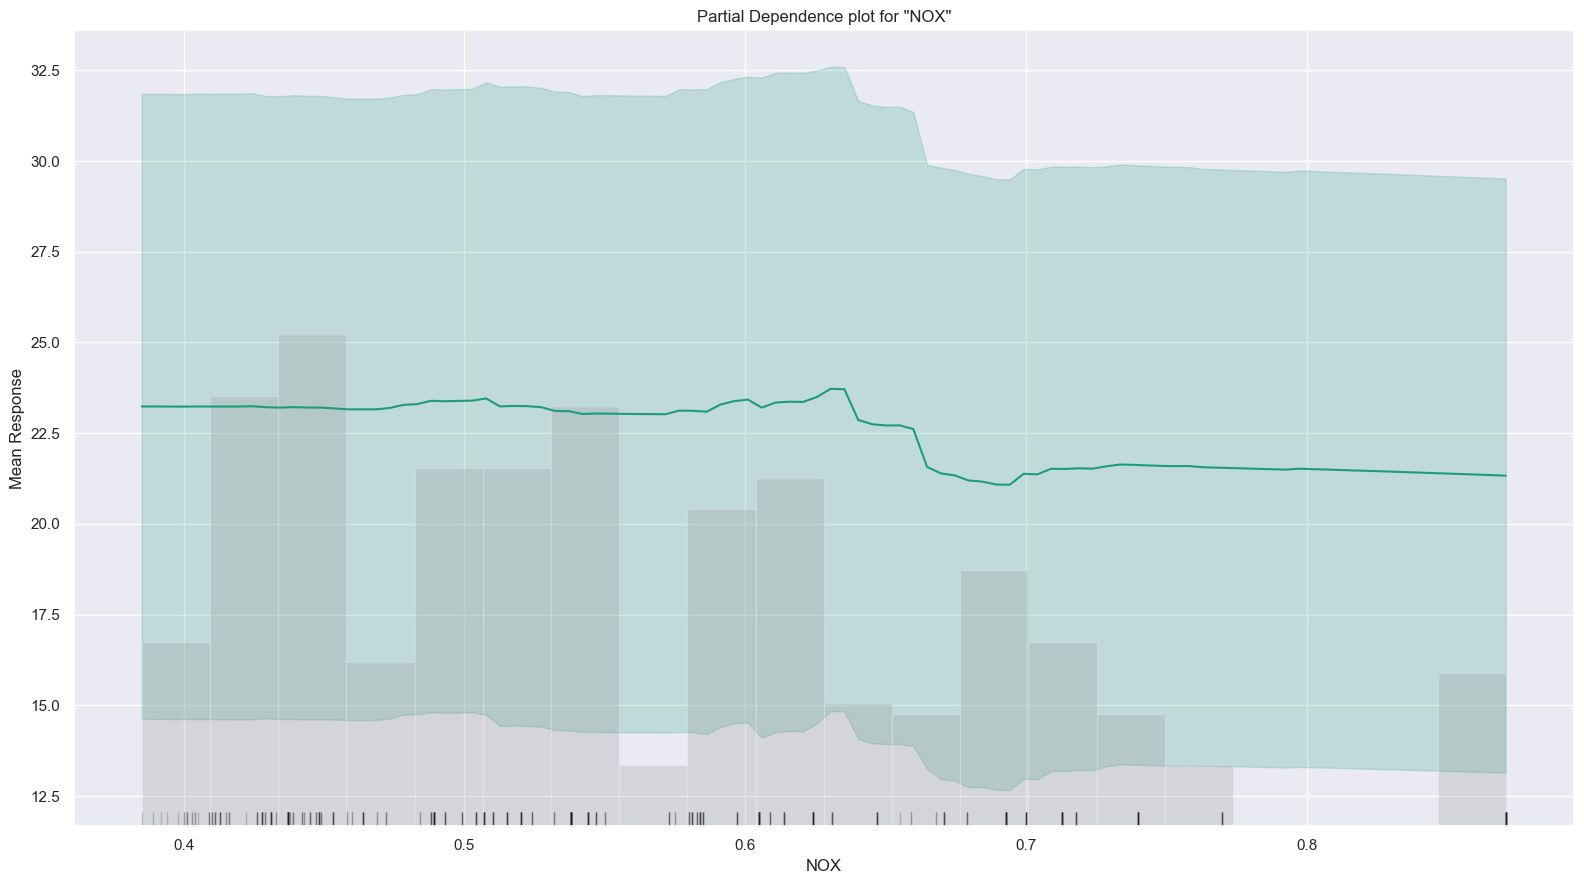

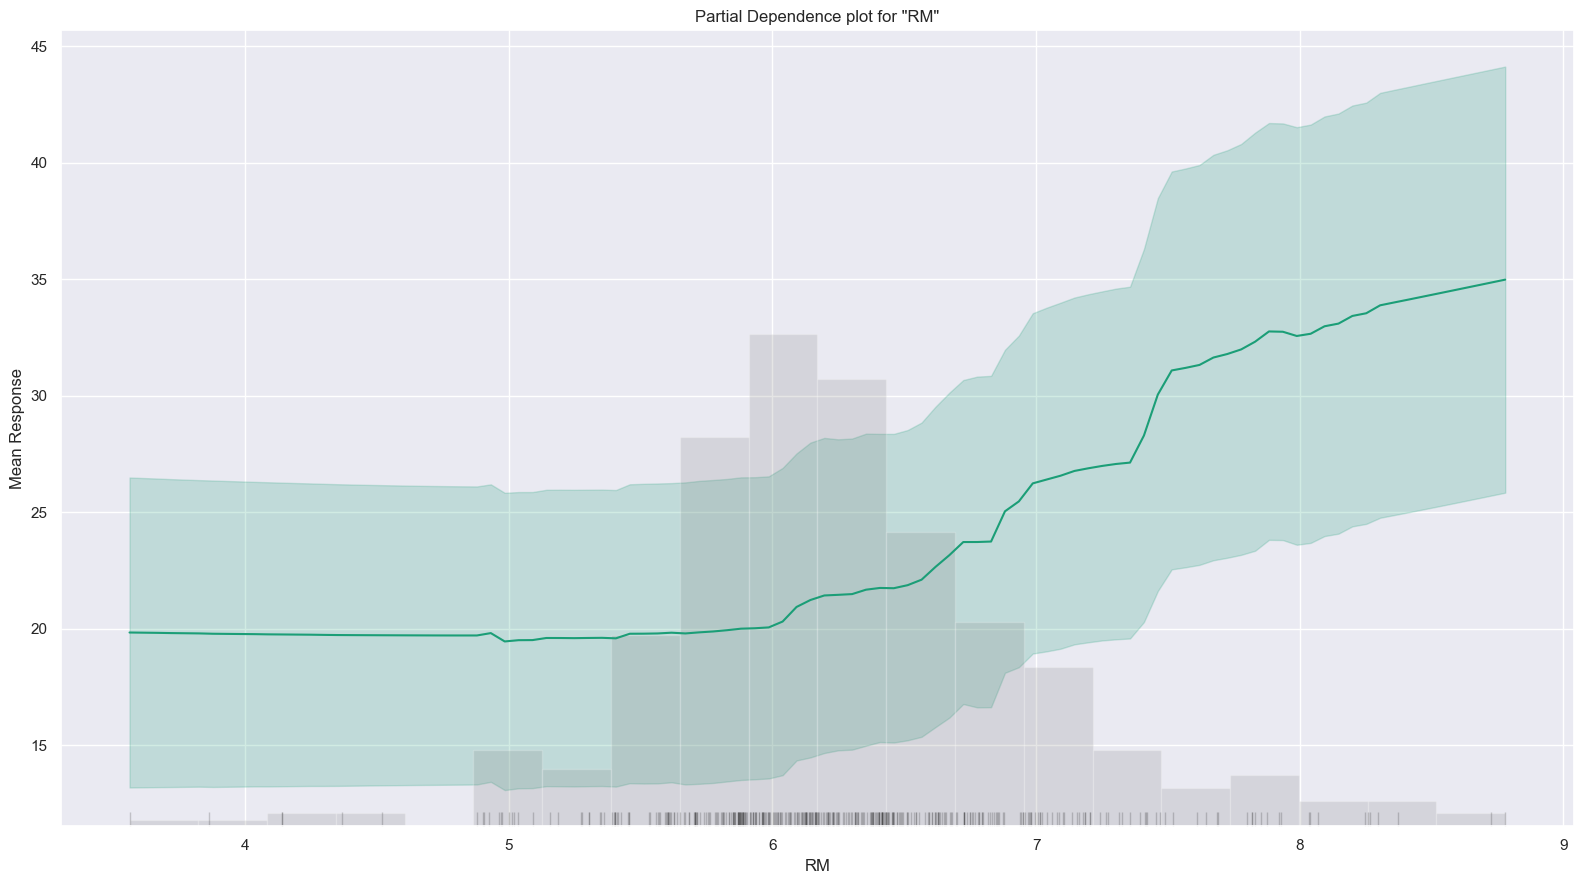

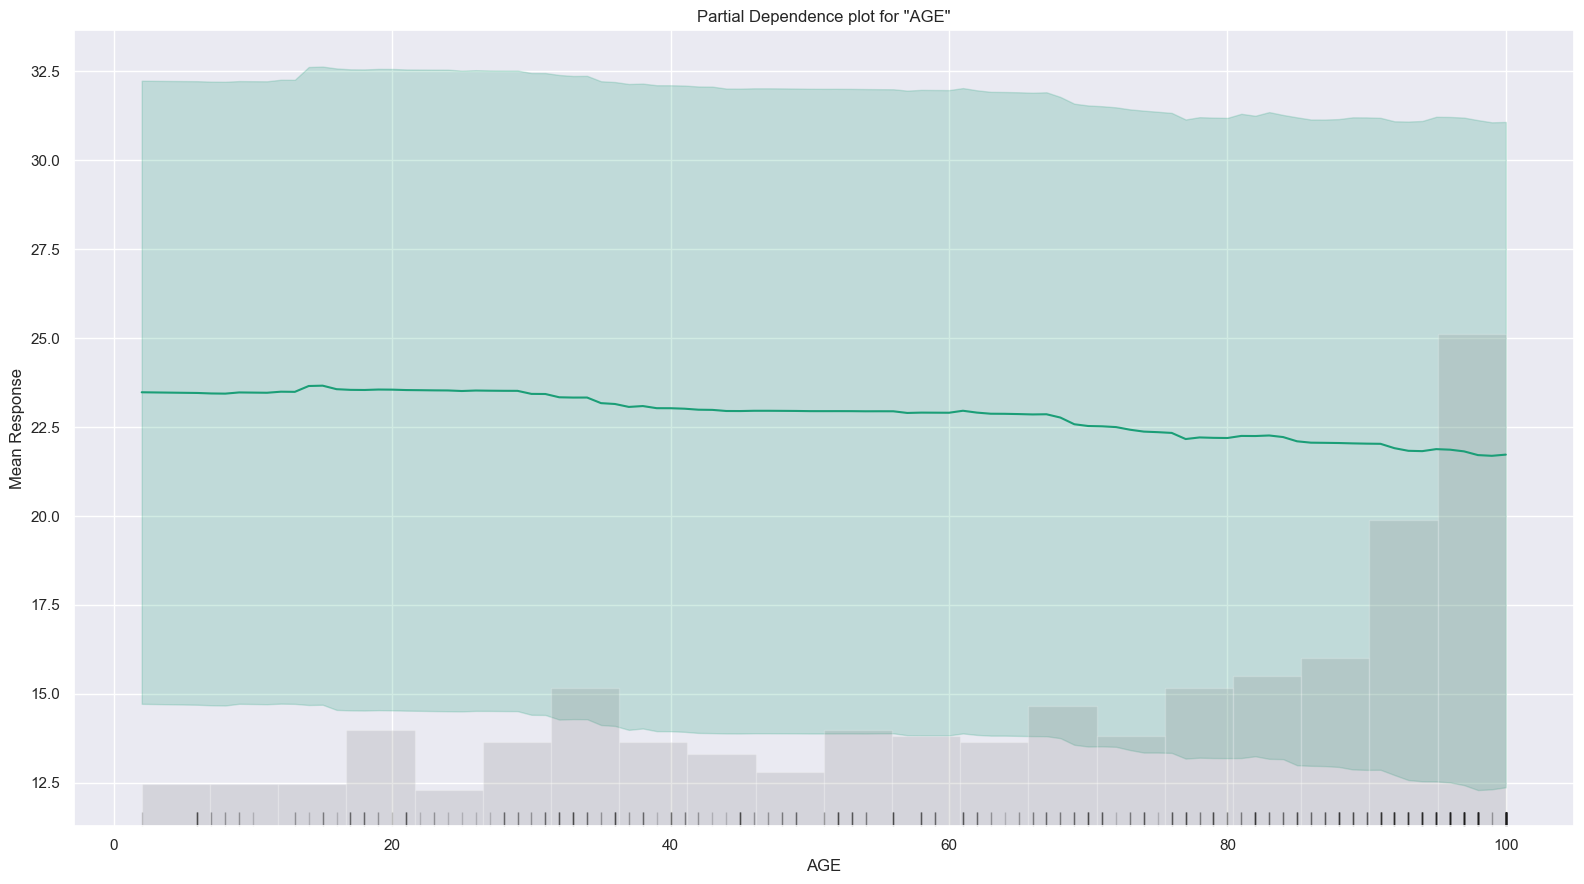

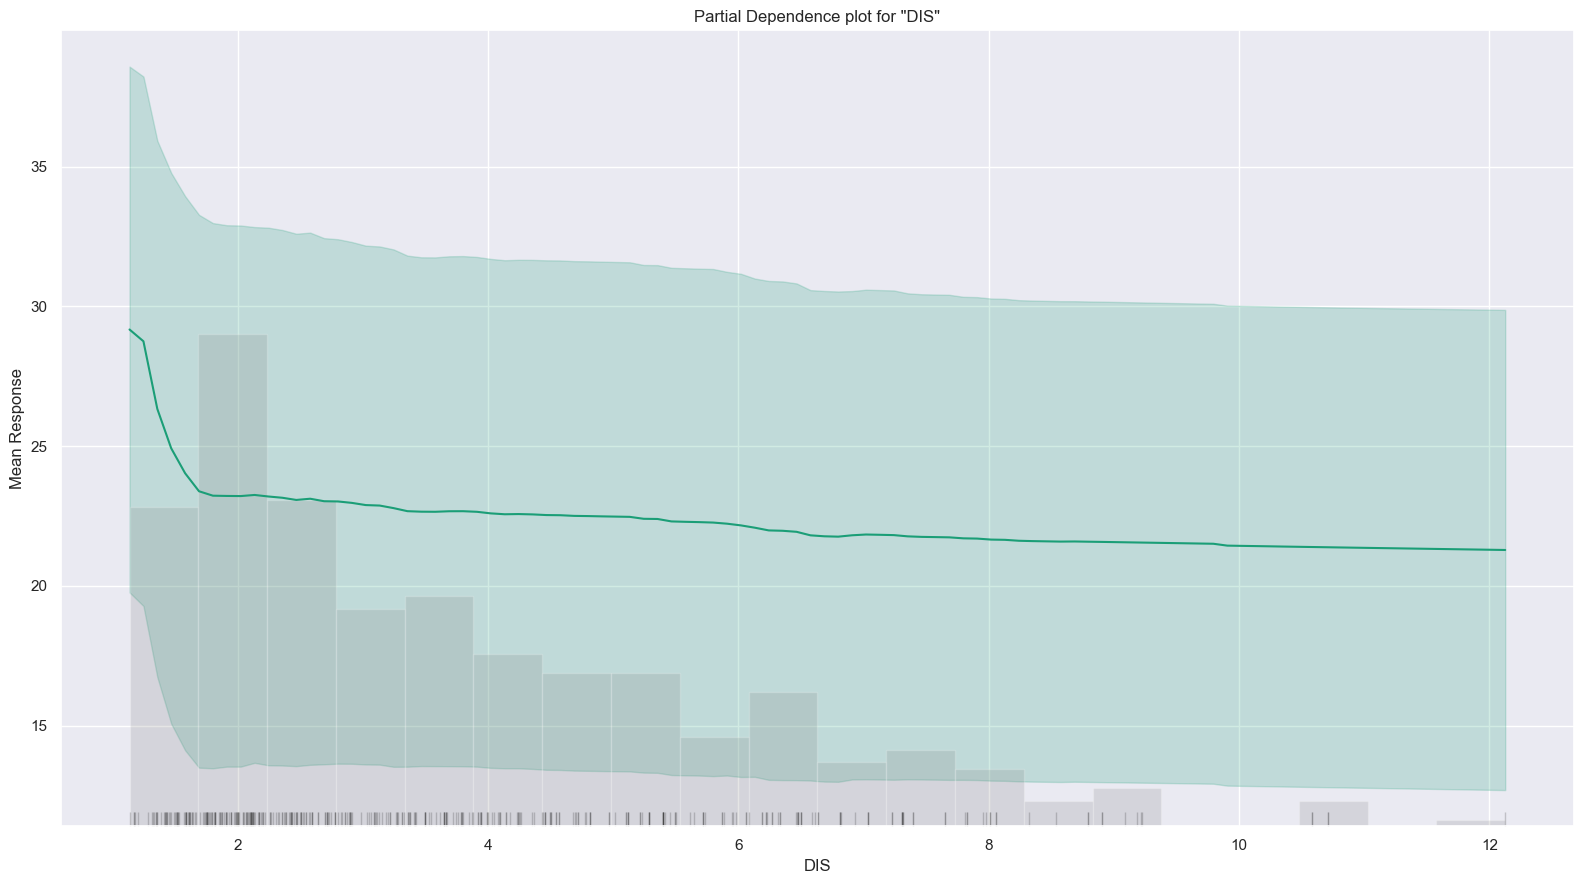

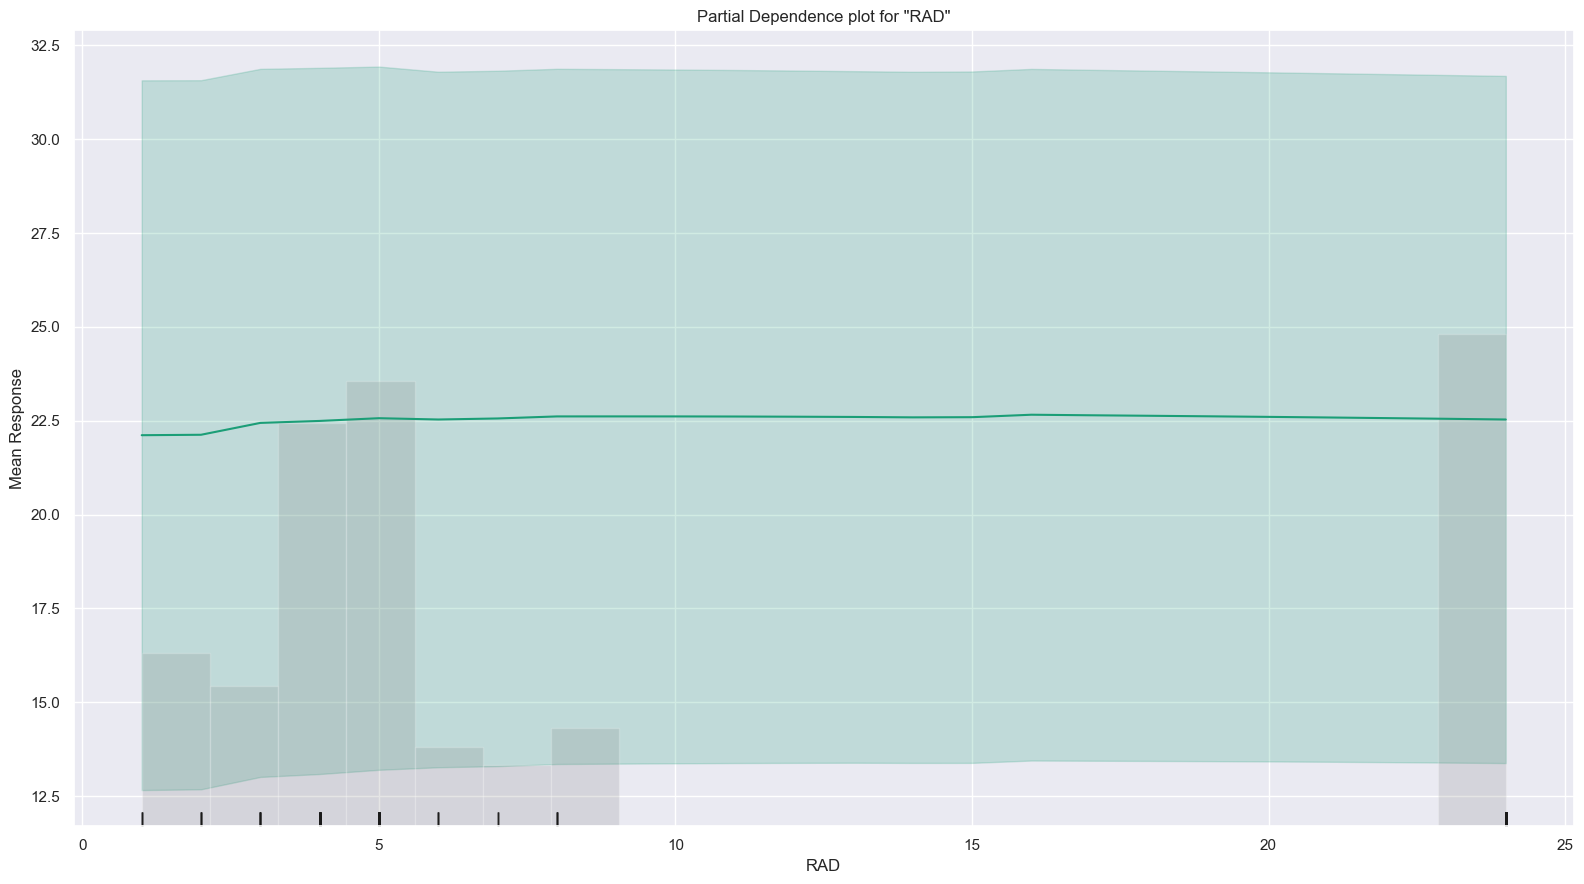

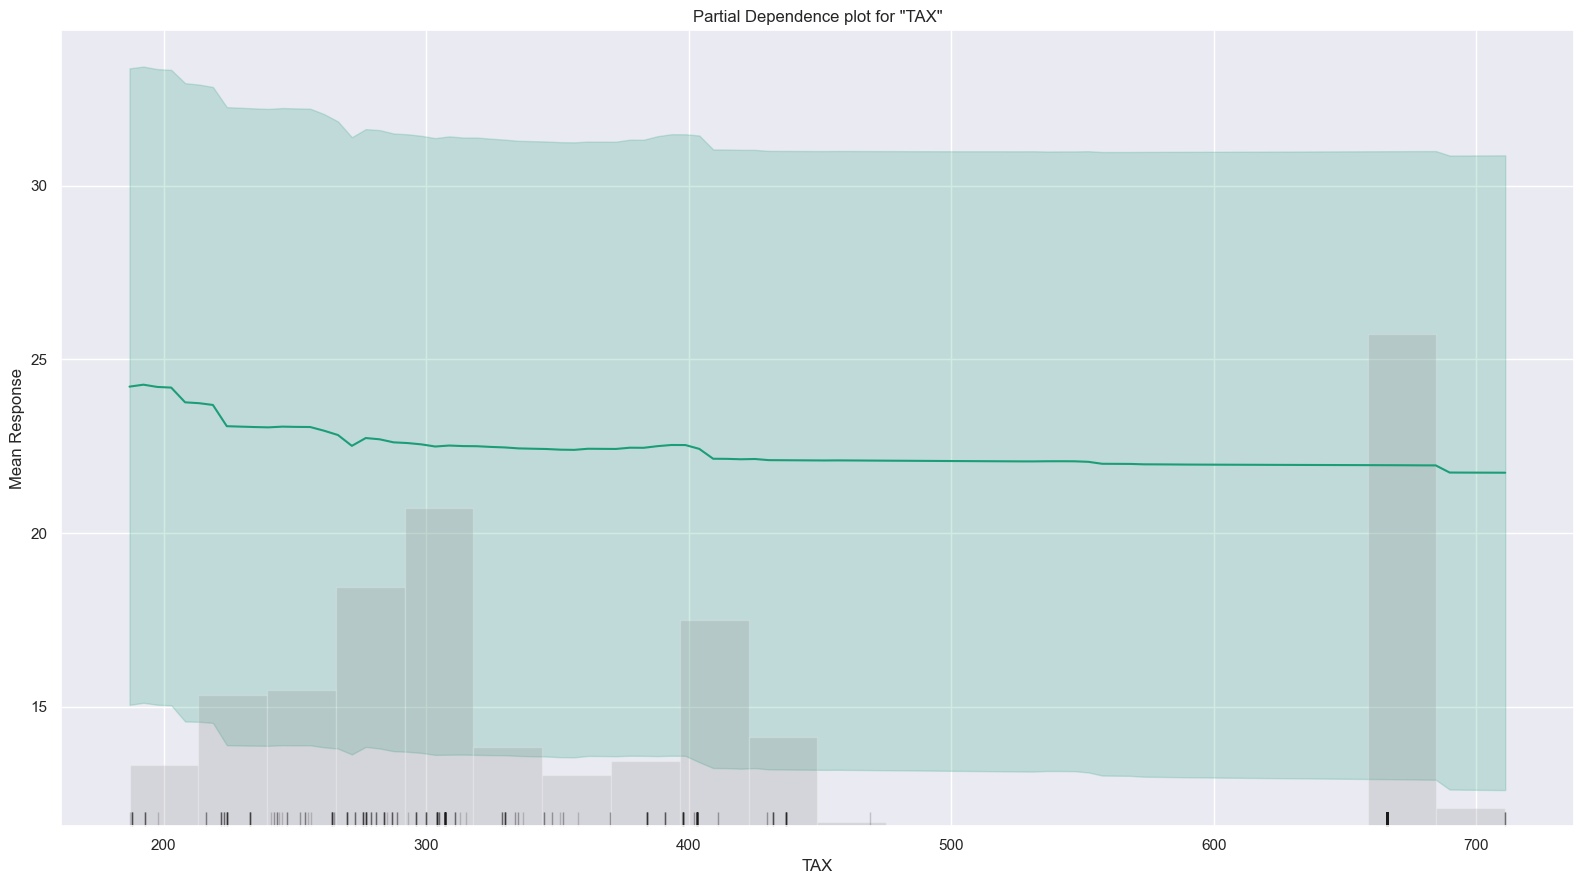

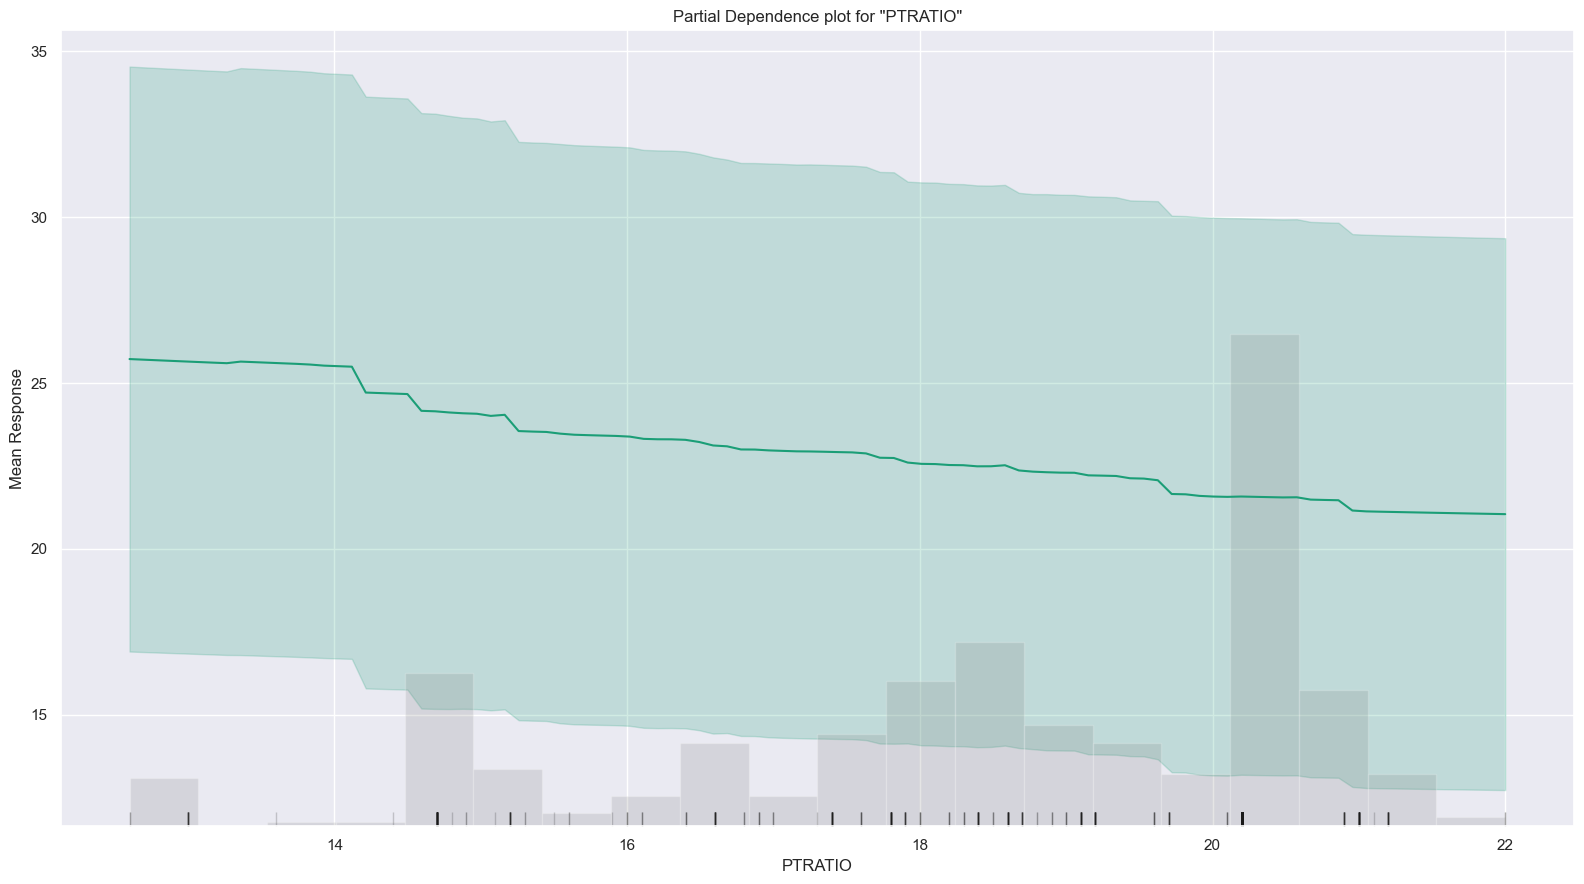

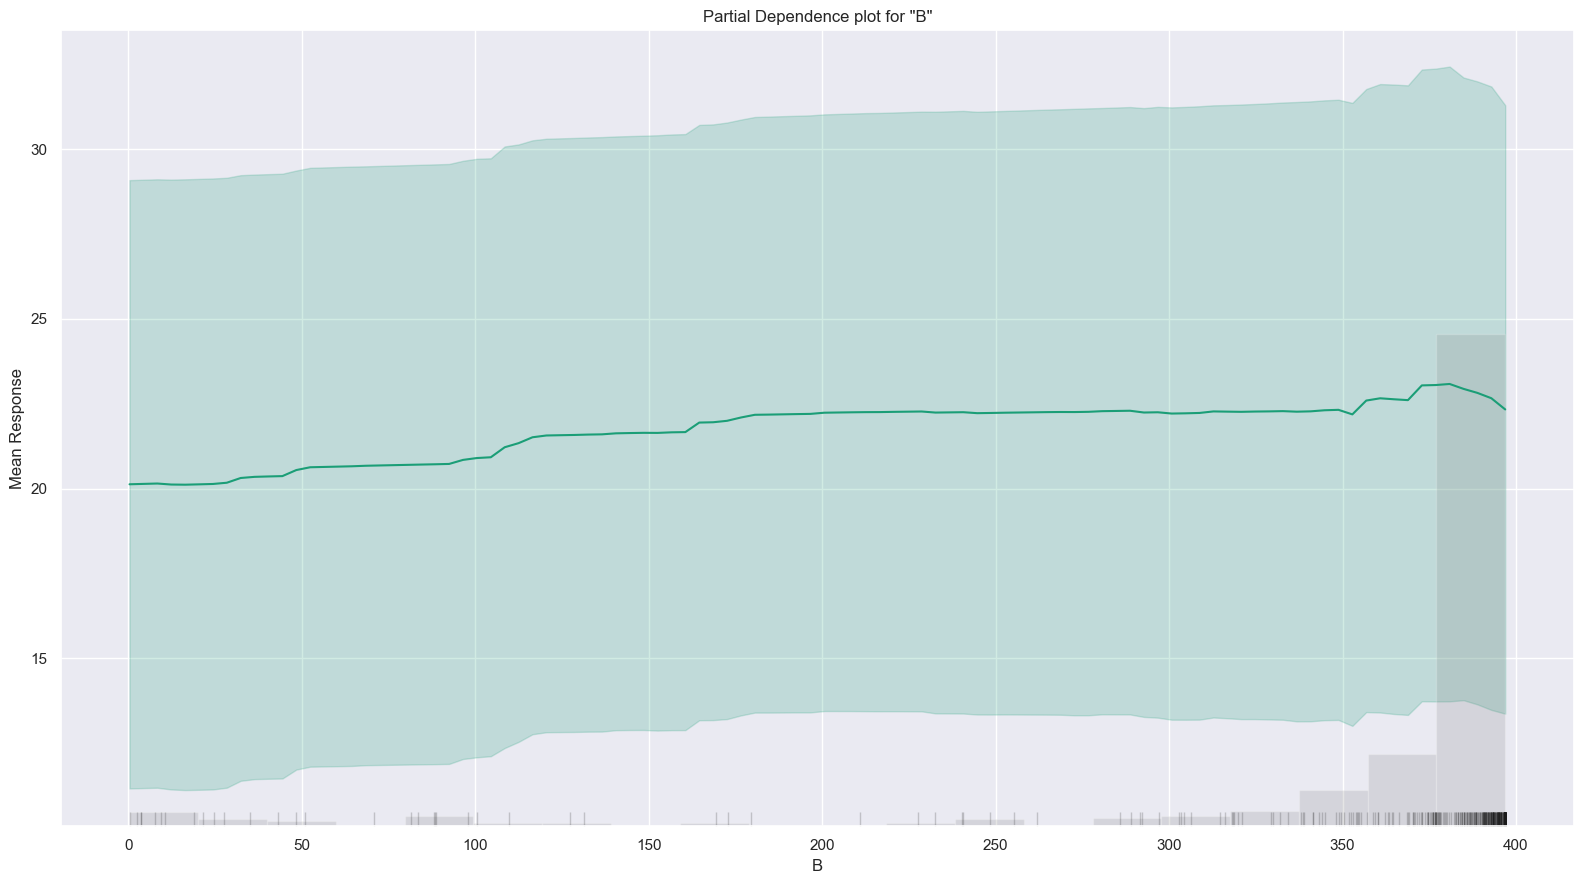

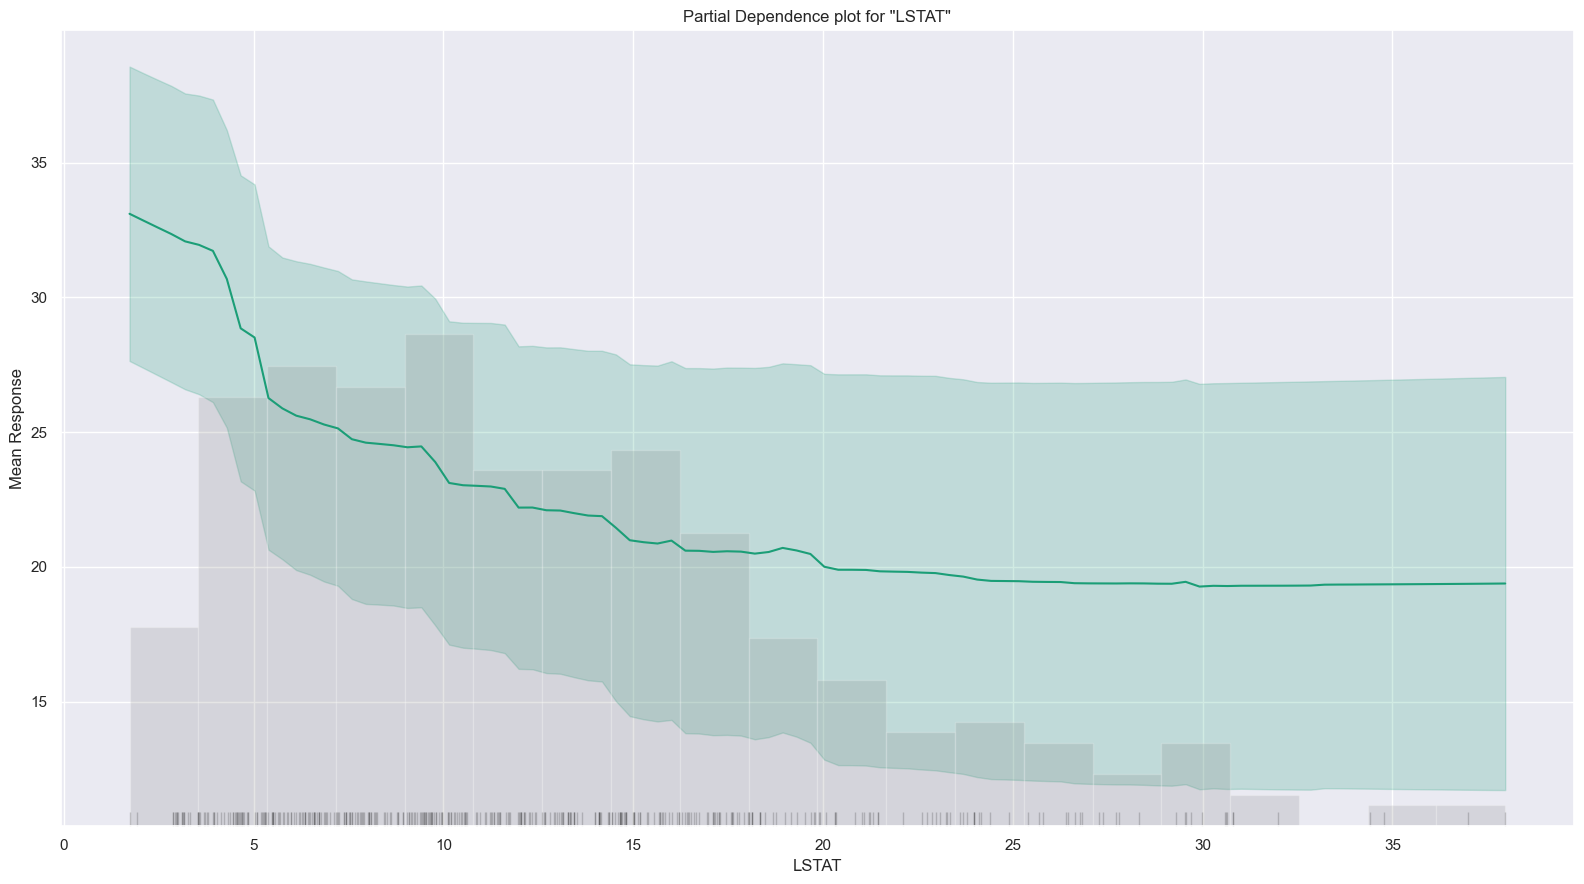

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

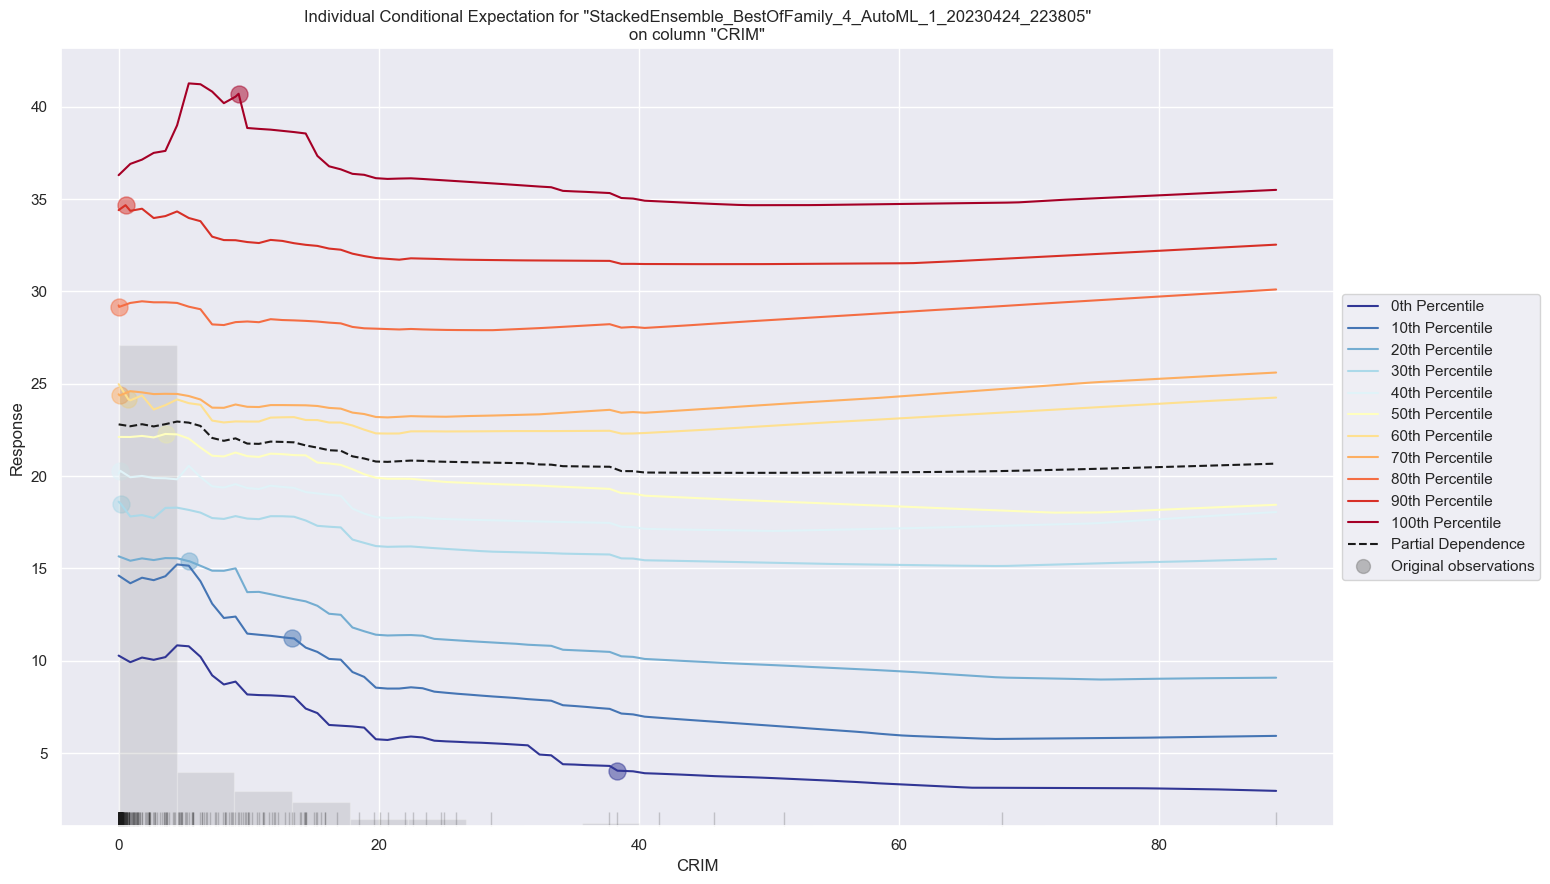

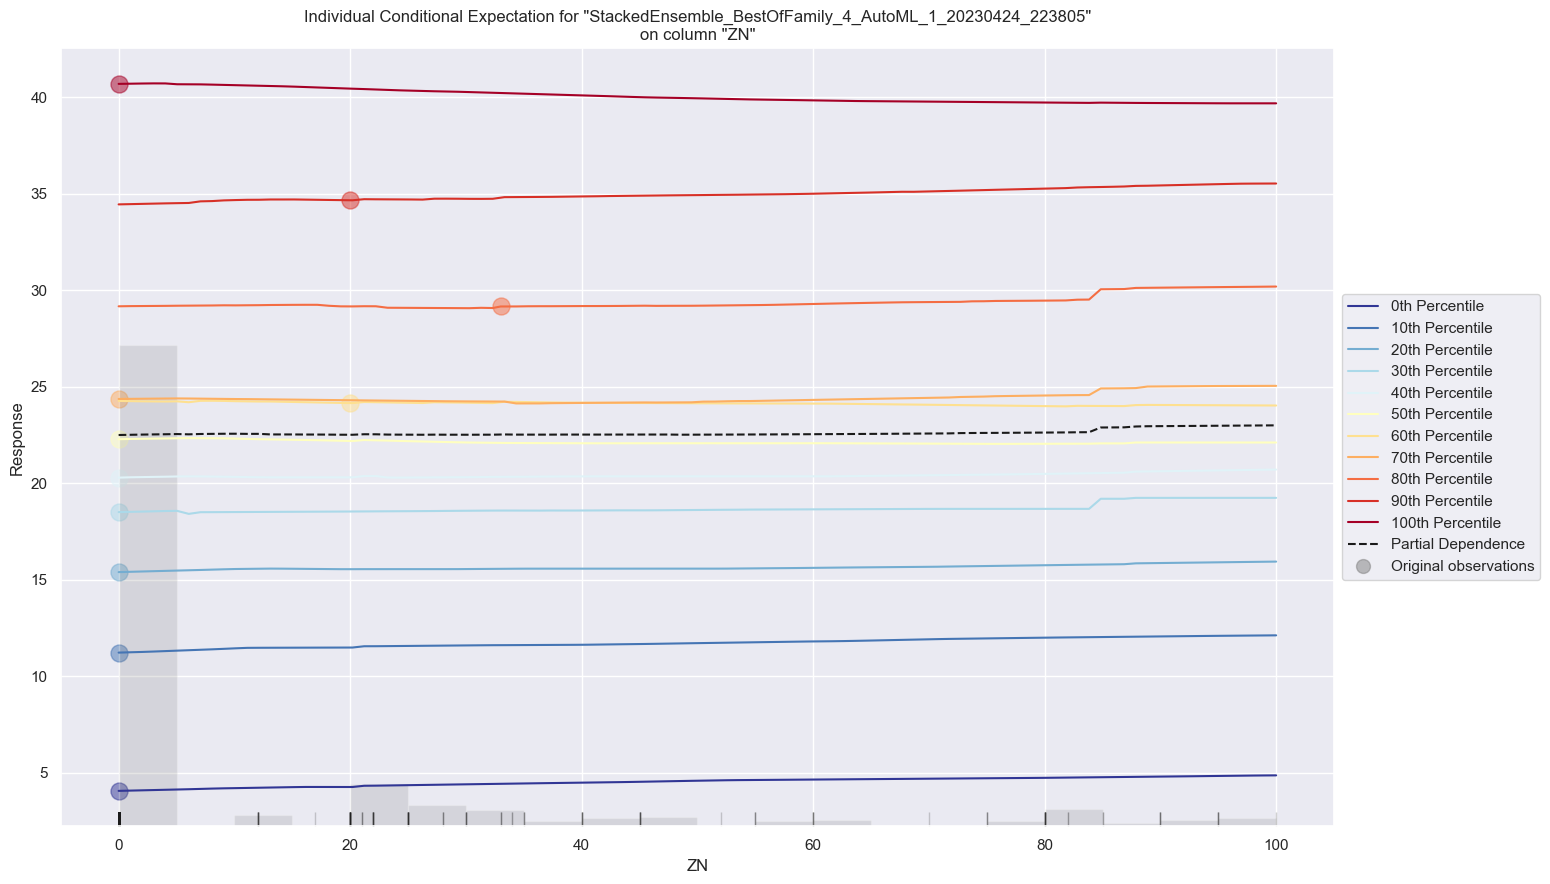

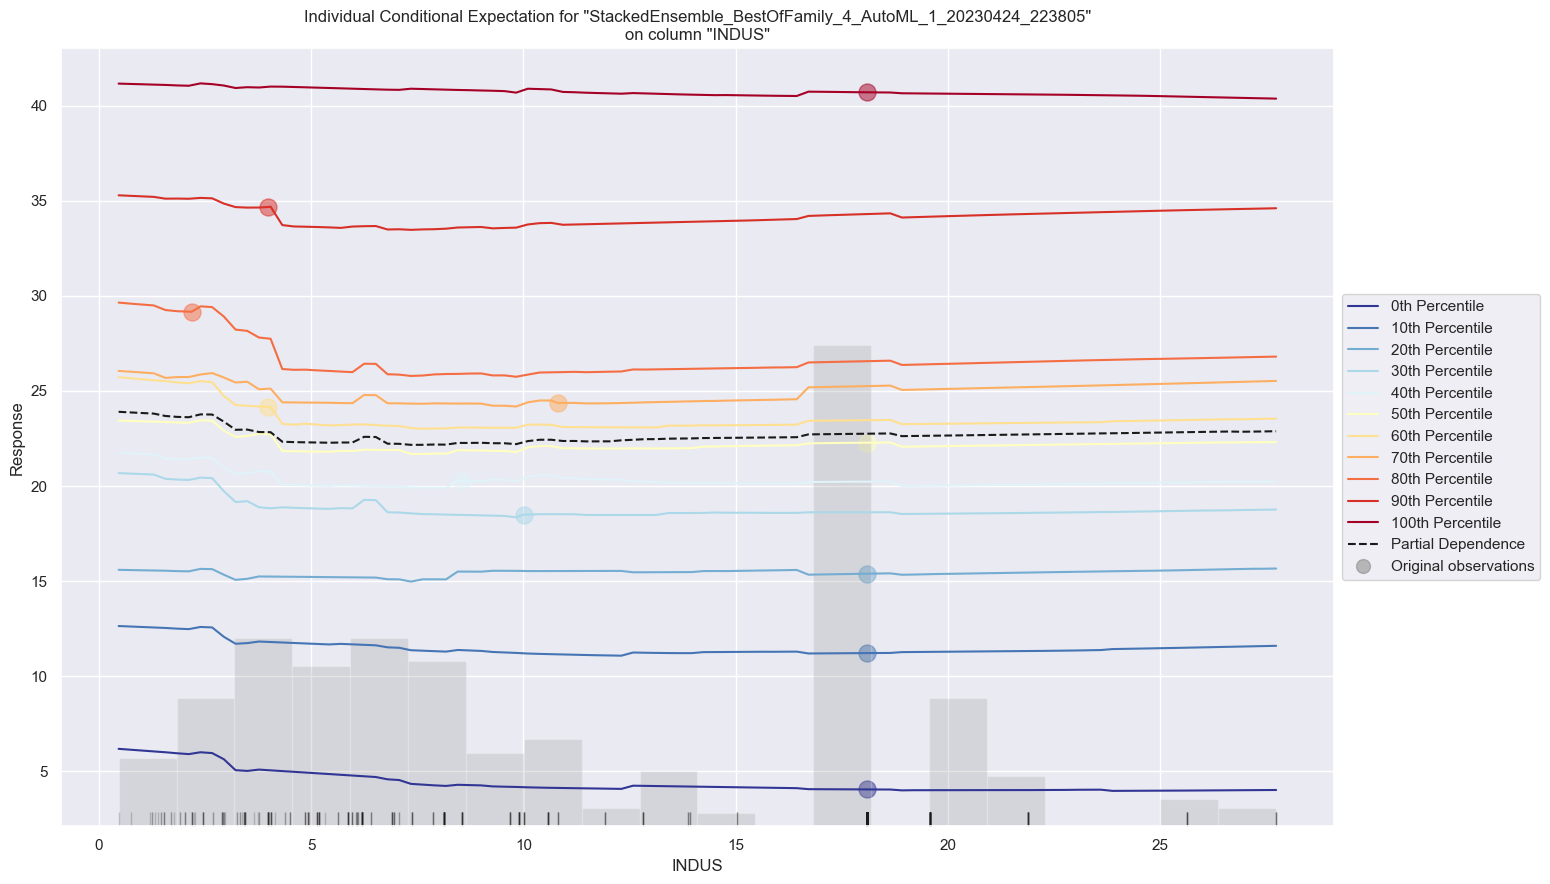

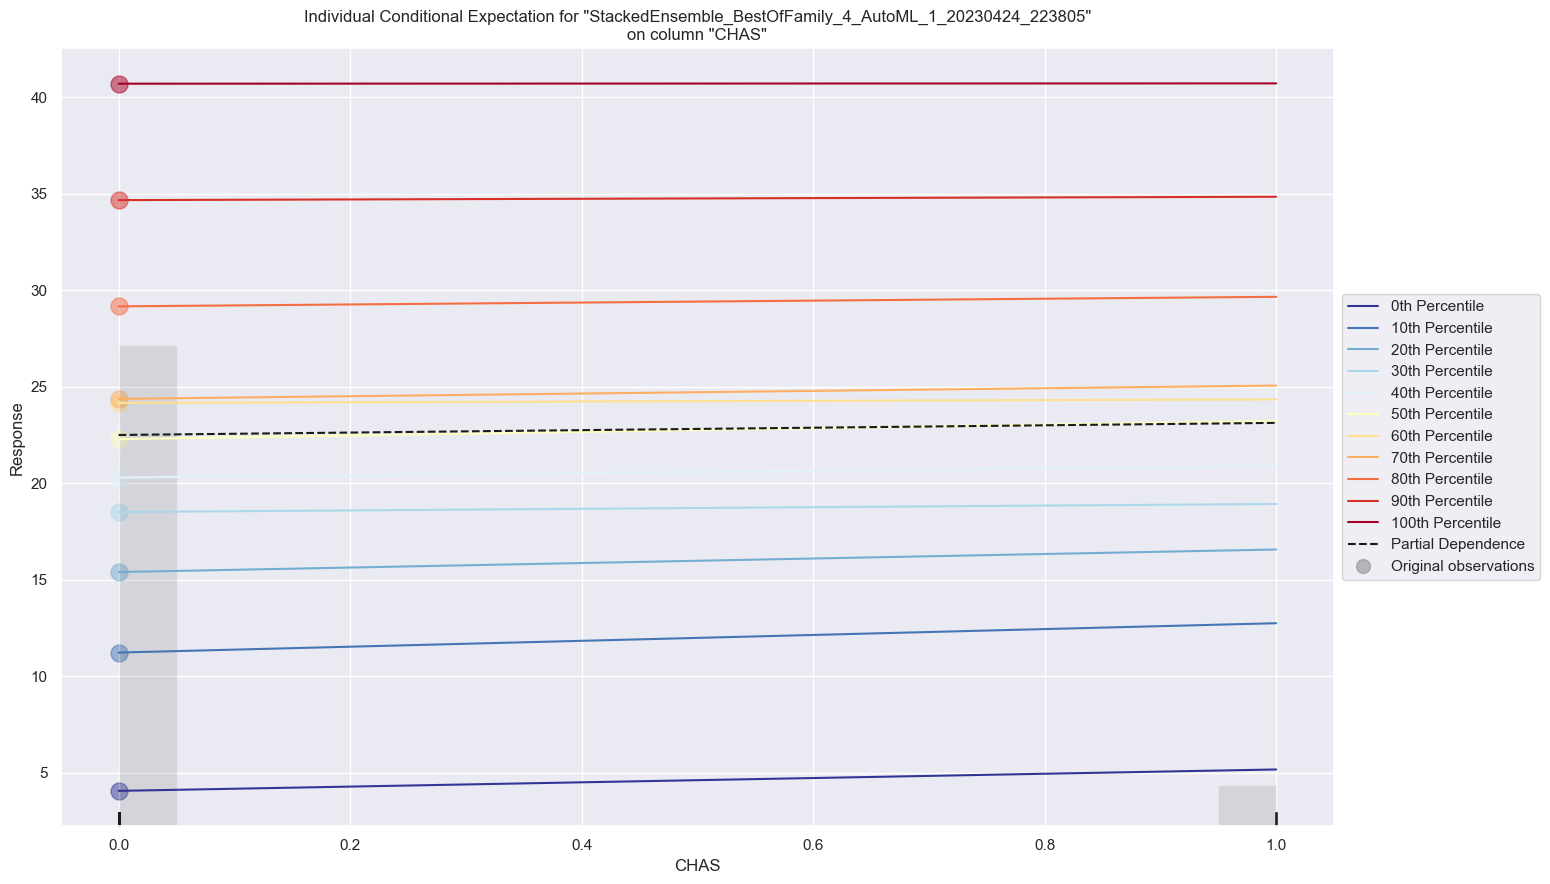

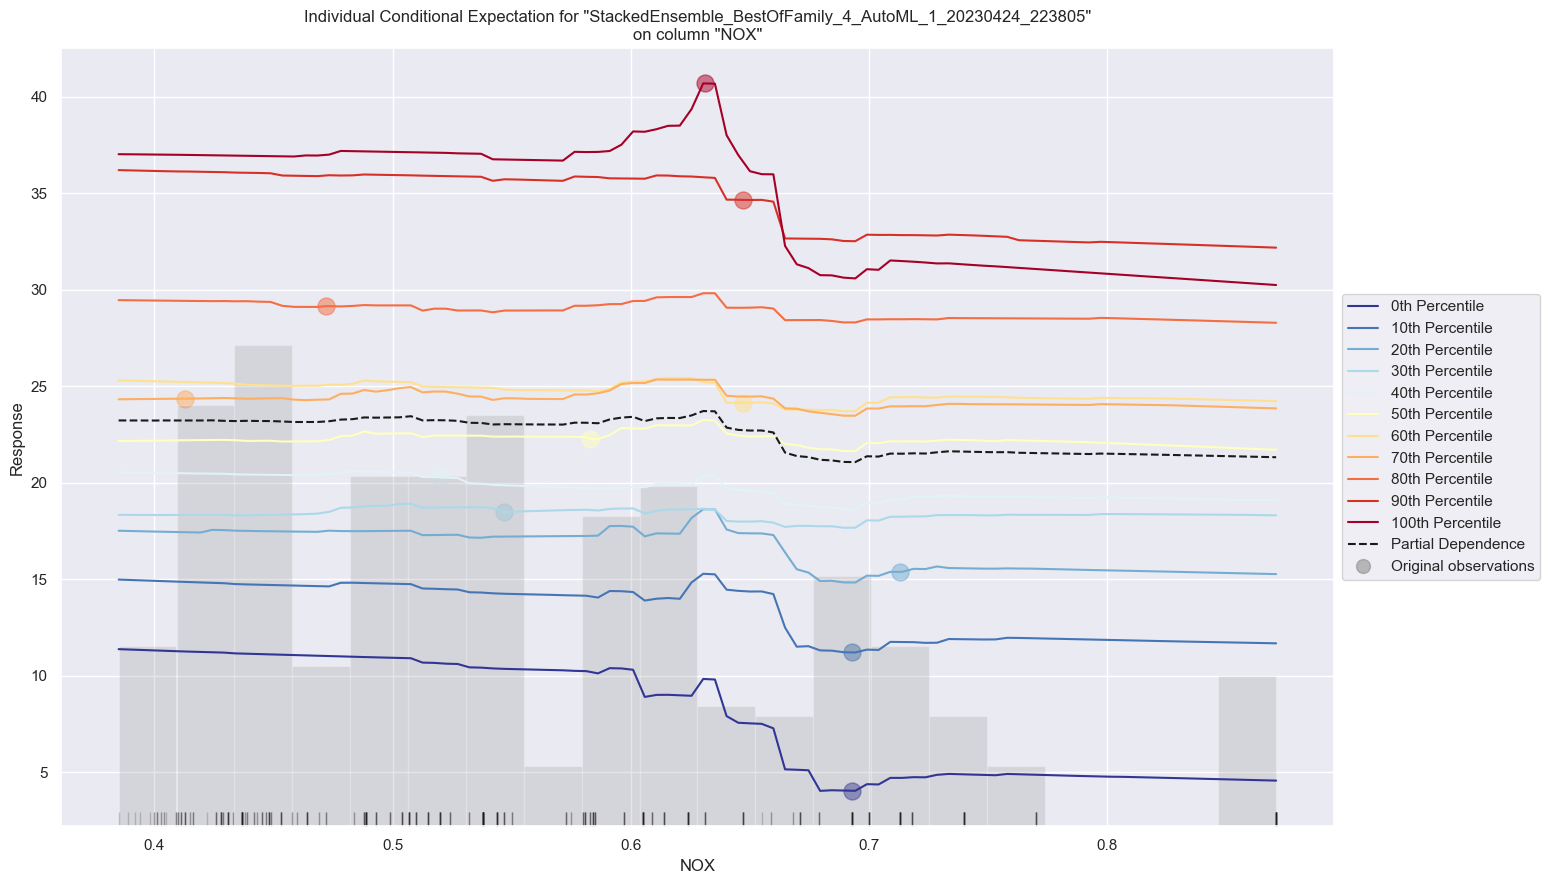

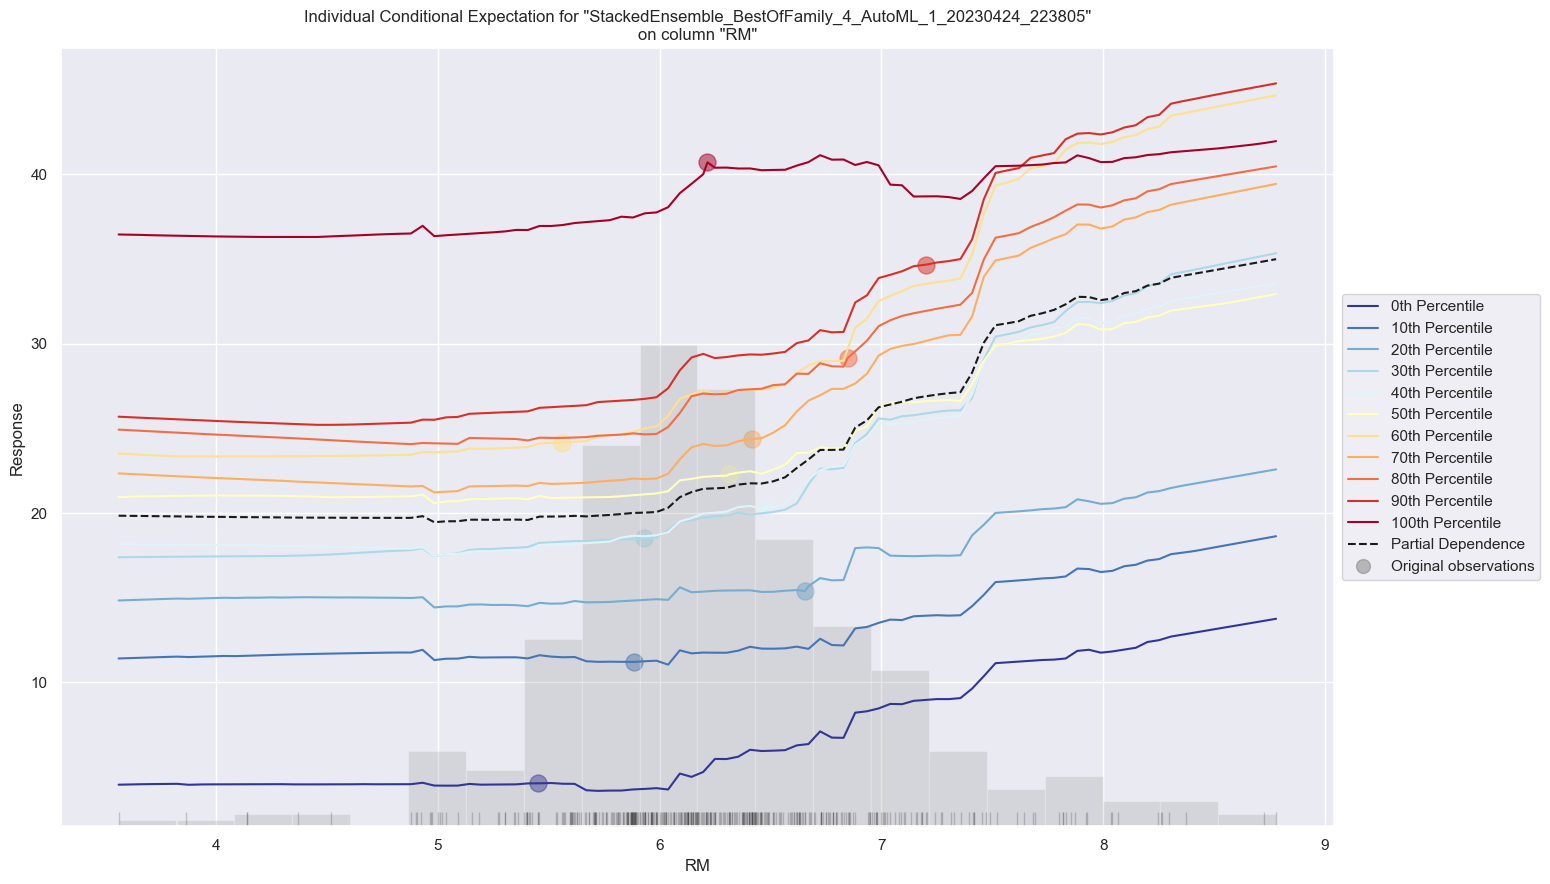

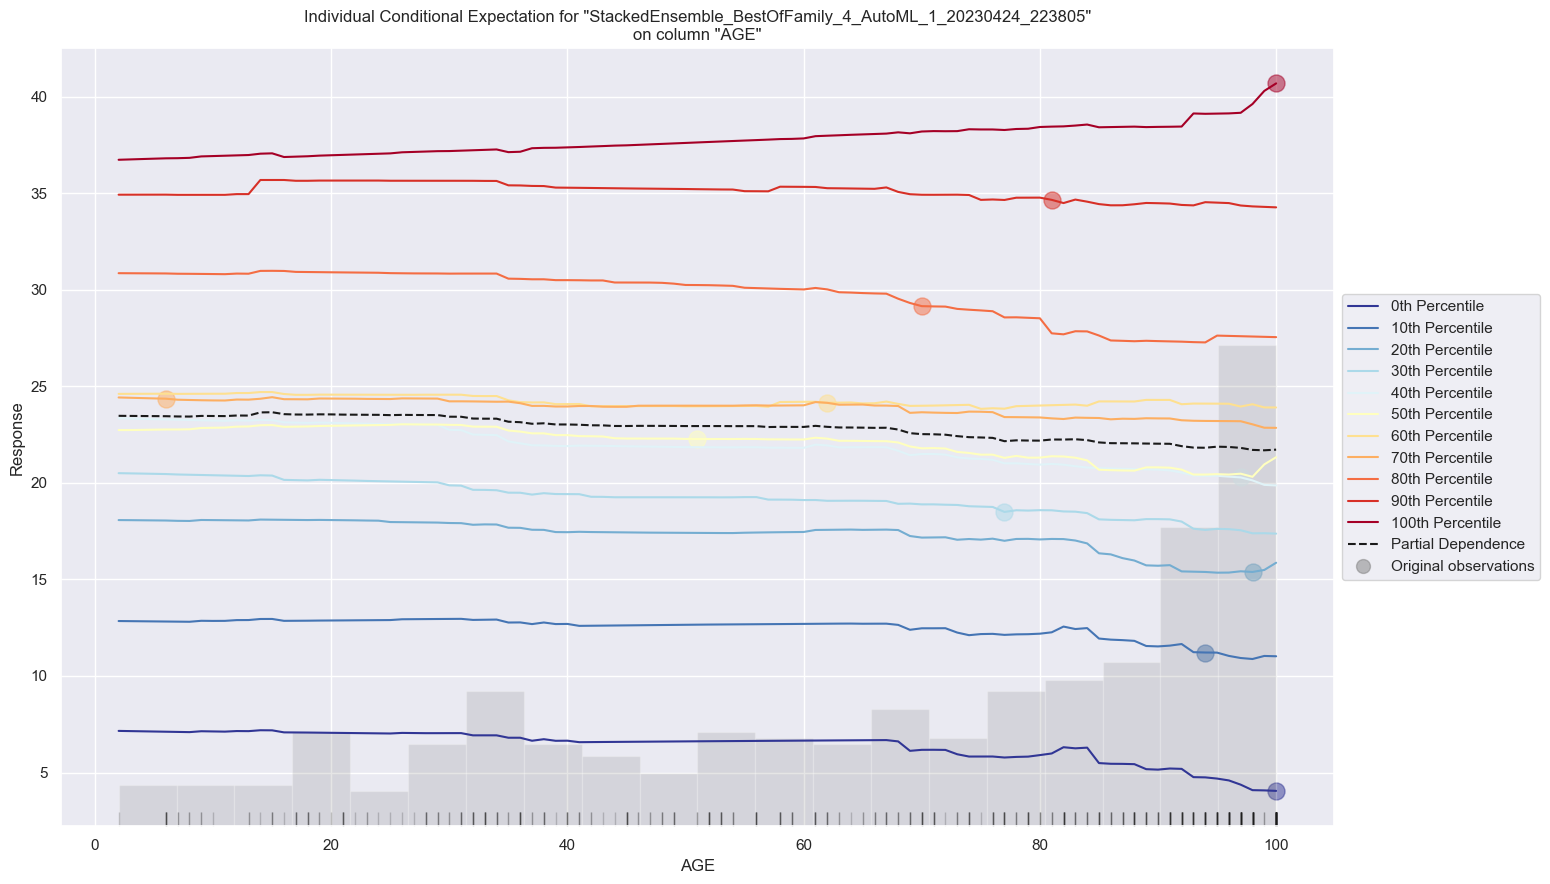

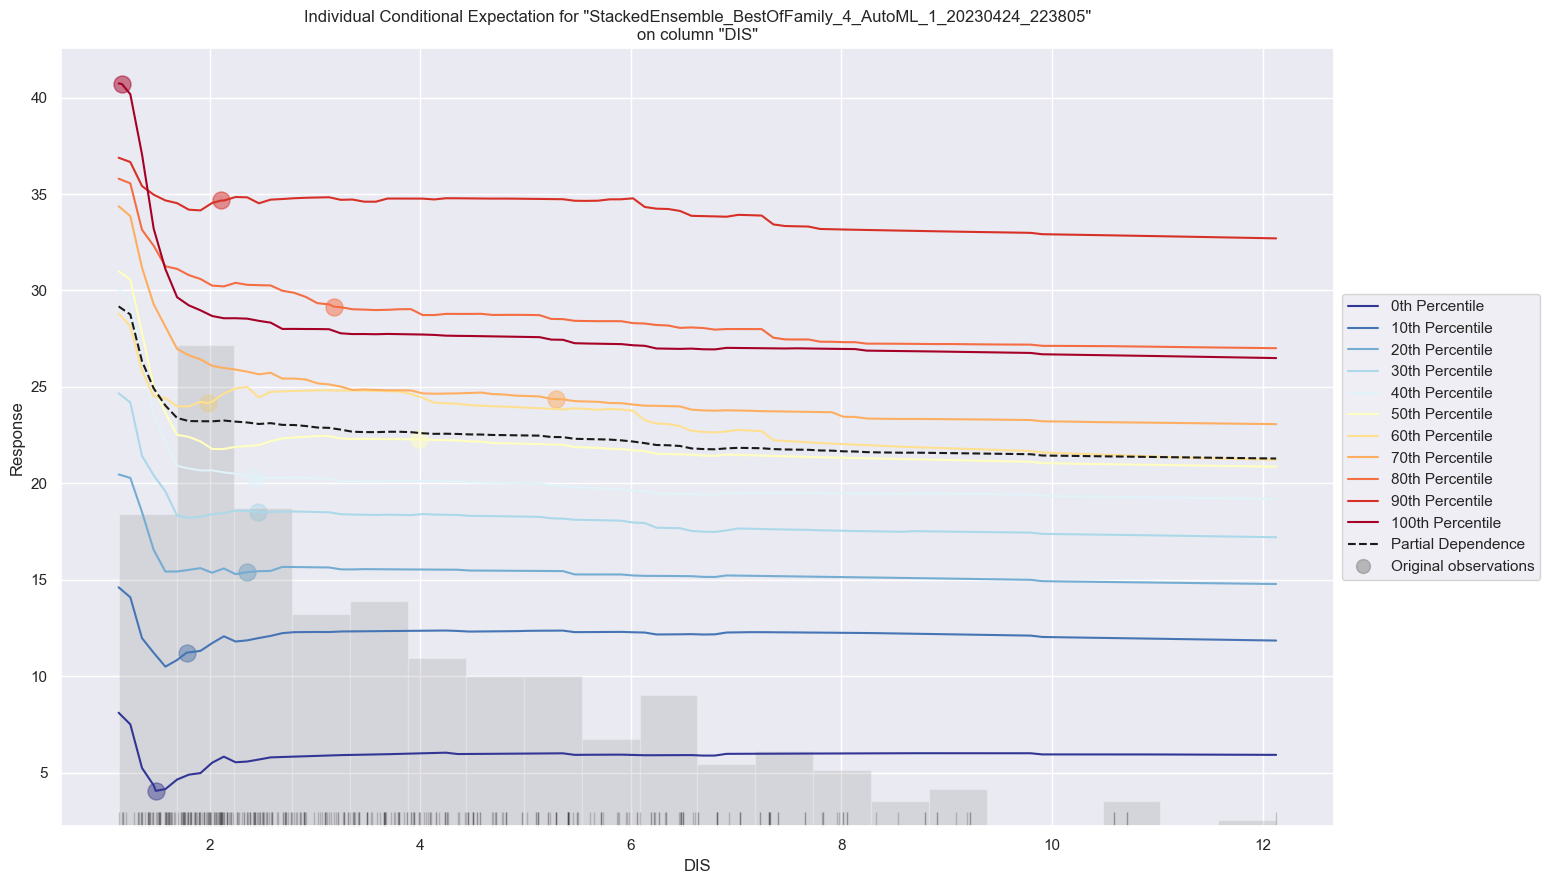

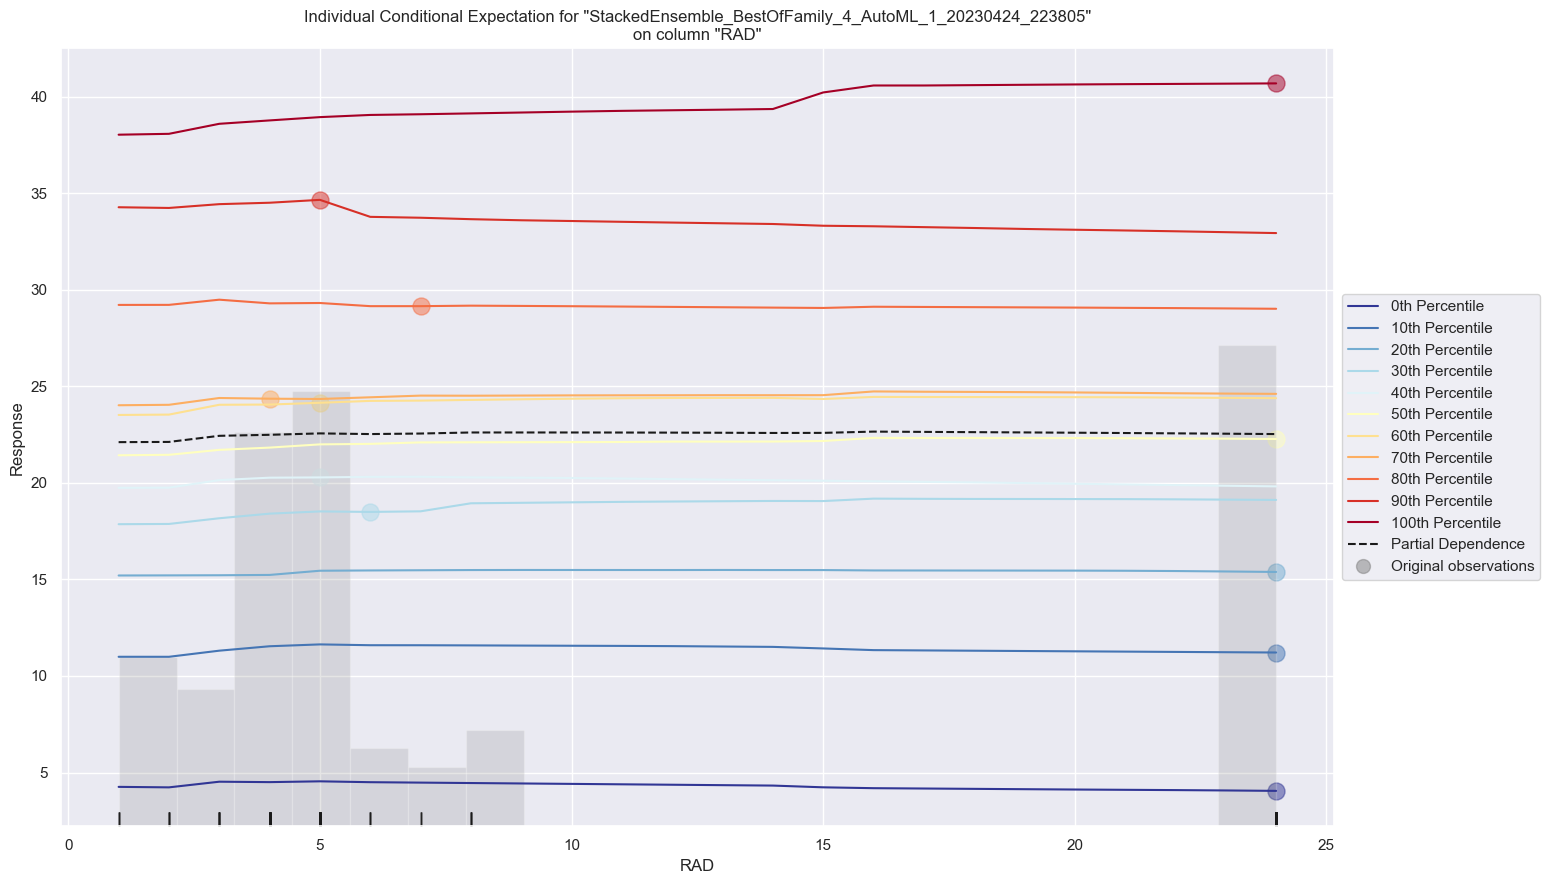

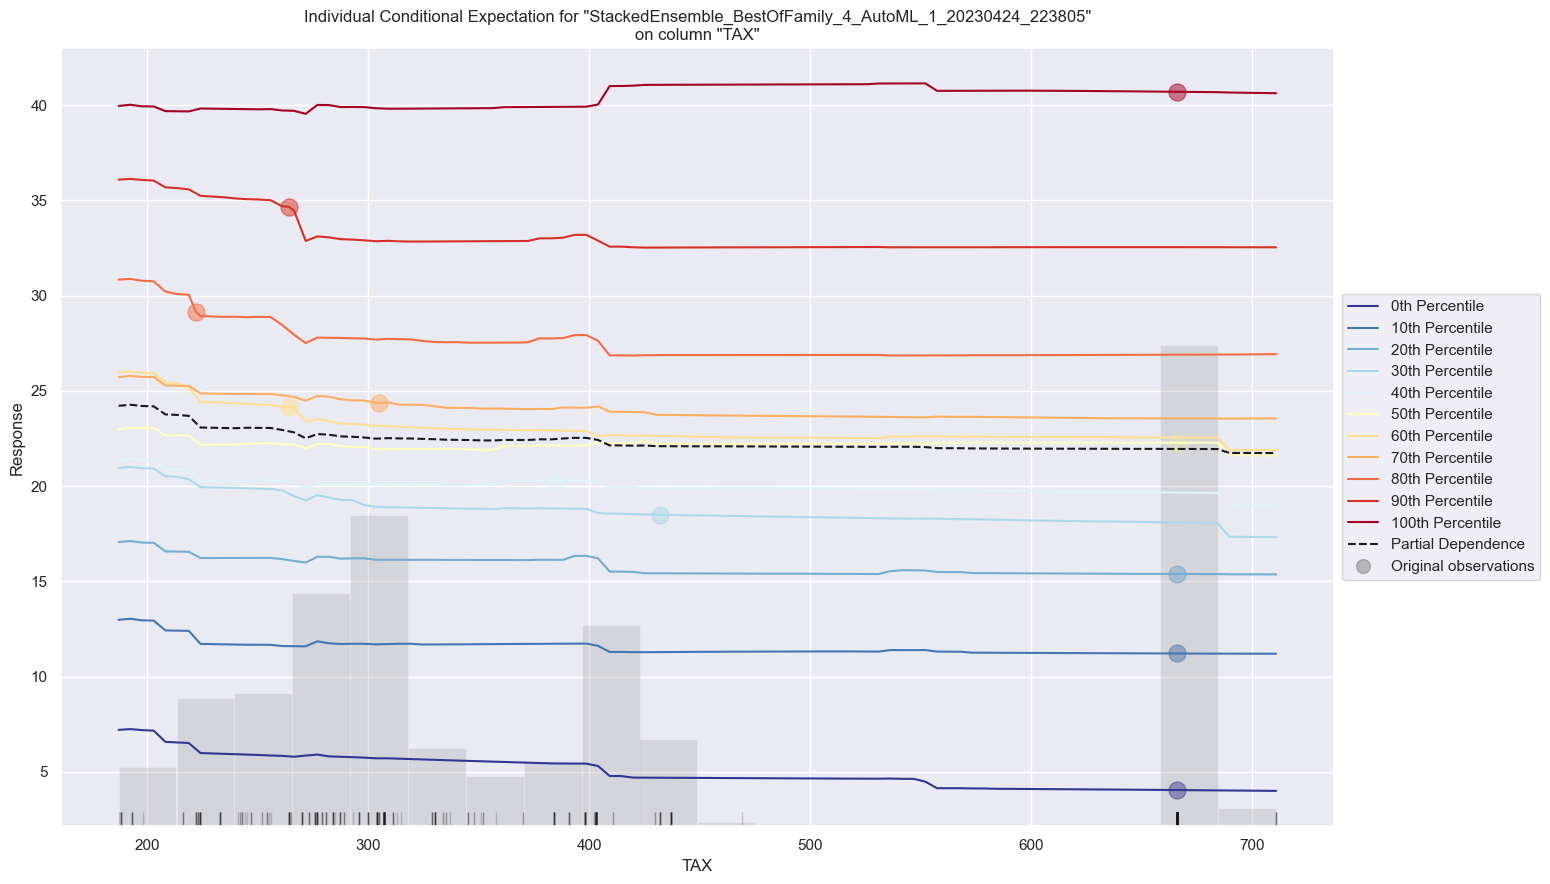

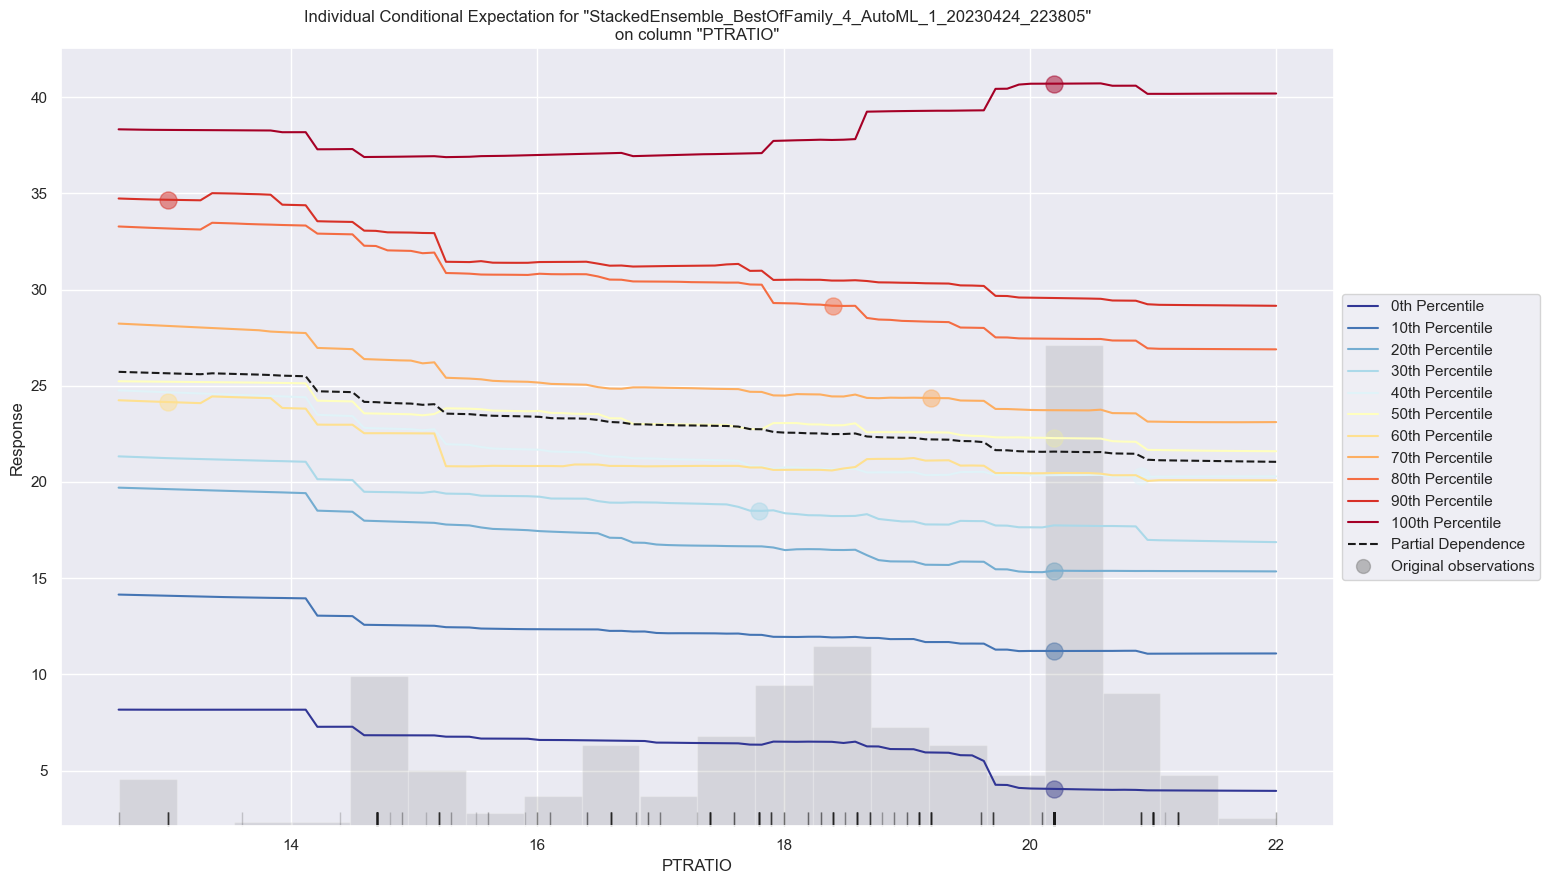

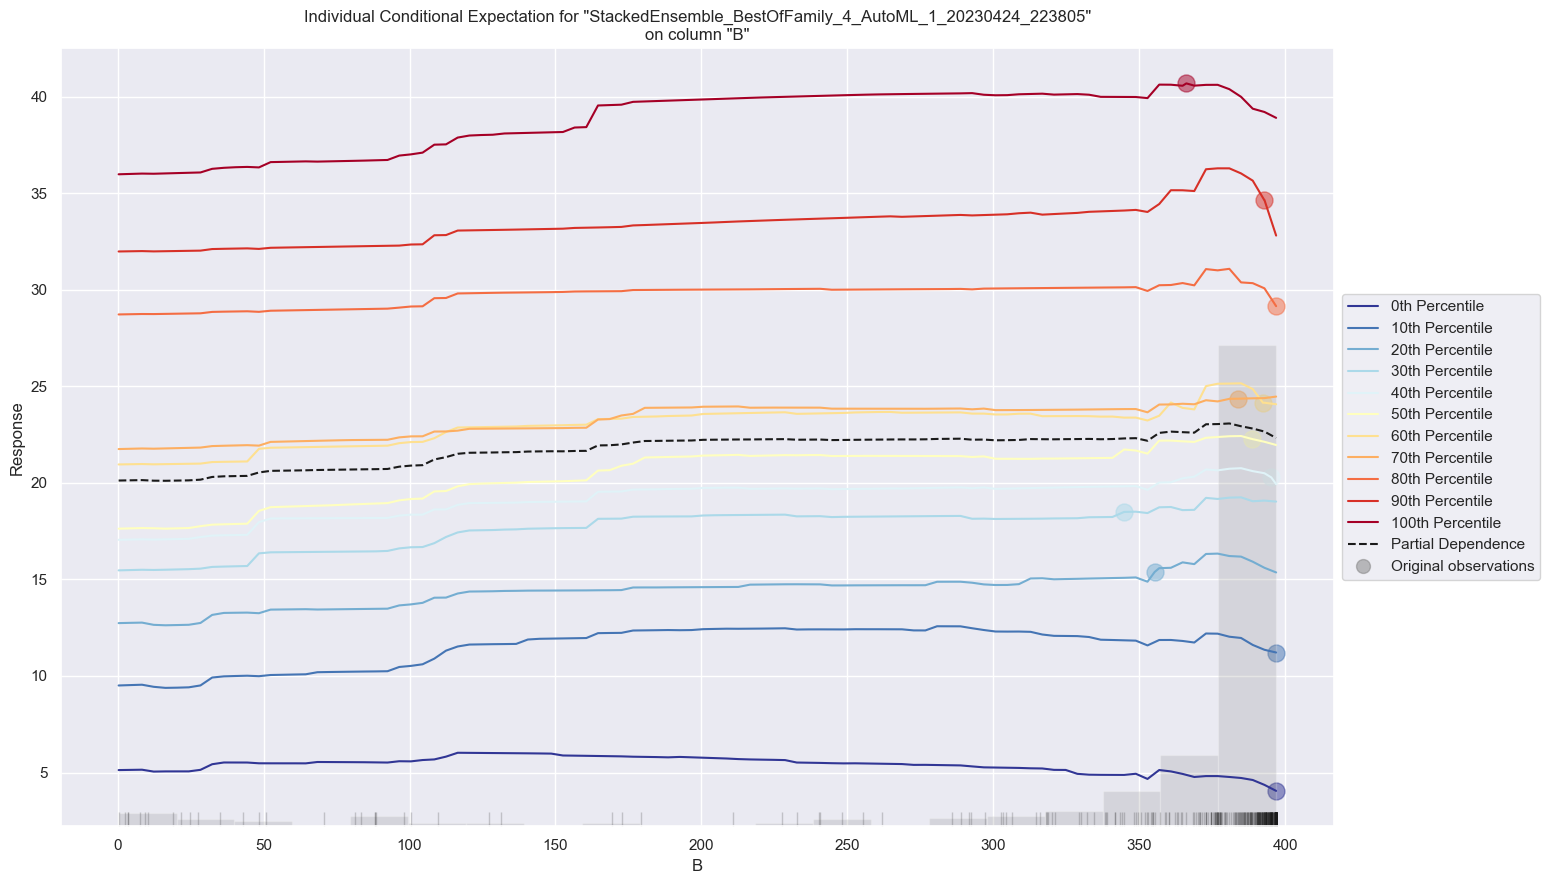

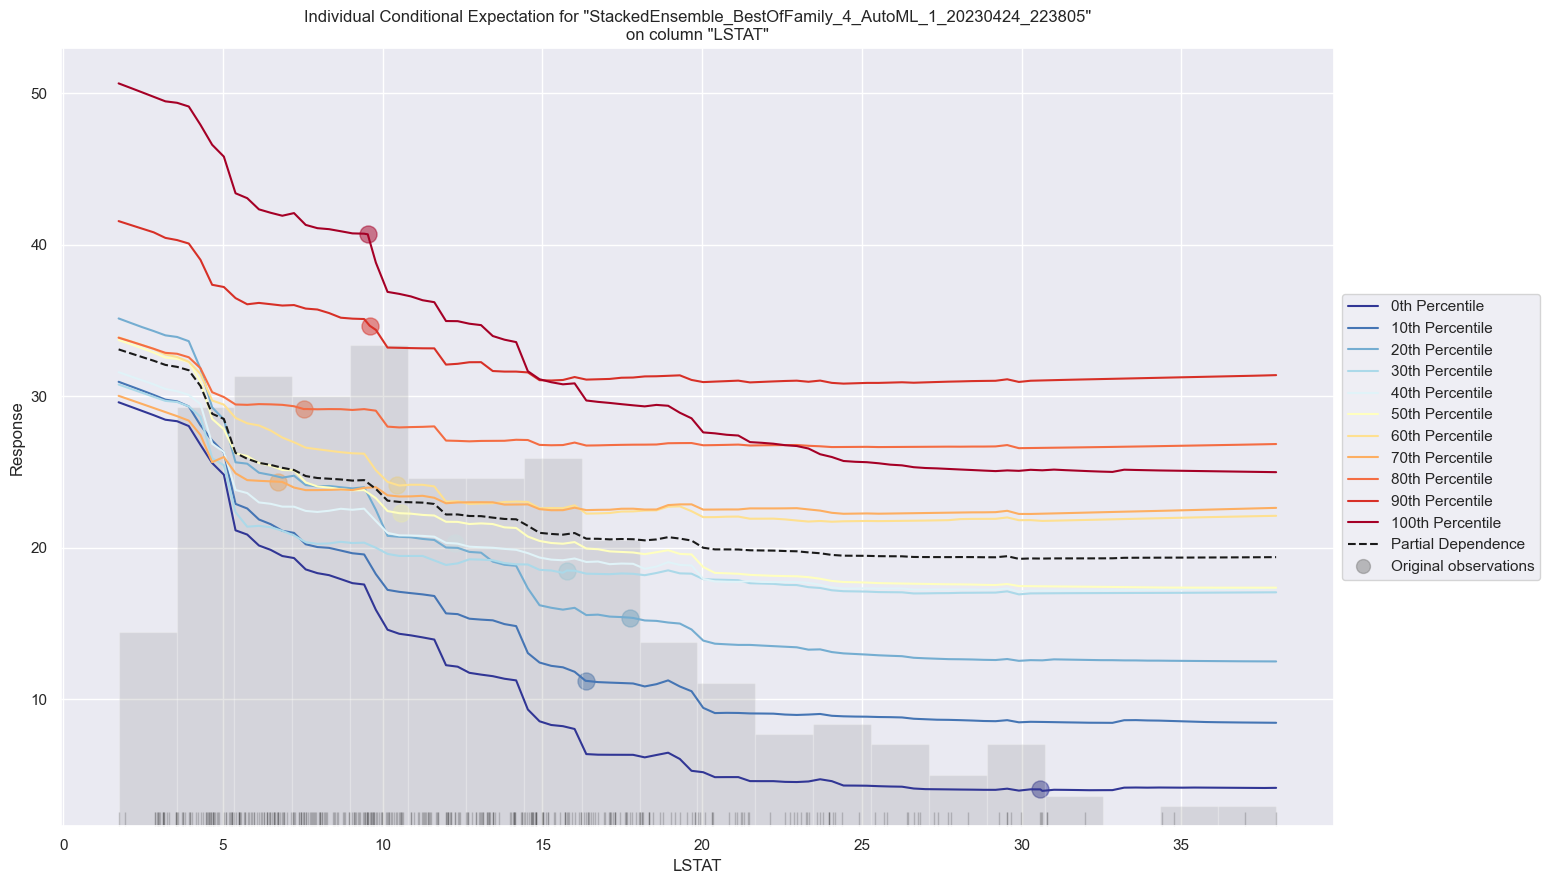

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
aml.leader.explain(df_train)

## 13. Conclusion
The AutoML's best model with its Hyperparameter's tuned is the best model for this task as it has the highest accuracy compared to the other models tested in this excercise. Also, this model is interpretible i.e. we can actually get to the root of what made this prediction to come to.

1. What is the question?
Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report
The focus is readability and clarity.

2. What did you do?
I performed Rgression techniques, OLS, SHAP analysis, AutoML, fitted tree based model, interpreted models, selected important features etc. on my dataset.

3. How well did it work?
The AutoML's best model with its Hyperparameter's tuned is the best model for this task as it has the highest accuracy compared to the other models tested in this excercise. Also, this model is interpretible i.e. we can actually get to the root of what made this prediction to come to.

4. What did you learn?
I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning
Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc
Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested
Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks
Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.

### Learning Outcomes
I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning
Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc
Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested
Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks
Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.

## References

1. [Regularization](https://harish-reddy.medium.com/regularization-in-python-699cfbad8622)
2. [SHAP Summary](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
3. [AutoML](https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e)
4. [Correlation-Analysis](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
5. [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)
6. [AutoML](https://www.automl.org/automl/)

MIT License

Copyright (c) 2023 Naman Diwan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.